In [10]:
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = (15, 5)

# Retweets structure

In [2]:
retweets = pd.read_csv("FakeNewsNet_modified/code/fakenewsnet_dataset/politifact/complete/politifact14548.csv")

In [3]:
tweets = pd.read_csv("FakeNewsNet_modified/code/fakenewsnet_dataset/politifact/tweets/politifact14548.csv")

In [4]:
len(tweets)

24286

In [5]:
len(retweets)

57530

In [6]:
tweets.sample(5)

,tweet_id,retweeted_id,created_at,favorite_count,retweet_count,user_id,location,verified,followers_count,source,text,fake
20394,1049693236061589504,0,Tue Oct 09 16:09:04 +0000 2018,0,0,891746406427504640,NaN,False,11,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",'Eighteen US states have voter registration de...,1
3671,984526557833191424,0,Thu Apr 12 20:19:57 +0000 2018,0,0,155525709,JCC#180204 天竜川沿線 JPN (UTC+9),False,2713,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","""US House of Representatives Speaker Paul Ryan...",1
13937,1020363555395317760,0,Fri Jul 20 17:43:23 +0000 2018,0,0,2886420553,NaN,False,170,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...","""Cech could be key to Real Madrid's pursuit of...",1
2304,973650323842662400,0,Tue Mar 13 20:01:41 +0000 2018,0,0,119988798,"Brattleboro, Vermont, USA",False,271,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",'#amjoy #RachelMaddow URGENT WAR ALERT! WRITE ...,1
20620,1051494604959145986,0,Sun Oct 14 15:27:04 +0000 2018,0,0,154293513,Alexandria VA & Guangzhou CN,False,44,"<a href=""http://www.tweetcaster.com"" rel=""nofo...","'In so many measured words, the Iowa @DMRegist...",1


In [7]:
tweets_ids = retweets[retweets.retweeted_id != 0].retweeted_id

In [8]:
len(tweets_ids)

33244

In [9]:
(retweets[retweets.retweeted_id != 0].retweeted_id).sample(5)

31093     979456984423567363
25509     960756326035894278
25656     961044002173784064
37370    1005883549763952640
30085     976696403673141248
Name: retweeted_id, dtype: int64

In [13]:
for id in tweets_ids:
    length = len(retweets[retweets.retweeted_id == id])
    if length > 2:
        print("For the tweet with id",id,"there are ",length, "retweets")

For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955181008298573824 there are  8 retweets
For the tweet with id 955187763716001793 there are  3 retweets
For the tweet with id 955187763716001793 there are  3 retweets
For the tweet with id 955187763716001793 there are  3 retweets
For the tweet with id 955275578894180353 there are  3 retweets
For the tweet with id 955275578894180353 there are  3 retweets
For the tweet with id 955275578894180353 there are  3 retweets
For the tweet with id 955392007228227584 there are  11 retweets
For the tweet with id 955392007228227584 there are  11

For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176 there are  34 retweets
For the tweet with id 956410122451890176

For the tweet with id 956755198528995330 there are  39 retweets
For the tweet with id 956755198528995330 there are  39 retweets
For the tweet with id 956755198528995330 there are  39 retweets
For the tweet with id 956755198528995330 there are  39 retweets
For the tweet with id 956755198528995330 there are  39 retweets
For the tweet with id 956755198528995330 there are  39 retweets
For the tweet with id 956755198528995330 there are  39 retweets
For the tweet with id 956880316374962176 there are  5 retweets
For the tweet with id 956880316374962176 there are  5 retweets
For the tweet with id 956880316374962176 there are  5 retweets
For the tweet with id 956880316374962176 there are  5 retweets
For the tweet with id 956880316374962176 there are  5 retweets
For the tweet with id 956935497837940740 there are  3 retweets
For the tweet with id 956935497837940740 there are  3 retweets
For the tweet with id 956935497837940740 there are  3 retweets
For the tweet with id 956976731595866114 there a

For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958286178884685824 there are  30 retweets
For the tweet with id 958361013648265217 there are  14 retweets
For the tweet with id 958361013648265217 there are  14 retweets
For the tweet with id 958361013648265217

For the tweet with id 958667590934712320 there are  11 retweets
For the tweet with id 958667590934712320 there are  11 retweets
For the tweet with id 958722472391659521 there are  3 retweets
For the tweet with id 958722472391659521 there are  3 retweets
For the tweet with id 958722472391659521 there are  3 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 there are  20 retweets
For the tweet with id 958743688343154688 th

For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081 there are  93 retweets
For the tweet with id 959613702327726081

For the tweet with id 960165592245456896 there are  3 retweets
For the tweet with id 960165592245456896 there are  3 retweets
For the tweet with id 960165592245456896 there are  3 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 there are  86 retweets
For the tweet with id 960580146066591744 th

For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960695544875073536 there are  58 retweets
For the tweet with id 960708223316750336 there are  16 retweets
For the tweet with id 960708223316750336 there are  16 retweets
For the tweet with id 960708223316750336 there are  16 retweets
For the tweet with id 960708223316750336 there are  16 retweets
For the tweet with id 960708223316750336 there are  16 retweets
For the tweet with id 960708223316750336 there are  16 retweets
For the tweet with id 960708223316750336 there are  16 retweets
For the tweet with id 960708223316750336

For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044002173784064 there are  11 retweets
For the tweet with id 961044563371597825 there are  8 retweets
For the tweet with id 961044563371597825 there are  8 retweets
For the tweet with id 961044563371597825 there are  8 retweets
For the tweet with id 961044563371597825 there are  8 retweets
For the tweet with id 961044563371597825 there are  8 retweets
For the tweet with id 961044563371597825 there are  8 retweets
For the tweet with id 961044563371597825 there

For the tweet with id 961377665767833601 there are  19 retweets
For the tweet with id 961377665767833601 there are  19 retweets
For the tweet with id 961377665767833601 there are  19 retweets
For the tweet with id 961377665767833601 there are  19 retweets
For the tweet with id 961377665767833601 there are  19 retweets
For the tweet with id 961377665767833601 there are  19 retweets
For the tweet with id 961377665767833601 there are  19 retweets
For the tweet with id 961377932919832576 there are  6 retweets
For the tweet with id 961377932919832576 there are  6 retweets
For the tweet with id 961377932919832576 there are  6 retweets
For the tweet with id 961377932919832576 there are  6 retweets
For the tweet with id 961377932919832576 there are  6 retweets
For the tweet with id 961377932919832576 there are  6 retweets
For the tweet with id 961378637952974848 there are  14 retweets
For the tweet with id 961378637952974848 there are  14 retweets
For the tweet with id 961378637952974848 there

For the tweet with id 961661011353833472 there are  5 retweets
For the tweet with id 961661011353833472 there are  5 retweets
For the tweet with id 961661011353833472 there are  5 retweets
For the tweet with id 961667361601409025 there are  5 retweets
For the tweet with id 961667361601409025 there are  5 retweets
For the tweet with id 961667361601409025 there are  5 retweets
For the tweet with id 961667361601409025 there are  5 retweets
For the tweet with id 961667361601409025 there are  5 retweets
For the tweet with id 961805332833099776 there are  3 retweets
For the tweet with id 961805332833099776 there are  3 retweets
For the tweet with id 961805332833099776 there are  3 retweets
For the tweet with id 961854725967630337 there are  49 retweets
For the tweet with id 961854725967630337 there are  49 retweets
For the tweet with id 961854725967630337 there are  49 retweets
For the tweet with id 961854725967630337 there are  49 retweets
For the tweet with id 961854725967630337 there are 

For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961913060234539008 there are  91 retweets
For the tweet with id 961914067953897473 there are  3 retweets
For the tweet with id 961914067953897473 there are  3 retweets
For the tweet with id 961914067953897473 there are  3 retweets
For the tweet with id 961914151009423360 there are  38 retweets
For the tweet with id 961914151009423360 there are  38 retweets
For the tweet with id 961914151009423360 th

For the tweet with id 962127929764433926 there are  57 retweets
For the tweet with id 962127929764433926 there are  57 retweets
For the tweet with id 962127929764433926 there are  57 retweets
For the tweet with id 962127929764433926 there are  57 retweets
For the tweet with id 962127929764433926 there are  57 retweets
For the tweet with id 962168827722305536 there are  3 retweets
For the tweet with id 962168827722305536 there are  3 retweets
For the tweet with id 962168827722305536 there are  3 retweets
For the tweet with id 962304764510916610 there are  16 retweets
For the tweet with id 962304764510916610 there are  16 retweets
For the tweet with id 962304764510916610 there are  16 retweets
For the tweet with id 962304764510916610 there are  16 retweets
For the tweet with id 962304764510916610 there are  16 retweets
For the tweet with id 962304764510916610 there are  16 retweets
For the tweet with id 962304764510916610 there are  16 retweets
For the tweet with id 962304764510916610 th

For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673 there are  51 retweets
For the tweet with id 963050736694300673

For the tweet with id 963542979221782528 there are  10 retweets
For the tweet with id 963554961945591808 there are  4 retweets
For the tweet with id 963554961945591808 there are  4 retweets
For the tweet with id 963554961945591808 there are  4 retweets
For the tweet with id 963554961945591808 there are  4 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963587709406195712 there are  8 retweets
For the tweet with id 963610888455548929 there are  4 retweets
For the tweet with id 963610888455548929 there are  4 retweets
For the tweet with id 963610888455548929 there are  4 

For the tweet with id 964647524458999808 there are  5 retweets
For the tweet with id 964647524458999808 there are  5 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964659761882062848 there are  8 retweets
For the tweet with id 964748773820977152 there are  7 retweets
For the tweet with id 964748773820977152 there are  7 retweets
For the tweet with id 964748773820977152 there are  7 retweets
For the tweet with id 964748773820977152 there are  7 retweets
For the tweet with id 964748773820977152 there are  7 retweets
For the tweet with id 964748773820977152 there are  7 r

For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965135741897658370 there are  93 retweets
For the tweet with id 965176240012431366

For the tweet with id 966020292891086848 there are  7 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 there are  34 retweets
For the tweet with id 966033467732643840 

For the tweet with id 966305959961415680 there are  11 retweets
For the tweet with id 966305959961415680 there are  11 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966314728661377024 there are  8 retweets
For the tweet with id 966401491555594240 there are  3 retweets
For the tweet with id 966401491555594240 there are  3 retweets
For the tweet with id 966401491555594240 there are  3 retweets
For the tweet with id 966465976387719168 there are  29 retweets
For the tweet with id 966465976387719168 there are  29 retweets
For the tweet with id 966465976387719168 there are 

For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768 there are  89 retweets
For the tweet with id 966724826181152768

For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966727321188274176 there are  82 retweets
For the tweet with id 966729427777478656 there are  4 retweets
For the tweet with id 966729427777478656 there are  4 retweets
For the tweet with id 966729427777478656 there are  4 retweets
For the tweet with id 966729427777478656 there are  4 retweets
For the tweet with id 966787958731870210 there are  93 retweets
For the tweet with id 966787958731870210 there are  93 retweets
For the tweet with id 966787958731870210 the

For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001 there are  93 retweets
For the tweet with id 967150289248768001

For the tweet with id 968163008940830721 there are  5 retweets
For the tweet with id 968163008940830721 there are  5 retweets
For the tweet with id 968166212403367936 there are  4 retweets
For the tweet with id 968166212403367936 there are  4 retweets
For the tweet with id 968166212403367936 there are  4 retweets
For the tweet with id 968166212403367936 there are  4 retweets
For the tweet with id 968167612210434048 there are  3 retweets
For the tweet with id 968167612210434048 there are  3 retweets
For the tweet with id 968167612210434048 there are  3 retweets
For the tweet with id 968233052894834689 there are  4 retweets
For the tweet with id 968233052894834689 there are  4 retweets
For the tweet with id 968233052894834689 there are  4 retweets
For the tweet with id 968233052894834689 there are  4 retweets
For the tweet with id 968262949986062336 there are  5 retweets
For the tweet with id 968262949986062336 there are  5 retweets
For the tweet with id 968262949986062336 there are  5 r

For the tweet with id 968616037695545344 there are  50 retweets
For the tweet with id 968616037695545344 there are  50 retweets
For the tweet with id 968616037695545344 there are  50 retweets
For the tweet with id 968616037695545344 there are  50 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080 there are  19 retweets
For the tweet with id 968642278024622080

For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016 there are  96 retweets
For the tweet with id 969257441673302016

For the tweet with id 969975961717563392 there are  5 retweets
For the tweet with id 969975961717563392 there are  5 retweets
For the tweet with id 969975961717563392 there are  5 retweets
For the tweet with id 969975961717563392 there are  5 retweets
For the tweet with id 970045942672928768 there are  6 retweets
For the tweet with id 970045942672928768 there are  6 retweets
For the tweet with id 970045942672928768 there are  6 retweets
For the tweet with id 970045942672928768 there are  6 retweets
For the tweet with id 970045942672928768 there are  6 retweets
For the tweet with id 970045942672928768 there are  6 retweets
For the tweet with id 970047878696722433 there are  3 retweets
For the tweet with id 970047878696722433 there are  3 retweets
For the tweet with id 970047878696722433 there are  3 retweets
For the tweet with id 970152259664433152 there are  5 retweets
For the tweet with id 970152259664433152 there are  5 retweets
For the tweet with id 970152259664433152 there are  5 r

For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706 there are  51 retweets
For the tweet with id 971088044915912706

For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553 there are  87 retweets
For the tweet with id 971403137809559553

For the tweet with id 972836746080776196 there are  19 retweets
For the tweet with id 972836746080776196 there are  19 retweets
For the tweet with id 972836746080776196 there are  19 retweets
For the tweet with id 972836746080776196 there are  19 retweets
For the tweet with id 972836746080776196 there are  19 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352 there are  17 retweets
For the tweet with id 972863651400036352

For the tweet with id 973143708437762053 there are  18 retweets
For the tweet with id 973143708437762053 there are  18 retweets
For the tweet with id 973143708437762053 there are  18 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152145766789120 there are  12 retweets
For the tweet with id 973152832311480320

For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152 there are  40 retweets
For the tweet with id 973318050924593152

For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973727991120515073 there are  92 retweets
For the tweet with id 973729646775697409 there are  16 retweets
For the tweet with id 973729646775697409 there are  16 retweets
For the tweet with id 973729646775697409

For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974302456514523137 there are  13 retweets
For the tweet with id 974650161220665345 there are  4 retweets
For the tweet with id 974650161220665345 there are  4 retweets
For the tweet with id 974650161220665345 there are  4 retweets
For the tweet with id 974650161220665345 there are  4 retweets
For the tweet with id 974654058467348480 there are  3 retweets
For the tweet with id 974654058467348480 ther

For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384 there are  32 retweets
For the tweet with id 974787992312336384

For the tweet with id 976190717772038146 there are  4 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976230370332078085 there are  14 retweets
For the tweet with id 976240556018868225 

For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976696403673141248 there are  15 retweets
For the tweet with id 976827381997625344 there are  10 retweets
For the tweet with id 976827381997625344 there are  10 retweets
For the tweet with id 976827381997625344 there are  10 retweets
For the tweet with id 976827381997625344 there are  10 retweets
For the tweet with id 976827381997625344 there are  10 retweets
For the tweet with id 976827381997625344

For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424 there are  85 retweets
For the tweet with id 977172811218407424

For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320 there are  22 retweets
For the tweet with id 977369919703736320

For the tweet with id 978300973054644224 there are  11 retweets
For the tweet with id 978300973054644224 there are  11 retweets
For the tweet with id 978300973054644224 there are  11 retweets
For the tweet with id 978329499971604490 there are  3 retweets
For the tweet with id 978329499971604490 there are  3 retweets
For the tweet with id 978329499971604490 there are  3 retweets
For the tweet with id 978348927668830209 there are  7 retweets
For the tweet with id 978348927668830209 there are  7 retweets
For the tweet with id 978348927668830209 there are  7 retweets
For the tweet with id 978348927668830209 there are  7 retweets
For the tweet with id 978348927668830209 there are  7 retweets
For the tweet with id 978348927668830209 there are  7 retweets
For the tweet with id 978348927668830209 there are  7 retweets
For the tweet with id 978635004061409280 there are  4 retweets
For the tweet with id 978635004061409280 there are  4 retweets
For the tweet with id 978635004061409280 there are  

For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785 there are  91 retweets
For the tweet with id 979067533838966785

For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912 there are  95 retweets
For the tweet with id 979413028696358912

For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979456984423567363 there are  96 retweets
For the tweet with id 979565587327107072 there are  5 retweets
For the tweet with id 979565587327107072 there are  5 retweets
For the tweet with id 979565587327107072 there are  5 retweets
For the tweet with id 979565587327107072 there are  5 retweets
For the tweet with id 979565587327107072 there are  5 retweets
For the tweet with id 979565937727819776 there are  5 retweets
For the tweet with id 979565937727819776 there are  5 retweets
For the tweet with id 979565937727819776 there 

For the tweet with id 981623727971618818 there are  4 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 there are  54 retweets
For the tweet with id 981904495780102144 

For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720 there are  95 retweets
For the tweet with id 981981590753566720

For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983165909777854464 there are  14 retweets
For the tweet with id 983382571332657152 there are  6 retweets
For the tweet with id 983382571332657152 there are  6 retweets
For the tweet with id 983382571332657152 there are  6 retweets
For the tweet with id 983382571332657152 there are  6 retweets
For the tweet with id 983382571332657152 the

For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520 there are  96 retweets
For the tweet with id 984117930479595520

For the tweet with id 984476115350753280 there are  11 retweets
For the tweet with id 984476115350753280 there are  11 retweets
For the tweet with id 984476115350753280 there are  11 retweets
For the tweet with id 984476115350753280 there are  11 retweets
For the tweet with id 984476473984724994 there are  4 retweets
For the tweet with id 984476473984724994 there are  4 retweets
For the tweet with id 984476473984724994 there are  4 retweets
For the tweet with id 984476473984724994 there are  4 retweets
For the tweet with id 984521361006743553 there are  6 retweets
For the tweet with id 984521361006743553 there are  6 retweets
For the tweet with id 984521361006743553 there are  6 retweets
For the tweet with id 984521361006743553 there are  6 retweets
For the tweet with id 984521361006743553 there are  6 retweets
For the tweet with id 984521361006743553 there are  6 retweets
For the tweet with id 984560942062153729 there are  9 retweets
For the tweet with id 984560942062153729 there are 

For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984854380104085506 there are  13 retweets
For the tweet with id 984866342850347008 there are  22 retweets
For the tweet with id 984866342850347008 there are  22 retweets
For the tweet with id 984866342850347008 there are  22 retweets
For the tweet with id 984866342850347008 there are  22 retweets
For the tweet with id 984866342850347008 there are  22 retweets
For the tweet with id 984866342850347008 there are  22 retweets
For the tweet with id 984866342850347008 there are  22 retweets
For the tweet with id 984866342850347008

For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697 there are  60 retweets
For the tweet with id 985607092957597697

For the tweet with id 986443294342373377 there are  19 retweets
For the tweet with id 986443294342373377 there are  19 retweets
For the tweet with id 986443294342373377 there are  19 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264 there are  21 retweets
For the tweet with id 986466803680395264

For the tweet with id 987754439078498304 there are  8 retweets
For the tweet with id 987953618837032961 there are  3 retweets
For the tweet with id 987953618837032961 there are  3 retweets
For the tweet with id 987953618837032961 there are  3 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 there are  19 retweets
For the tweet with id 987960745995489280 the

For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464 there are  95 retweets
For the tweet with id 988888994565054464

For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000 there are  91 retweets
For the tweet with id 989124244494848000

For the tweet with id 989253915786047488 there are  15 retweets
For the tweet with id 989253915786047488 there are  15 retweets
For the tweet with id 989253915786047488 there are  15 retweets
For the tweet with id 989253915786047488 there are  15 retweets
For the tweet with id 989253915786047488 there are  15 retweets
For the tweet with id 989253915786047488 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893 there are  15 retweets
For the tweet with id 989263287853477893

For the tweet with id 989524428714373120 there are  7 retweets
For the tweet with id 989524428714373120 there are  7 retweets
For the tweet with id 989524428714373120 there are  7 retweets
For the tweet with id 989524428714373120 there are  7 retweets
For the tweet with id 989524428714373120 there are  7 retweets
For the tweet with id 989524428714373120 there are  7 retweets
For the tweet with id 989524428714373120 there are  7 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there are  19 retweets
For the tweet with id 989526341354754049 there 

For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989710898695618560 there are  22 retweets
For the tweet with id 989719494011437058 there are  6 retweets
For the tweet with id 989719494011437058 there are  6 retweets
For the tweet with id 989719494011437058 there are  6 retweets
For the tweet with id 989719494011437058 there are  6 retweets
For the tweet with id 989719494011437058 the

For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464 there are  96 retweets
For the tweet with id 989960623575486464

For the tweet with id 991020454402904064 there are  15 retweets
For the tweet with id 991020454402904064 there are  15 retweets
For the tweet with id 991063876639735808 there are  3 retweets
For the tweet with id 991063876639735808 there are  3 retweets
For the tweet with id 991063876639735808 there are  3 retweets
For the tweet with id 991120937280917504 there are  4 retweets
For the tweet with id 991120937280917504 there are  4 retweets
For the tweet with id 991120937280917504 there are  4 retweets
For the tweet with id 991120937280917504 there are  4 retweets
For the tweet with id 991384941832425473 there are  5 retweets
For the tweet with id 991384941832425473 there are  5 retweets
For the tweet with id 991384941832425473 there are  5 retweets
For the tweet with id 991384941832425473 there are  5 retweets
For the tweet with id 991384941832425473 there are  5 retweets
For the tweet with id 991412140769792000 there are  10 retweets
For the tweet with id 991412140769792000 there are  

For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992169541676527623 there are  15 retweets
For the tweet with id 992197639843102720 there are  9 retweets
For the tweet with id 992197639843102720 there are  9 retweets
For the tweet with id 992197639843102720 there are  9 retweets
For the tweet with id 992197639843102720 there are  9 retweets
For the tweet with id 992197639843102720 there are  9 retweets
For the tweet with id 992197639843102720 ther

For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576 there are  92 retweets
For the tweet with id 993585190667800576

For the tweet with id 993666803376140289 there are  5 retweets
For the tweet with id 993666803376140289 there are  5 retweets
For the tweet with id 993666803376140289 there are  5 retweets
For the tweet with id 993666803376140289 there are  5 retweets
For the tweet with id 993666803376140289 there are  5 retweets
For the tweet with id 993741216318619648 there are  3 retweets
For the tweet with id 993741216318619648 there are  3 retweets
For the tweet with id 993741216318619648 there are  3 retweets
For the tweet with id 993795086877184001 there are  4 retweets
For the tweet with id 993795086877184001 there are  4 retweets
For the tweet with id 993795086877184001 there are  4 retweets
For the tweet with id 993795086877184001 there are  4 retweets
For the tweet with id 993841760659963905 there are  16 retweets
For the tweet with id 993841760659963905 there are  16 retweets
For the tweet with id 993841760659963905 there are  16 retweets
For the tweet with id 993841760659963905 there are  

For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994326081573408768 there are  16 retweets
For the tweet with id 994333711725408256 there are  5 retweets
For the tweet with id 994333711725408256 

For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064 there are  95 retweets
For the tweet with id 994570273809752064

For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996155639599579137 there are  28 retweets
For the tweet with id 996269302851489792 there are  17 retweets
For the tweet with id 996269302851489792 there are  17 retweets
For the tweet with id 996269302851489792

For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721 there are  96 retweets
For the tweet with id 996620322572062721

For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809 there are  78 retweets
For the tweet with id 996784306872823809

For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104 there are  88 retweets
For the tweet with id 996847797725999104

For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136 there are  27 retweets
For the tweet with id 996919159555547136

For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080 there are  95 retweets
For the tweet with id 997227616359854080

For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625 there are  92 retweets
For the tweet with id 997909497766170625

For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530 there are  90 retweets
For the tweet with id 999010902140694530

For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999664364457164800 there are  16 retweets
For the tweet with id 999666928162664448

For the tweet with id 1000503929417891844 there are  11 retweets
For the tweet with id 1000503929417891844 there are  11 retweets
For the tweet with id 1000503929417891844 there are  11 retweets
For the tweet with id 1000503929417891844 there are  11 retweets
For the tweet with id 1000503929417891844 there are  11 retweets
For the tweet with id 1000531982412021767 there are  4 retweets
For the tweet with id 1000531982412021767 there are  4 retweets
For the tweet with id 1000531982412021767 there are  4 retweets
For the tweet with id 1000531982412021767 there are  4 retweets
For the tweet with id 1000568109017812993 there are  96 retweets
For the tweet with id 1000568109017812993 there are  96 retweets
For the tweet with id 1000568109017812993 there are  96 retweets
For the tweet with id 1000568109017812993 there are  96 retweets
For the tweet with id 1000568109017812993 there are  96 retweets
For the tweet with id 1000568109017812993 there are  96 retweets
For the tweet with id 1000568

For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 1000743394308710400 there are  44 retweets
For the tweet with id 100

For the tweet with id 1001511795834503170 there are  19 retweets
For the tweet with id 1001511795834503170 there are  19 retweets
For the tweet with id 1001541953782206464 there are  6 retweets
For the tweet with id 1001541953782206464 there are  6 retweets
For the tweet with id 1001541953782206464 there are  6 retweets
For the tweet with id 1001541953782206464 there are  6 retweets
For the tweet with id 1001541953782206464 there are  6 retweets
For the tweet with id 1001541953782206464 there are  6 retweets
For the tweet with id 1001751698984054784 there are  9 retweets
For the tweet with id 1001751698984054784 there are  9 retweets
For the tweet with id 1001751698984054784 there are  9 retweets
For the tweet with id 1001751698984054784 there are  9 retweets
For the tweet with id 1001751698984054784 there are  9 retweets
For the tweet with id 1001751698984054784 there are  9 retweets
For the tweet with id 1001751698984054784 there are  9 retweets
For the tweet with id 1001751698984054

For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 1002200482759237637 there are  33 retweets
For the tweet with id 100

For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1003758295130271744 there are  58 retweets
For the tweet with id 1004003680968945664 there are  19 retweets
For the tweet with id 1004003680968945664 there are  19 retweets
For the tweet with id 1004003680968945664 there are  19 retweets
For the tweet with id 1004003680968945664 there are  19 retweets
For the tweet with id 100

For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004401196709232640 there are  20 retweets
For the tweet with id 1004407770735632387 there are  4 retweets
For the tweet with id 1004407770735632387 there are  4 retweets
For the tweet with id 1004407770735632387 there are  4 retweets
For the tweet with id 1004407770735632387 there are  4 retweets
For the tweet with id 1004415795454042112 there are  3 retweets
For the tweet with id 1004415795454042112 there are  3 retweets
For the tweet with id 100441579

For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 1005129598772875265 there are  91 retweets
For the tweet with id 100

For the tweet with id 1005883549763952640 there are  56 retweets
For the tweet with id 1005883549763952640 there are  56 retweets
For the tweet with id 1005883549763952640 there are  56 retweets
For the tweet with id 1005883549763952640 there are  56 retweets
For the tweet with id 1005937540442931200 there are  3 retweets
For the tweet with id 1005937540442931200 there are  3 retweets
For the tweet with id 1005937540442931200 there are  3 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 1006064756120342533 there are  17 retweets
For the tweet with id 100606

For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 1006631111395500032 there are  72 retweets
For the tweet with id 100

For the tweet with id 1007393375904043008 there are  9 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007609841018339328 there are  13 retweets
For the tweet with id 1007625789007958016 there are  7 retweets
For the tweet with id 10076

For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009228146749640704 there are  30 retweets
For the tweet with id 1009266387959910400 there are  7 retweets
For the tweet with id 1009266387959910400 there are  7 retweets
For the tweet with id 1009266387959910400 there are  7 retweets
For the tweet with id 1009266387959910400 there are  7 retweets
For the tweet with id 1009266387959910400 there are  7 retweets
For the tweet with id 10092663

For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 1009874357223677952 there are  93 retweets
For the tweet with id 100

For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 1010136147589324800 there are  87 retweets
For the tweet with id 101

For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010870544131153920 there are  17 retweets
For the tweet with id 1010886355994505217 there are  32 retweets
For the tweet with id 1010886355994505217 there are  32 retweets
For the tweet with id 101

For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 1011432290306740224 there are  15 retweets
For the tweet with id 101

For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 1011734872136867846 there are  95 retweets
For the tweet with id 101

For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 1012084229457481729 there are  56 retweets
For the tweet with id 101

For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 1012404790595289088 there are  86 retweets
For the tweet with id 101

For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012630546374152192 there are  13 retweets
For the tweet with id 1012648225310994432 there are  3 retweets
For the tweet with id 1012648225310994432 there are  3 retweets
For the tweet with id 10126

For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 1013962639087677440 there are  82 retweets
For the tweet with id 101

For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014776825946439680 there are  41 retweets
For the tweet with id 1014813309390946304 there are  95 retweets
For the tweet with id 101

For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 1014875217213128704 there are  44 retweets
For the tweet with id 101

For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 1015253658265518085 there are  86 retweets
For the tweet with id 101

For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 1015394260709830656 there are  94 retweets
For the tweet with id 101

For the tweet with id 1015424037739098114 there are  91 retweets
For the tweet with id 1015429868991991809 there are  3 retweets
For the tweet with id 1015429868991991809 there are  3 retweets
For the tweet with id 1015429868991991809 there are  3 retweets
For the tweet with id 1015640564535095296 there are  3 retweets
For the tweet with id 1015640564535095296 there are  3 retweets
For the tweet with id 1015640564535095296 there are  3 retweets
For the tweet with id 1015745302962343936 there are  3 retweets
For the tweet with id 1015745302962343936 there are  3 retweets
For the tweet with id 1015745302962343936 there are  3 retweets
For the tweet with id 1015788103150125057 there are  12 retweets
For the tweet with id 1015788103150125057 there are  12 retweets
For the tweet with id 1015788103150125057 there are  12 retweets
For the tweet with id 1015788103150125057 there are  12 retweets
For the tweet with id 1015788103150125057 there are  12 retweets
For the tweet with id 101578810315

For the tweet with id 1017102547646021632 there are  28 retweets
For the tweet with id 1017102547646021632 there are  28 retweets
For the tweet with id 1017102547646021632 there are  28 retweets
For the tweet with id 1017102547646021632 there are  28 retweets
For the tweet with id 1017102547646021632 there are  28 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 1017131327152447488 there are  13 retweets
For the tweet with id 101

For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 1017427485888303104 there are  83 retweets
For the tweet with id 101

For the tweet with id 1017439074989301760 there are  9 retweets
For the tweet with id 1017439074989301760 there are  9 retweets
For the tweet with id 1017439074989301760 there are  9 retweets
For the tweet with id 1017439074989301760 there are  9 retweets
For the tweet with id 1017439074989301760 there are  9 retweets
For the tweet with id 1017486616397582336 there are  4 retweets
For the tweet with id 1017486616397582336 there are  4 retweets
For the tweet with id 1017486616397582336 there are  4 retweets
For the tweet with id 1017486616397582336 there are  4 retweets
For the tweet with id 1017488460914061312 there are  7 retweets
For the tweet with id 1017488460914061312 there are  7 retweets
For the tweet with id 1017488460914061312 there are  7 retweets
For the tweet with id 1017488460914061312 there are  7 retweets
For the tweet with id 1017488460914061312 there are  7 retweets
For the tweet with id 1017488460914061312 there are  7 retweets
For the tweet with id 101748846091406131

For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 1018111608399286272 there are  73 retweets
For the tweet with id 101

For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 1019026824154767365 there are  29 retweets
For the tweet with id 101

For the tweet with id 1019089266788335616 there are  13 retweets
For the tweet with id 1019089266788335616 there are  13 retweets
For the tweet with id 1019089266788335616 there are  13 retweets
For the tweet with id 1019089266788335616 there are  13 retweets
For the tweet with id 1019089266788335616 there are  13 retweets
For the tweet with id 1019089649644507137 there are  3 retweets
For the tweet with id 1019089649644507137 there are  3 retweets
For the tweet with id 1019089649644507137 there are  3 retweets
For the tweet with id 1019093918657404928 there are  4 retweets
For the tweet with id 1019093918657404928 there are  4 retweets
For the tweet with id 1019093918657404928 there are  4 retweets
For the tweet with id 1019093918657404928 there are  4 retweets
For the tweet with id 1019097610957643777 there are  9 retweets
For the tweet with id 1019097610957643777 there are  9 retweets
For the tweet with id 1019097610957643777 there are  9 retweets
For the tweet with id 1019097610957

For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019254318300520449 there are  23 retweets
For the tweet with id 1019255362107650048 there are  7 retweets
For the tweet with id 1019255362107650048 there are  7 retweets
For the tweet with id 10192

For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 1019330510844145669 there are  96 retweets
For the tweet with id 101

For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 1019363201912172546 there are  25 retweets
For the tweet with id 101

For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019382609036509184 there are  11 retweets
For the tweet with id 1019389229539954689 there are  18 retweets
For the tweet with id 1019389229539954689 there are  18 retweets
For the tweet with id 1019389229539954689 there are  18 retweets
For the tweet with id 1019389229539954689 there are  18 retweets
For the tweet with id 101

For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 1019409028315844609 there are  23 retweets
For the tweet with id 101

For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 1019486101155741696 there are  94 retweets
For the tweet with id 101

For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 1019542924172910592 there are  93 retweets
For the tweet with id 101

For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 1019557213336031237 there are  78 retweets
For the tweet with id 101

For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559053859540992 there are  13 retweets
For the tweet with id 1019559094942724096 there are  96 retweets
For the tweet with id 1019559094942724096 there are  96 retweets
For the tweet with id 101

For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560331926880257 there are  15 retweets
For the tweet with id 1019560373425299456 there are  3 retweets
For the tweet with id 1019560373425299456 there are  3 retweets
For the tweet with id 1019560373425299456 there are  3 retweets
For the tweet with id 1019560477892882432 there are  8 retweets
For the tweet with id 1019560

For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 1019563469094473728 there are  35 retweets
For the tweet with id 101

For the tweet with id 1019766741100969985 there are  16 retweets
For the tweet with id 1019766741100969985 there are  16 retweets
For the tweet with id 1019766741100969985 there are  16 retweets
For the tweet with id 1019766741100969985 there are  16 retweets
For the tweet with id 1019766741100969985 there are  16 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 1019771207573360640 there are  24 retweets
For the tweet with id 101

For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020101373885546497 there are  20 retweets
For the tweet with id 1020118702375735302 there are  5 retweets
For the tweet with id 1020118702375735302 there are  5 retweets
For the tweet with id 10201

For the tweet with id 1020316939514793984 there are  7 retweets
For the tweet with id 1020316939514793984 there are  7 retweets
For the tweet with id 1020316939514793984 there are  7 retweets
For the tweet with id 1020316939514793984 there are  7 retweets
For the tweet with id 1020316939514793984 there are  7 retweets
For the tweet with id 1020316939514793984 there are  7 retweets
For the tweet with id 1020325288830435329 there are  4 retweets
For the tweet with id 1020325288830435329 there are  4 retweets
For the tweet with id 1020325288830435329 there are  4 retweets
For the tweet with id 1020325288830435329 there are  4 retweets
For the tweet with id 1020344365988884481 there are  3 retweets
For the tweet with id 1020344365988884481 there are  3 retweets
For the tweet with id 1020344365988884481 there are  3 retweets
For the tweet with id 1020356590665428992 there are  3 retweets
For the tweet with id 1020356590665428992 there are  3 retweets
For the tweet with id 102035659066542899

For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 1020394450181394432 there are  29 retweets
For the tweet with id 102

For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 1020824229711839233 there are  89 retweets
For the tweet with id 102

For the tweet with id 1020840482136559616 there are  3 retweets
For the tweet with id 1020840482136559616 there are  3 retweets
For the tweet with id 1020840482136559616 there are  3 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 1020844891558039553 there are  90 retweets
For the tweet with id 102084

For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 1020848053295697921 there are  88 retweets
For the tweet with id 102

For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 1020860692490932224 there are  42 retweets
For the tweet with id 102

For the tweet with id 1020875436396384256 there are  7 retweets
For the tweet with id 1020875436396384256 there are  7 retweets
For the tweet with id 1020875436396384256 there are  7 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 1020876825172500480 there are  14 retweets
For the tweet with id 102087

For the tweet with id 1020890799871963136 there are  11 retweets
For the tweet with id 1020890799871963136 there are  11 retweets
For the tweet with id 1020890799871963136 there are  11 retweets
For the tweet with id 1020895507722350592 there are  7 retweets
For the tweet with id 1020895507722350592 there are  7 retweets
For the tweet with id 1020895507722350592 there are  7 retweets
For the tweet with id 1020895507722350592 there are  7 retweets
For the tweet with id 1020895507722350592 there are  7 retweets
For the tweet with id 1020895507722350592 there are  7 retweets
For the tweet with id 1020895507722350592 there are  7 retweets
For the tweet with id 1020896167511539712 there are  4 retweets
For the tweet with id 1020896167511539712 there are  4 retweets
For the tweet with id 1020896167511539712 there are  4 retweets
For the tweet with id 1020896167511539712 there are  4 retweets
For the tweet with id 1020897340658397185 there are  10 retweets
For the tweet with id 10208973406583

For the tweet with id 1020965203029225473 there are  20 retweets
For the tweet with id 1020965203029225473 there are  20 retweets
For the tweet with id 1020965203029225473 there are  20 retweets
For the tweet with id 1020966258055970816 there are  5 retweets
For the tweet with id 1020966258055970816 there are  5 retweets
For the tweet with id 1020966258055970816 there are  5 retweets
For the tweet with id 1020966258055970816 there are  5 retweets
For the tweet with id 1020966258055970816 there are  5 retweets
For the tweet with id 1020967946083069952 there are  3 retweets
For the tweet with id 1020967946083069952 there are  3 retweets
For the tweet with id 1020967946083069952 there are  3 retweets
For the tweet with id 1020973490025922561 there are  5 retweets
For the tweet with id 1020973490025922561 there are  5 retweets
For the tweet with id 1020973490025922561 there are  5 retweets
For the tweet with id 1020973490025922561 there are  5 retweets
For the tweet with id 102097349002592

For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 1020985879400071168 there are  28 retweets
For the tweet with id 102

For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 1020987886450106368 there are  81 retweets
For the tweet with id 102

For the tweet with id 1020988926503223296 there are  4 retweets
For the tweet with id 1020988926503223296 there are  4 retweets
For the tweet with id 1020988926503223296 there are  4 retweets
For the tweet with id 1020988926503223296 there are  4 retweets
For the tweet with id 1020989016714358784 there are  4 retweets
For the tweet with id 1020989016714358784 there are  4 retweets
For the tweet with id 1020989016714358784 there are  4 retweets
For the tweet with id 1020989016714358784 there are  4 retweets
For the tweet with id 1020989026000687106 there are  9 retweets
For the tweet with id 1020989026000687106 there are  9 retweets
For the tweet with id 1020989026000687106 there are  9 retweets
For the tweet with id 1020989026000687106 there are  9 retweets
For the tweet with id 1020989026000687106 there are  9 retweets
For the tweet with id 1020989026000687106 there are  9 retweets
For the tweet with id 1020989026000687106 there are  9 retweets
For the tweet with id 102098902600068710

For the tweet with id 1020999057550934016 there are  7 retweets
For the tweet with id 1020999057550934016 there are  7 retweets
For the tweet with id 1021000931494825984 there are  4 retweets
For the tweet with id 1021000931494825984 there are  4 retweets
For the tweet with id 1021000931494825984 there are  4 retweets
For the tweet with id 1021000931494825984 there are  4 retweets
For the tweet with id 1021004985117573120 there are  3 retweets
For the tweet with id 1021004985117573120 there are  3 retweets
For the tweet with id 1021004985117573120 there are  3 retweets
For the tweet with id 1021006514138558464 there are  43 retweets
For the tweet with id 1021006514138558464 there are  43 retweets
For the tweet with id 1021006514138558464 there are  43 retweets
For the tweet with id 1021006514138558464 there are  43 retweets
For the tweet with id 1021006514138558464 there are  43 retweets
For the tweet with id 1021006514138558464 there are  43 retweets
For the tweet with id 102100651413

For the tweet with id 1021022557049196544 there are  8 retweets
For the tweet with id 1021022557049196544 there are  8 retweets
For the tweet with id 1021022557049196544 there are  8 retweets
For the tweet with id 1021022557049196544 there are  8 retweets
For the tweet with id 1021022557049196544 there are  8 retweets
For the tweet with id 1021022557049196544 there are  8 retweets
For the tweet with id 1021023003142950912 there are  3 retweets
For the tweet with id 1021023003142950912 there are  3 retweets
For the tweet with id 1021023003142950912 there are  3 retweets
For the tweet with id 1021023574881128448 there are  4 retweets
For the tweet with id 1021023574881128448 there are  4 retweets
For the tweet with id 1021023574881128448 there are  4 retweets
For the tweet with id 1021023574881128448 there are  4 retweets
For the tweet with id 1021026583748808706 there are  3 retweets
For the tweet with id 1021026583748808706 there are  3 retweets
For the tweet with id 102102658374880870

For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 1021033363078111232 there are  93 retweets
For the tweet with id 102

For the tweet with id 1021034053175214080 there are  69 retweets
For the tweet with id 1021034053175214080 there are  69 retweets
For the tweet with id 1021034053175214080 there are  69 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 1021034951058382848 there are  88 retweets
For the tweet with id 102

For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 1021039363759792129 there are  96 retweets
For the tweet with id 102

For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 1021046798675300352 there are  52 retweets
For the tweet with id 102

For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 1021050987715407873 there are  94 retweets
For the tweet with id 102

For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 1021058520341458945 there are  86 retweets
For the tweet with id 102

For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 1021060227637104640 there are  50 retweets
For the tweet with id 102

For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 1021070959770468352 there are  94 retweets
For the tweet with id 102

For the tweet with id 1021222656090214400 there are  23 retweets
For the tweet with id 1021222656090214400 there are  23 retweets
For the tweet with id 1021222656090214400 there are  23 retweets
For the tweet with id 1021222656090214400 there are  23 retweets
For the tweet with id 1021222656090214400 there are  23 retweets
For the tweet with id 1021222656090214400 there are  23 retweets
For the tweet with id 1021222656090214400 there are  23 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 1021226252865191936 there are  42 retweets
For the tweet with id 102

For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 1021398558564671488 there are  26 retweets
For the tweet with id 102

For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021417089993793536 there are  94 retweets
For the tweet with id 1021419254468554752 there are  5 retweets
For the tweet with id 1021419254468554752 there are  5 retweets
For the tweet with id 1021419254468554752 there are  5 retweets
For the tweet with id 1021419254468554752 there are  5 retweets
For the tweet with id 1021419

For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 1021449091669217280 there are  71 retweets
For the tweet with id 102

For the tweet with id 1021748087952273409 there are  3 retweets
For the tweet with id 1021748087952273409 there are  3 retweets
For the tweet with id 1021798405721534464 there are  3 retweets
For the tweet with id 1021798405721534464 there are  3 retweets
For the tweet with id 1021798405721534464 there are  3 retweets
For the tweet with id 1021857907888017409 there are  6 retweets
For the tweet with id 1021857907888017409 there are  6 retweets
For the tweet with id 1021857907888017409 there are  6 retweets
For the tweet with id 1021857907888017409 there are  6 retweets
For the tweet with id 1021857907888017409 there are  6 retweets
For the tweet with id 1021857907888017409 there are  6 retweets
For the tweet with id 1021885468382773248 there are  15 retweets
For the tweet with id 1021885468382773248 there are  15 retweets
For the tweet with id 1021885468382773248 there are  15 retweets
For the tweet with id 1021885468382773248 there are  15 retweets
For the tweet with id 10218854683827

For the tweet with id 1022499958849716226 there are  3 retweets
For the tweet with id 1022499958849716226 there are  3 retweets
For the tweet with id 1022499958849716226 there are  3 retweets
For the tweet with id 1022513606599081984 there are  3 retweets
For the tweet with id 1022513606599081984 there are  3 retweets
For the tweet with id 1022513606599081984 there are  3 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 1022515159762436096 there are  89 retweets
For the tweet with id 102251515

For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 1022530097277009921 there are  81 retweets
For the tweet with id 102

For the tweet with id 1022837029351170048 there are  7 retweets
For the tweet with id 1022837029351170048 there are  7 retweets
For the tweet with id 1022837029351170048 there are  7 retweets
For the tweet with id 1022837029351170048 there are  7 retweets
For the tweet with id 1022837029351170048 there are  7 retweets
For the tweet with id 1022883179848392704 there are  5 retweets
For the tweet with id 1022883179848392704 there are  5 retweets
For the tweet with id 1022883179848392704 there are  5 retweets
For the tweet with id 1022883179848392704 there are  5 retweets
For the tweet with id 1022883179848392704 there are  5 retweets
For the tweet with id 1022904703527645184 there are  6 retweets
For the tweet with id 1022904703527645184 there are  6 retweets
For the tweet with id 1022904703527645184 there are  6 retweets
For the tweet with id 1022904703527645184 there are  6 retweets
For the tweet with id 1022904703527645184 there are  6 retweets
For the tweet with id 102290470352764518

For the tweet with id 1047226713363701765 there are  21 retweets
For the tweet with id 1047226713363701765 there are  21 retweets
For the tweet with id 1047226713363701765 there are  21 retweets
For the tweet with id 1047226713363701765 there are  21 retweets
For the tweet with id 1047226713363701765 there are  21 retweets
For the tweet with id 1047226713363701765 there are  21 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 1047247695210053632 there are  9 retweets
For the tweet with id 104730575119

For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 1048643301241368577 there are  93 retweets
For the tweet with id 104

For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 1048694106946527234 there are  93 retweets
For the tweet with id 104

For the tweet with id 1050068071245930496 there are  29 retweets
For the tweet with id 1050068071245930496 there are  29 retweets
For the tweet with id 1050068071245930496 there are  29 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 1050090157477646337 there are  34 retweets
For the tweet with id 105

For the tweet with id 1050404623067074566 there are  10 retweets
For the tweet with id 1050404623067074566 there are  10 retweets
For the tweet with id 1050404623067074566 there are  10 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 1050412590516633600 there are  13 retweets
For the tweet with id 105

For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 1050723167738707969 there are  99 retweets
For the tweet with id 105

For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 1051277070204989441 there are  91 retweets
For the tweet with id 105

For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 1051476477861081090 there are  98 retweets
For the tweet with id 105

For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 1051809352062066689 there are  95 retweets
For the tweet with id 105

For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 1051973921522798593 there are  99 retweets
For the tweet with id 105

For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 1052529494018457600 there are  97 retweets
For the tweet with id 105

For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 1052729988200316928 there are  59 retweets
For the tweet with id 105

For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 1053080319535050752 there are  98 retweets
For the tweet with id 105

For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 1053342514588016640 there are  81 retweets
For the tweet with id 105

For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053813196849627141 there are  23 retweets
For the tweet with id 1053859029124964352 there are  3 retweets
For the tweet with id 1053859029124964352 there are  3 retweets
For the tweet with id 10538

For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 1054277117641396224 there are  98 retweets
For the tweet with id 105

For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 1054731691875618829 there are  95 retweets
For the tweet with id 105

For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 1054800189758865408 there are  96 retweets
For the tweet with id 105

For the tweet with id 1055230215809572870 there are  15 retweets
For the tweet with id 1055230215809572870 there are  15 retweets
For the tweet with id 1055230215809572870 there are  15 retweets
For the tweet with id 1055230215809572870 there are  15 retweets
For the tweet with id 1055230215809572870 there are  15 retweets
For the tweet with id 1055230215809572870 there are  15 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 1055312164603359232 there are  13 retweets
For the tweet with id 105

For the tweet with id 1055893463659618304 there are  12 retweets
For the tweet with id 1055893463659618304 there are  12 retweets
For the tweet with id 1055893463659618304 there are  12 retweets
For the tweet with id 1055893463659618304 there are  12 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056389291184676869 there are  9 retweets
For the tweet with id 1056531475695353857 there are  43 retweets
For the tweet with id 1056531475695353857 there are  43 retweets
For the tweet with id 105653147569

For the tweet with id 1056568906943524864 there are  99 retweets
For the tweet with id 1056568906943524864 there are  99 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 1056580239848075272 there are  31 retweets
For the tweet with id 105

For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 1056868943980322818 there are  97 retweets
For the tweet with id 105

For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 1060221227053318145 there are  86 retweets
For the tweet with id 106

For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060227207229067270 there are  60 retweets
For the tweet with id 1060228595011018763 there are  7 retweets
For the tweet with id 1060228595011018763 there are  7 retweets
For the tweet with id 1060228595011018763 there are  7 retweets
For the tweet with id 1060228595011018763 there are  7 retweets
For the tweet with id 1060228595011018763 there are  7 retweets
For the tweet with id 1060228595011018763 there are  7 retweets
For the tweet with id 106022859

For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 1060255060314083328 there are  92 retweets
For the tweet with id 106

For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 1060265643172397061 there are  88 retweets
For the tweet with id 106

For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 1060297027421159424 there are  91 retweets
For the tweet with id 106

For the tweet with id 1060348316263813121 there are  13 retweets
For the tweet with id 1060348316263813121 there are  13 retweets
For the tweet with id 1060348316263813121 there are  13 retweets
For the tweet with id 1060348316263813121 there are  13 retweets
For the tweet with id 1060348316263813121 there are  13 retweets
For the tweet with id 1060351245406351360 there are  3 retweets
For the tweet with id 1060351245406351360 there are  3 retweets
For the tweet with id 1060351245406351360 there are  3 retweets
For the tweet with id 1060353925344305159 there are  3 retweets
For the tweet with id 1060353925344305159 there are  3 retweets
For the tweet with id 1060353925344305159 there are  3 retweets
For the tweet with id 1060355854430621696 there are  4 retweets
For the tweet with id 1060355854430621696 there are  4 retweets
For the tweet with id 1060355854430621696 there are  4 retweets
For the tweet with id 1060355854430621696 there are  4 retweets
For the tweet with id 1060357630428

For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 1060538610347327488 there are  98 retweets
For the tweet with id 106

For the tweet with id 1060636174111387648 there are  21 retweets
For the tweet with id 1060636174111387648 there are  21 retweets
For the tweet with id 1060636174111387648 there are  21 retweets
For the tweet with id 1060636174111387648 there are  21 retweets
For the tweet with id 1060637403608739841 there are  4 retweets
For the tweet with id 1060637403608739841 there are  4 retweets
For the tweet with id 1060637403608739841 there are  4 retweets
For the tweet with id 1060637403608739841 there are  4 retweets
For the tweet with id 1060653315485245441 there are  4 retweets
For the tweet with id 1060653315485245441 there are  4 retweets
For the tweet with id 1060653315485245441 there are  4 retweets
For the tweet with id 1060653315485245441 there are  4 retweets
For the tweet with id 1060661162398883842 there are  53 retweets
For the tweet with id 1060661162398883842 there are  53 retweets
For the tweet with id 1060661162398883842 there are  53 retweets
For the tweet with id 10606611623

For the tweet with id 1060717490672754688 there are  8 retweets
For the tweet with id 1060717490672754688 there are  8 retweets
For the tweet with id 1060717490672754688 there are  8 retweets
For the tweet with id 1060717490672754688 there are  8 retweets
For the tweet with id 1060717490672754688 there are  8 retweets
For the tweet with id 1060717490672754688 there are  8 retweets
For the tweet with id 1060721898512936961 there are  4 retweets
For the tweet with id 1060721898512936961 there are  4 retweets
For the tweet with id 1060721898512936961 there are  4 retweets
For the tweet with id 1060721898512936961 there are  4 retweets
For the tweet with id 1060741518451912705 there are  6 retweets
For the tweet with id 1060741518451912705 there are  6 retweets
For the tweet with id 1060741518451912705 there are  6 retweets
For the tweet with id 1060741518451912705 there are  6 retweets
For the tweet with id 1060741518451912705 there are  6 retweets
For the tweet with id 106074151845191270

For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 1060970574858440704 there are  95 retweets
For the tweet with id 106

For the tweet with id 1060991158741057538 there are  7 retweets
For the tweet with id 1060991158741057538 there are  7 retweets
For the tweet with id 1064430465724153856 there are  3 retweets
For the tweet with id 1064430465724153856 there are  3 retweets
For the tweet with id 1064430465724153856 there are  3 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 1064479098108616704 there are  12 retweets
For the tweet with id 10644790

For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 1065606484619337734 there are  32 retweets
For the tweet with id 106

For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 1066708200148344834 there are  94 retweets
For the tweet with id 106

For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 1067130869821825024 there are  91 retweets
For the tweet with id 106

For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 1067656302208397314 there are  20 retweets
For the tweet with id 106

For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 1067894666400546816 there are  89 retweets
For the tweet with id 106

For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 1067922421133557760 there are  22 retweets
For the tweet with id 106

For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 1068082748378755072 there are  98 retweets
For the tweet with id 106

For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 1068740091298775041 there are  90 retweets
For the tweet with id 106

For the tweet with id 1069676720402386945 there are  41 retweets
For the tweet with id 1069676720402386945 there are  41 retweets
For the tweet with id 1069676720402386945 there are  41 retweets
For the tweet with id 1069676720402386945 there are  41 retweets
For the tweet with id 1069676720402386945 there are  41 retweets
For the tweet with id 1069676720402386945 there are  41 retweets
For the tweet with id 1069688270488043526 there are  3 retweets
For the tweet with id 1069688270488043526 there are  3 retweets
For the tweet with id 1069688270488043526 there are  3 retweets
For the tweet with id 1069692800441176064 there are  7 retweets
For the tweet with id 1069692800441176064 there are  7 retweets
For the tweet with id 1069692800441176064 there are  7 retweets
For the tweet with id 1069692800441176064 there are  7 retweets
For the tweet with id 1069692800441176064 there are  7 retweets
For the tweet with id 1069692800441176064 there are  7 retweets
For the tweet with id 106969280044

For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 1069980591548981248 there are  19 retweets
For the tweet with id 106

For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 1070308200195481600 there are  94 retweets
For the tweet with id 107

For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 1070753410675367937 there are  33 retweets
For the tweet with id 107

For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 1071129986248179712 there are  19 retweets
For the tweet with id 107

For the tweet with id 1072606872207806464 there are  93 retweets
For the tweet with id 1072606872207806464 there are  93 retweets
For the tweet with id 1072606872207806464 there are  93 retweets
For the tweet with id 1072606872207806464 there are  93 retweets
For the tweet with id 1072606872207806464 there are  93 retweets
For the tweet with id 1072607171953737733 there are  5 retweets
For the tweet with id 1072607171953737733 there are  5 retweets
For the tweet with id 1072607171953737733 there are  5 retweets
For the tweet with id 1072607171953737733 there are  5 retweets
For the tweet with id 1072607171953737733 there are  5 retweets
For the tweet with id 1072627796608978945 there are  4 retweets
For the tweet with id 1072627796608978945 there are  4 retweets
For the tweet with id 1072627796608978945 there are  4 retweets
For the tweet with id 1072627796608978945 there are  4 retweets
For the tweet with id 1072650819944747010 there are  6 retweets
For the tweet with id 1072650819944

For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 1072789648315944960 there are  75 retweets
For the tweet with id 107

For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073058486320287744 there are  23 retweets
For the tweet with id 1073102822818885633 there are  21 retweets
For the tweet with id 1073102822818885633 there are  21 retweets
For the tweet with id 1073102822818885633 there are  21 retweets
For the tweet with id 1073102822818885633 there are  21 retweets
For the tweet with id 1073102822818885633 there are  21 retweets
For the tweet with id 1073102822818885633 there are  21 retweets
For the tweet with id 107

For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073294540239454208 there are  33 retweets
For the tweet with id 1073307162569568256 there are  49 retweets
For the tweet with id 1073307162569568256 there are  49 retweets
For the tweet with id 1073307162569568256 there are  49 retweets
For the tweet with id 1073307162569568256 there are  49 retweets
For the tweet with id 1073307162569568256 there are  49 retweets
For the tweet with id 107

For the tweet with id 1073352058210799616 there are  3 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073356653246976001 there are  12 retweets
For the tweet with id 1073374535355957248 there are  4 retweets
For the tweet with id 1073374535355957248 there are  4 retweets
For the tweet with id 107337

For the tweet with id 1073682406161424384 there are  8 retweets
For the tweet with id 1073682406161424384 there are  8 retweets
For the tweet with id 1073682406161424384 there are  8 retweets
For the tweet with id 1073682406161424384 there are  8 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688328820670464 there are  57 retweets
For the tweet with id 1073688

In [19]:
retweet_array = retweets[retweets.retweeted_id == 959613702327726081]

In [32]:
retweet_array

,tweet_id,retweeted_id,created_at,favorite_count,retweet_count,user_id,location,verified,followers_count,source,text,fake
25108,960065437005484033,959613702327726081,Sun Feb 04 08:20:11 +0000 2018,0,148,2243449399,NaN,False,3087,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","""RT @TheRickyDavila: Julia May Carson was a me...",1
25109,960029470026616832,959613702327726081,Sun Feb 04 05:57:16 +0000 2018,0,148,67372194,Bordering Obscurity...,False,5114,"<a href=""http://twitter.com/download/iphone"" r...","""RT @TheRickyDavila: Julia May Carson was a me...",1
25110,960029021193977858,959613702327726081,Sun Feb 04 05:55:29 +0000 2018,0,148,2823162631,AmeriKKKa🇺🇸/Sirius B✨,False,10972,"<a href=""http://twitter.com/download/iphone"" r...","""RT @TheRickyDavila: Julia May Carson was a me...",1
25111,960005851032539136,959613702327726081,Sun Feb 04 04:23:25 +0000 2018,0,148,746414511230435329,NaN,False,106,"<a href=""http://twitter.com/download/android"" ...","""RT @TheRickyDavila: Julia May Carson was a me...",1
25112,959903678533701634,959613702327726081,Sat Feb 03 21:37:25 +0000 2018,0,148,20862590,"Charlotte, NC, USA",False,3618,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","""RT @TheRickyDavila: Julia May Carson was a me...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
25196,959616242083618816,959613702327726081,Sat Feb 03 02:35:15 +0000 2018,0,148,912335737789566977,"Birmingham, AL",False,3407,"<a href=""https://mobile.twitter.com"" rel=""nofo...","""RT @TheRickyDavila: Julia May Carson was a me...",1
25197,959616096713224192,959613702327726081,Sat Feb 03 02:34:40 +0000 2018,0,148,779032712782815232,United States,False,6660,"<a href=""http://twitter.com/#!/download/ipad"" ...","""RT @TheRickyDavila: Julia May Carson was a me...",1
25198,959616074487664640,959613702327726081,Sat Feb 03 02:34:35 +0000 2018,0,148,795774693944852480,NaN,False,4452,"<a href=""http://twitter.com/download/android"" ...","""RT @TheRickyDavila: Julia May Carson was a me...",1
25199,959616018007040000,959613702327726081,Sat Feb 03 02:34:22 +0000 2018,0,148,551038877,Arizona,False,1608,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","""RT @TheRickyDavila: Julia May Carson was a me...",1


In [12]:
len(retweets[retweets.retweeted_id != 0].retweeted_id.unique())

4307

In [13]:
for id1 in retweets[retweets.retweeted_id != 0].retweeted_id.unique():
    # For every Tweet
    retweet_array = retweets[retweets.retweeted_id == id1]
    # For every retweet
    for id2 in retweet_array.tweet_id:
        # Check if this retweet has been retweeted
        if len(retweet_array[retweet_array.retweeted_id == id2]) > 0:
            print("Found one!!!")
            print("id2", id2)
            print("id1",id1)

In [18]:
tweets.sample(1)

,tweet_id,retweeted_id,created_at,favorite_count,retweet_count,user_id,location,verified,followers_count,source,text,fake
20164,1048301183591436288,0,Fri Oct 05 19:57:33 +0000 2018,0,0,18245335,"Manchester, New Hampshire",False,156,"<a href=""https://mobile.twitter.com"" rel=""nofo...",'@CNNPolitics 11.\n\nAmendment to Constitution...,1


In [17]:
retweets.sample(1)

,tweet_id,retweeted_id,created_at,favorite_count,retweet_count,user_id,location,verified,followers_count,source,text,fake
35414,996921621494542336,996919159555547136,Thu May 17 01:13:31 +0000 2018,0,28,469721484,USA,False,11431,"<a href=""http://twitter.com/#!/download/ipad"" ...","""RT @peter_joffrion: Visited the US House of R...",1


In [14]:
first = retweet_array.sort_values(by="created_at")['created_at'].iloc[0]
last = retweet_array.sort_values(by="created_at")['created_at'].iloc[-1]

In [15]:
print(first)
print(last)

Fri Mar 16 21:39:23 +0000 2018
Sun Mar 18 18:46:34 +0000 2018


In [16]:
first_date = datetime.strptime(first, "%a %b %d %H:%M:%S +%f %Y")
last_date = datetime.strptime(last, "%a %b %d %H:%M:%S +%f %Y")

In [20]:
print("Difference in days between the first and last tweet ",(last_date - first_date).total_seconds()/86400)

Difference in days between the first and last tweet  1.8799884259259259


In [21]:
# The Tweet starting time
tweets[tweets.tweet_id == 974761691723567104].created_at.iloc[0]

'Fri Mar 16 21:37:52 +0000 2018'

In [ ]:
tweets = pd.read_csv("FakeNewsNet_modified/code/fakenewsnet_dataset/politifact/tweets/politifact14548.csv")

# Timeline study for political news Tweets

In [53]:
# Time interval of 6h
TIME_INTERVAL = 21600

# Retweeted less than 3 hrs after the tweet
interval1 = 0
# Retweeted less than 6 hrs after the tweet
interval2 = 0
# Retweeted less than 9 hrs after the tweet
interval3 = 0
# Retweeted less than 12 hrs after the tweet
interval4 = 0
# Retweeted less than 15 hrs after the tweet
interval5 = 0
# Retweeted less than 18 hrs after the tweet
interval6 = 0
# Retweeted less than 21 hrs after the tweet
interval7 = 0
# Retweeted less than 24 hrs after the tweet
interval8 = 0
# Retweeted less than 36 hrs after the tweet
interval9 = 0
# Retweeted less than 48 hrs after the tweet
interval10 = 0
# Retweeted less than 72 hrs after the tweet
interval11 = 0
# Retweeted less than 96 hrs after the tweet
interval12 = 0
# Retweeted less than 120 hrs after the tweet
interval13 = 0
# Retweeted less than 1 week after the tweet
interval14 = 0
# Retweeted less than 2 weeks after the tweet
interval15 = 0
# All
interval16 = 0

pathRetweet = "FakeNewsNet_modified/code/fakenewsnet_dataset/politifact/complete"
pathTweet = "FakeNewsNet_modified/code/fakenewsnet_dataset/politifact/tweets"
for filename in os.listdir(pathRetweet):
    print("Processing",filename,"...")
    
    retweets = pd.read_csv(pathRetweet+"/"+filename, encoding='utf-8')
    tweets = pd.read_csv(pathTweet+"/"+filename, encoding='utf-8')
    tweets_ids = retweets[retweets.retweeted_id != 0].retweeted_id
    
    for c_id in tweets_ids.unique():
        print("Tweet with id", c_id,"being processed.")
        
        # Get retweets
        retweet_array = retweets[retweets.retweeted_id == c_id]
        tweet_date = datetime.strptime(str(tweets[tweets.tweet_id == c_id].created_at.iloc[0]), 
                                   "%a %b %d %H:%M:%S +%f %Y")

        for value in retweet_array.sort_values(by="created_at")['created_at']:

            timestamp = datetime.strptime(value, "%a %b %d %H:%M:%S +%f %Y")
            interval = (timestamp-tweet_date).total_seconds()/TIME_INTERVAL
    #         print("Interval:",interval)

            # 3 hrs
            if interval < 0.5:
                interval1 +=1
            # 6 hrs
            if interval < 1:
                interval2 +=1
            # 9 hrs
            if interval < 1.5:
                interval3 +=1
            # 12 hrs
            if interval < 2:
                interval4 +=1
            # 15 hrs
            if interval < 2.5:
                interval5 +=1
            # 18 hrs
            if interval < 3:
                interval6 += 1
            # 21 hrs
            if interval < 3.5:
                interval7 += 1
            # 24 hrs
            if interval < 4:
                interval8 +=1
            # 36 hrs
            if interval < 6:
                interval9 +=1
            # 48 hrs
            if interval < 8:
                interval10 +=1
            # 72 hrs
            if interval < 12:
                interval11 +=1
            # 96 hrs
            if interval < 16:
                interval12 +=1
            # 120 hrs = 5 days
            if interval < 20:
                interval13 +=1
            # 7 days
            if interval < 28:
                interval14 +=1
            # 2 eeks
            if interval < 56:
                interval15 +=1
            # Total
            interval16 +=1 

Processing politifact11773.csv ...
Tweet with id 687040837755219968 being processed.
Tweet with id 687050294102888448 being processed.
Tweet with id 687049085103259648 being processed.
Tweet with id 687036777924722688 being processed.
Tweet with id 687037822759481344 being processed.
Tweet with id 687038995256197121 being processed.
Tweet with id 688519542054727680 being processed.
Tweet with id 687081540140941312 being processed.
Tweet with id 687424445921755136 being processed.
Tweet with id 687081027718623232 being processed.
Tweet with id 687074645640658945 being processed.
Tweet with id 687031191132831744 being processed.
Tweet with id 687070502121271296 being processed.
Tweet with id 687269428719927296 being processed.
Processing politifact13038.csv ...
Tweet with id 774937464716795904 being processed.
Tweet with id 775393640407371777 being processed.
Processing politifact13467.csv ...
Tweet with id 948659391947071489 being processed.
Tweet with id 1054754230307864576 being proce

Tweet with id 798184681565028353 being processed.
Tweet with id 798185556828000257 being processed.
Tweet with id 798185675010908160 being processed.
Tweet with id 798196928194297856 being processed.
Tweet with id 798248954739576832 being processed.
Tweet with id 798261713317425157 being processed.
Tweet with id 798261888106643456 being processed.
Tweet with id 798264048563257344 being processed.
Tweet with id 798265885383344128 being processed.
Tweet with id 798269274309554193 being processed.
Tweet with id 798279555727425536 being processed.
Tweet with id 798292525027127296 being processed.
Tweet with id 798295790313553920 being processed.
Tweet with id 798366188338233345 being processed.
Tweet with id 798379529710358528 being processed.
Tweet with id 798381412445487105 being processed.
Tweet with id 798456440427905024 being processed.
Tweet with id 798466707010355201 being processed.
Tweet with id 798478422804725761 being processed.
Tweet with id 798488643040145408 being processed.


Tweet with id 778407191728488448 being processed.
Tweet with id 778432698951970816 being processed.
Tweet with id 778604731744727043 being processed.
Tweet with id 779101020404056064 being processed.
Tweet with id 780951139285995520 being processed.
Tweet with id 781586366136188928 being processed.
Tweet with id 791342748829782016 being processed.
Tweet with id 793556661684371456 being processed.
Tweet with id 793556741363339264 being processed.
Tweet with id 793558541416169472 being processed.
Tweet with id 793559046049505280 being processed.
Tweet with id 793563639319973888 being processed.
Tweet with id 793563647670976513 being processed.
Tweet with id 793570474508812292 being processed.
Tweet with id 793577009595183108 being processed.
Tweet with id 793577012984180737 being processed.
Tweet with id 793577881012170756 being processed.
Tweet with id 793584108207116288 being processed.
Tweet with id 793586222388092928 being processed.
Tweet with id 793591102318272513 being processed.


Tweet with id 1039304590603235328 being processed.
Tweet with id 1039310802682036224 being processed.
Tweet with id 1039612545059966978 being processed.
Tweet with id 995384916601921536 being processed.
Tweet with id 997273838810468352 being processed.
Tweet with id 1049064399384842240 being processed.
Tweet with id 1058043288295559168 being processed.
Tweet with id 1045043162375483395 being processed.
Tweet with id 1048291004070207489 being processed.
Tweet with id 1045344921715167233 being processed.
Tweet with id 1047993391630442496 being processed.
Tweet with id 1041785218833809408 being processed.
Tweet with id 1049693571564093441 being processed.
Tweet with id 1039967839740932096 being processed.
Tweet with id 1051687138536947713 being processed.
Tweet with id 1060589618159063040 being processed.
Tweet with id 1039863885560471556 being processed.
Tweet with id 1042873064210538496 being processed.
Tweet with id 1045321498284761093 being processed.
Tweet with id 1057259576314126336

Tweet with id 790198032570707969 being processed.
Tweet with id 790311839141883904 being processed.
Tweet with id 790314947762909184 being processed.
Tweet with id 790394563022184448 being processed.
Tweet with id 790427685717626880 being processed.
Tweet with id 790621349890752513 being processed.
Tweet with id 790634989545197569 being processed.
Tweet with id 790648564141723650 being processed.
Tweet with id 790655117691346944 being processed.
Tweet with id 790673169124327424 being processed.
Tweet with id 790678915111067649 being processed.
Tweet with id 790746174651240448 being processed.
Tweet with id 790746208251834368 being processed.
Tweet with id 790768887373570049 being processed.
Tweet with id 790941595478745089 being processed.
Tweet with id 791032702812065793 being processed.
Tweet with id 791367523006423041 being processed.
Tweet with id 791544773161152512 being processed.
Tweet with id 791691177850527744 being processed.
Tweet with id 792587357702721536 being processed.


Processing politifact13600.csv ...
Tweet with id 812625752197775360 being processed.
Processing politifact13601.csv ...
Processing politifact13608.csv ...
Processing politifact13617.csv ...
Tweet with id 813512935695937540 being processed.
Tweet with id 813541491910078465 being processed.
Tweet with id 813555854641426438 being processed.
Tweet with id 813599678746992641 being processed.
Tweet with id 813945828058550272 being processed.
Tweet with id 814106681395253248 being processed.
Tweet with id 814158407569645569 being processed.
Tweet with id 814239267711057920 being processed.
Tweet with id 814246720909381632 being processed.
Tweet with id 814257540473229313 being processed.
Tweet with id 814260450082910208 being processed.
Tweet with id 814276633100173312 being processed.
Tweet with id 814281275079098372 being processed.
Tweet with id 814303069525536768 being processed.
Tweet with id 814315378683748352 being processed.
Tweet with id 814337889182031873 being processed.
Tweet with

Tweet with id 907417255297769472 being processed.
Tweet with id 907441679581564930 being processed.
Tweet with id 907502746315710464 being processed.
Tweet with id 907549409977798661 being processed.
Tweet with id 907602658092998657 being processed.
Tweet with id 907694073095405568 being processed.
Tweet with id 907714769376960513 being processed.
Tweet with id 907721168207179776 being processed.
Tweet with id 907721284628254721 being processed.
Tweet with id 907960000592662528 being processed.
Tweet with id 908011489998422016 being processed.
Tweet with id 908021915125669888 being processed.
Tweet with id 908022023837716480 being processed.
Tweet with id 908412352059523072 being processed.
Tweet with id 975828783826694145 being processed.
Tweet with id 929222004045238273 being processed.
Tweet with id 910259821852659714 being processed.
Tweet with id 994377510463864832 being processed.
Tweet with id 995434053900886021 being processed.
Processing politifact13698.csv ...
Tweet with id 1

Tweet with id 834395443790544897 being processed.
Processing politifact13771.csv ...
Tweet with id 610600891041779712 being processed.
Tweet with id 610654592695685120 being processed.
Tweet with id 610676442037387264 being processed.
Tweet with id 610775147033853952 being processed.
Tweet with id 610777320463446016 being processed.
Tweet with id 610853372334350336 being processed.
Tweet with id 610869956830470144 being processed.
Tweet with id 610934594628665344 being processed.
Tweet with id 610940115129479169 being processed.
Tweet with id 610988632044929026 being processed.
Tweet with id 611082370280624129 being processed.
Tweet with id 611249315508416513 being processed.
Tweet with id 611269452160700416 being processed.
Tweet with id 611432888911949824 being processed.
Tweet with id 611547988905848833 being processed.
Tweet with id 611567272881074176 being processed.
Tweet with id 611590880517062656 being processed.
Tweet with id 611695942513901568 being processed.
Tweet with id 6

Tweet with id 818187881168695297 being processed.
Tweet with id 830905229134721029 being processed.
Tweet with id 831085302823415808 being processed.
Tweet with id 834748762358636545 being processed.
Tweet with id 850390793214885888 being processed.
Tweet with id 850965140837195778 being processed.
Tweet with id 855482533726769152 being processed.
Tweet with id 856965501079236608 being processed.
Tweet with id 910006807829073920 being processed.
Tweet with id 1006432294230528000 being processed.
Tweet with id 1045624846682656768 being processed.
Tweet with id 1051442333386981377 being processed.
Tweet with id 910006815215235073 being processed.
Tweet with id 911801077569249281 being processed.
Tweet with id 960545714781728768 being processed.
Tweet with id 975682090212741120 being processed.
Tweet with id 1051990003654553601 being processed.
Tweet with id 1051582173185236995 being processed.
Tweet with id 1051585340446666752 being processed.
Processing politifact13775.csv ...
Tweet wit

Tweet with id 673925817244762112 being processed.
Tweet with id 674040561062440960 being processed.
Tweet with id 674245526309728256 being processed.
Tweet with id 674250684682907649 being processed.
Tweet with id 674256989271273472 being processed.
Tweet with id 674274700739158016 being processed.
Tweet with id 674307099577421824 being processed.
Tweet with id 674313874326364160 being processed.
Tweet with id 674356605253722112 being processed.
Tweet with id 674361511985307649 being processed.
Tweet with id 674414755948437508 being processed.
Tweet with id 674429671065317381 being processed.
Tweet with id 674456073055653888 being processed.
Tweet with id 674691355445104640 being processed.
Tweet with id 674849018581749760 being processed.
Tweet with id 675516333279186944 being processed.
Tweet with id 676121049059237888 being processed.
Tweet with id 676546248661331968 being processed.
Tweet with id 676673723588591617 being processed.
Tweet with id 676961284265549825 being processed.


Tweet with id 843658892747984896 being processed.
Tweet with id 843973436305297408 being processed.
Tweet with id 843979400119029762 being processed.
Tweet with id 844044052249100288 being processed.
Tweet with id 844051609130848256 being processed.
Tweet with id 844152070932500480 being processed.
Tweet with id 844206314368712705 being processed.
Tweet with id 844292753832005633 being processed.
Tweet with id 844310579573608448 being processed.
Tweet with id 844374771865440256 being processed.
Tweet with id 844418661708451841 being processed.
Tweet with id 844524698738221057 being processed.
Tweet with id 844584812262256640 being processed.
Tweet with id 844593028438351872 being processed.
Tweet with id 844654595838300160 being processed.
Tweet with id 844663142663798784 being processed.
Tweet with id 844664339239964673 being processed.
Tweet with id 844664547994591232 being processed.
Tweet with id 844672615830704128 being processed.
Tweet with id 844700936203390978 being processed.


Tweet with id 1017186426503380996 being processed.
Tweet with id 1017367979720310784 being processed.
Tweet with id 1017543385568174083 being processed.
Tweet with id 1017562466635730944 being processed.
Tweet with id 1017580241143980032 being processed.
Tweet with id 1017935063609233408 being processed.
Tweet with id 1018585765171908609 being processed.
Tweet with id 1018958265575620608 being processed.
Tweet with id 1019374987348545536 being processed.
Tweet with id 1019432185189683200 being processed.
Tweet with id 1019518681037115392 being processed.
Tweet with id 1020220537920999426 being processed.
Tweet with id 1020280295910764544 being processed.
Tweet with id 1020373469865959426 being processed.
Tweet with id 1020385127682093056 being processed.
Tweet with id 1020390169243934720 being processed.
Tweet with id 1020419876274368512 being processed.
Tweet with id 1020832464967782400 being processed.
Tweet with id 1020832937795891207 being processed.
Tweet with id 10208365605504573

Tweet with id 862416408176607232 being processed.
Tweet with id 844055492678864897 being processed.
Tweet with id 841381335822405633 being processed.
Tweet with id 840612141656752128 being processed.
Tweet with id 840766333558128641 being processed.
Processing politifact13921.csv ...
Tweet with id 575555348397953024 being processed.
Tweet with id 575689646010667009 being processed.
Tweet with id 575982996496465920 being processed.
Tweet with id 576000885366648833 being processed.
Tweet with id 684880369519300609 being processed.
Tweet with id 684996709563412480 being processed.
Tweet with id 685077478038179840 being processed.
Tweet with id 685196575870705665 being processed.
Tweet with id 685342957248098304 being processed.
Tweet with id 685455618472329216 being processed.
Tweet with id 840886161405022208 being processed.
Tweet with id 699380047229100032 being processed.
Tweet with id 841186222114557952 being processed.
Tweet with id 841168024967270400 being processed.
Processing poli

Tweet with id 700750270297288705 being processed.
Tweet with id 700752437737558016 being processed.
Tweet with id 700777718489546752 being processed.
Tweet with id 700786751279763456 being processed.
Tweet with id 700804998448320512 being processed.
Tweet with id 700831664365137920 being processed.
Tweet with id 700832121183723520 being processed.
Tweet with id 700832176841994240 being processed.
Tweet with id 700967106049765376 being processed.
Tweet with id 701057526222168064 being processed.
Tweet with id 701065617756049409 being processed.
Tweet with id 701065898405273601 being processed.
Tweet with id 701085132053045254 being processed.
Tweet with id 701178165062868992 being processed.
Tweet with id 701279671648960513 being processed.
Tweet with id 701365769549045761 being processed.
Tweet with id 701393306538942464 being processed.
Tweet with id 701439122754260992 being processed.
Tweet with id 701486119171403776 being processed.
Tweet with id 701490989853085696 being processed.


Tweet with id 732320343982018561 being processed.
Tweet with id 732563928996175873 being processed.
Tweet with id 732584748057526273 being processed.
Tweet with id 732593357017382912 being processed.
Tweet with id 733052661637873664 being processed.
Tweet with id 735109029714886658 being processed.
Tweet with id 737076838837669890 being processed.
Tweet with id 737928915889577984 being processed.
Tweet with id 739159293438660608 being processed.
Tweet with id 739692557454704640 being processed.
Tweet with id 740426541004427264 being processed.
Tweet with id 741955896411095040 being processed.
Tweet with id 742816812610379777 being processed.
Tweet with id 743577886766964736 being processed.
Tweet with id 743947849281441792 being processed.
Tweet with id 744115702840328192 being processed.
Tweet with id 744504264563757056 being processed.
Tweet with id 744882067251429376 being processed.
Tweet with id 744885025276067840 being processed.
Tweet with id 744967748409761792 being processed.


Tweet with id 981972141238190081 being processed.
Tweet with id 982086589580013568 being processed.
Tweet with id 982336248273567750 being processed.
Tweet with id 982419243462471681 being processed.
Tweet with id 982662342440833024 being processed.
Tweet with id 983092063825809408 being processed.
Tweet with id 983270231945736192 being processed.
Tweet with id 984586980028641280 being processed.
Tweet with id 984826231685345280 being processed.
Tweet with id 984879955728363521 being processed.
Tweet with id 985295403800199168 being processed.
Tweet with id 985633839111462912 being processed.
Tweet with id 986112619500244992 being processed.
Tweet with id 986447261256310785 being processed.
Tweet with id 987270007863341056 being processed.
Tweet with id 989692545012772864 being processed.
Tweet with id 990030863990706176 being processed.
Tweet with id 990954070335807488 being processed.
Tweet with id 990986926567149573 being processed.
Tweet with id 993098820392312832 being processed.


Tweet with id 802475880572420096 being processed.
Tweet with id 802485157232082944 being processed.
Tweet with id 802489630490763264 being processed.
Tweet with id 802491162036682753 being processed.
Tweet with id 802498921805312000 being processed.
Tweet with id 802502842351112192 being processed.
Tweet with id 802505165576122368 being processed.
Tweet with id 802513271349739520 being processed.
Tweet with id 802514557897822208 being processed.
Tweet with id 802514592459067392 being processed.
Tweet with id 802518139519037440 being processed.
Tweet with id 802520587637637120 being processed.
Tweet with id 802524957133574144 being processed.
Tweet with id 802525033201631232 being processed.
Tweet with id 802528815666737152 being processed.
Tweet with id 802533759232806912 being processed.
Tweet with id 802535733110116352 being processed.
Tweet with id 802543880600244224 being processed.
Tweet with id 802544762897235968 being processed.
Tweet with id 802547827297525760 being processed.


Tweet with id 853985564453896192 being processed.
Tweet with id 854021608901660672 being processed.
Tweet with id 854467561156751362 being processed.
Tweet with id 854798112552103936 being processed.
Tweet with id 854843321201692672 being processed.
Tweet with id 854867263194673152 being processed.
Tweet with id 854912291665571841 being processed.
Tweet with id 855028564416135168 being processed.
Tweet with id 855083900577738752 being processed.
Tweet with id 855843832319160320 being processed.
Tweet with id 856193035188801536 being processed.
Tweet with id 858858216335298560 being processed.
Tweet with id 862861592538566656 being processed.
Tweet with id 871166693619486721 being processed.
Tweet with id 872315596305727489 being processed.
Tweet with id 872703725391032320 being processed.
Tweet with id 874940656954814464 being processed.
Tweet with id 875405835404541956 being processed.
Tweet with id 876536411826028544 being processed.
Tweet with id 881448989895348224 being processed.


Tweet with id 863039487772946432 being processed.
Tweet with id 863073985201942528 being processed.
Tweet with id 863100201350742016 being processed.
Tweet with id 863131649940353024 being processed.
Tweet with id 863264901497794560 being processed.
Tweet with id 863304588413333504 being processed.
Tweet with id 863547257957867522 being processed.
Tweet with id 863601613855891456 being processed.
Tweet with id 863908828110360576 being processed.
Tweet with id 1003378746076946432 being processed.
Tweet with id 1003661099005181952 being processed.
Tweet with id 1003704389322854400 being processed.
Tweet with id 1005922147263500288 being processed.
Tweet with id 1005922377862123521 being processed.
Tweet with id 864276661625393152 being processed.
Tweet with id 880556507825295360 being processed.
Tweet with id 934676884528549888 being processed.
Tweet with id 968158185801572352 being processed.
Tweet with id 971120882868514816 being processed.
Tweet with id 1005929746063089665 being proce

Tweet with id 866452157708603392 being processed.
Tweet with id 866495391021379584 being processed.
Tweet with id 867627721416994816 being processed.
Tweet with id 867896086840606721 being processed.
Tweet with id 871853442788098054 being processed.
Tweet with id 873456734198738945 being processed.
Tweet with id 883663939934007296 being processed.
Tweet with id 883671243731456000 being processed.
Tweet with id 884177521008406528 being processed.
Tweet with id 884938878125211648 being processed.
Tweet with id 884944725668540416 being processed.
Tweet with id 889248132332179457 being processed.
Tweet with id 885150970157596673 being processed.
Tweet with id 885156875297107972 being processed.
Tweet with id 886668147851485186 being processed.
Processing politifact14128.csv ...
Tweet with id 865216663762780162 being processed.
Tweet with id 865205683158962177 being processed.
Tweet with id 863717566438572037 being processed.
Processing politifact14135.csv ...
Tweet with id 7909637513023324

Tweet with id 864715739260796929 being processed.
Tweet with id 864719654513758208 being processed.
Tweet with id 864737279759323136 being processed.
Tweet with id 864738027725357056 being processed.
Tweet with id 864808874183770113 being processed.
Tweet with id 864910299530371072 being processed.
Tweet with id 1030251546368528386 being processed.
Tweet with id 864999338971234309 being processed.
Tweet with id 864999439080898561 being processed.
Tweet with id 865045861650362368 being processed.
Tweet with id 865136558621569027 being processed.
Tweet with id 865213429526786048 being processed.
Tweet with id 865337520338247680 being processed.
Tweet with id 865375621446340608 being processed.
Tweet with id 865411268206665729 being processed.
Tweet with id 866959259124289536 being processed.
Tweet with id 867469561347670017 being processed.
Tweet with id 868271175205605376 being processed.
Tweet with id 870550775579201536 being processed.
Tweet with id 873975484853432320 being processed.

Tweet with id 870625623961726976 being processed.
Tweet with id 870708227150708736 being processed.
Tweet with id 870823267313090560 being processed.
Tweet with id 870976825207508993 being processed.
Tweet with id 875808042847277056 being processed.
Tweet with id 889458206241587201 being processed.
Tweet with id 889730461295140864 being processed.
Tweet with id 898614349702479872 being processed.
Tweet with id 899112860974010368 being processed.
Tweet with id 899521432211927040 being processed.
Tweet with id 899675419397554178 being processed.
Tweet with id 899742971482038272 being processed.
Tweet with id 899804801134993408 being processed.
Tweet with id 899913382484213760 being processed.
Tweet with id 900112383934431233 being processed.
Tweet with id 900116383362633728 being processed.
Tweet with id 900132120307396608 being processed.
Tweet with id 900166742097506305 being processed.
Tweet with id 900262327907438592 being processed.
Tweet with id 900412042569502720 being processed.


Tweet with id 711555988873154563 being processed.
Tweet with id 712972145274454016 being processed.
Tweet with id 732089687980941312 being processed.
Tweet with id 745106082125611013 being processed.
Tweet with id 833002822346096641 being processed.
Tweet with id 834427621010190336 being processed.
Tweet with id 834573139631710208 being processed.
Tweet with id 837076832650416128 being processed.
Tweet with id 837503703615746049 being processed.
Tweet with id 837849811294502913 being processed.
Tweet with id 846857726235947008 being processed.
Tweet with id 857761920916520961 being processed.
Tweet with id 991876064799412224 being processed.
Processing politifact14264.csv ...
Tweet with id 878759384360341505 being processed.
Processing politifact14265.csv ...
Tweet with id 878276799565709312 being processed.
Tweet with id 878477363998146560 being processed.
Tweet with id 878479567442280448 being processed.
Tweet with id 878491145654894592 being processed.
Tweet with id 8787400698840760

Tweet with id 684880338091425792 being processed.
Tweet with id 685100016399167488 being processed.
Tweet with id 685118054771064832 being processed.
Tweet with id 685190127438671872 being processed.
Tweet with id 685195920238063616 being processed.
Tweet with id 685197526329376769 being processed.
Tweet with id 685199394182967297 being processed.
Tweet with id 685199883737907201 being processed.
Tweet with id 685203951063535616 being processed.
Tweet with id 685204708290641920 being processed.
Tweet with id 685205229332250624 being processed.
Tweet with id 685209653773471744 being processed.
Tweet with id 685221126532894720 being processed.
Tweet with id 685221435955109889 being processed.
Tweet with id 685222831517483009 being processed.
Tweet with id 685224789372440576 being processed.
Tweet with id 685228947798384641 being processed.
Tweet with id 685301337580417024 being processed.
Tweet with id 685310555112869888 being processed.
Tweet with id 685435069347958784 being processed.


Tweet with id 880514622230585344 being processed.
Tweet with id 880291510905958400 being processed.
Tweet with id 888237490649219072 being processed.
Tweet with id 888136866758668288 being processed.
Tweet with id 883447222561648640 being processed.
Tweet with id 880893385753735168 being processed.
Tweet with id 882241540445290496 being processed.
Tweet with id 884854586812575744 being processed.
Tweet with id 880788973882310656 being processed.
Tweet with id 880305741633998851 being processed.
Tweet with id 880439815317200898 being processed.
Tweet with id 880389157587214336 being processed.
Tweet with id 880471480273915904 being processed.
Tweet with id 880529968224243712 being processed.
Tweet with id 880826044332130304 being processed.
Tweet with id 951503486864232449 being processed.
Processing politifact14311.csv ...
Tweet with id 1040612230314827777 being processed.
Tweet with id 1040648703319527424 being processed.
Tweet with id 1041003264282701831 being processed.
Tweet with i

Tweet with id 904113239197454336 being processed.
Tweet with id 905316172714852352 being processed.
Tweet with id 911349745691578368 being processed.
Processing politifact14330.csv ...
Tweet with id 884788368923643905 being processed.
Tweet with id 884848678338473984 being processed.
Tweet with id 885072077648257025 being processed.
Tweet with id 885167689651453952 being processed.
Tweet with id 885350394066460672 being processed.
Tweet with id 885504807930175488 being processed.
Tweet with id 885510346433286145 being processed.
Tweet with id 885556295599783936 being processed.
Tweet with id 885633904711000066 being processed.
Tweet with id 885633978782371840 being processed.
Tweet with id 885934184904130560 being processed.
Tweet with id 885966633176625152 being processed.
Tweet with id 885987647084052480 being processed.
Tweet with id 972301752438419457 being processed.
Tweet with id 902959896408272909 being processed.
Tweet with id 886056559780007936 being processed.
Tweet with id 8

Tweet with id 1016523992323297280 being processed.
Tweet with id 1016526250674814976 being processed.
Tweet with id 1016538715014008832 being processed.
Tweet with id 1016564110815834112 being processed.
Tweet with id 1016669920971706369 being processed.
Tweet with id 1016746223280312320 being processed.
Tweet with id 1016853901788655618 being processed.
Tweet with id 1017033051979862016 being processed.
Tweet with id 1017063958719561728 being processed.
Tweet with id 1017105665720905728 being processed.
Tweet with id 1017194943515787265 being processed.
Tweet with id 1017219284987244545 being processed.
Tweet with id 1017219500372996096 being processed.
Tweet with id 1017237002725613569 being processed.
Tweet with id 1017365625977569280 being processed.
Tweet with id 1017982051536994304 being processed.
Tweet with id 1018163559833001984 being processed.
Tweet with id 1018281178573361157 being processed.
Tweet with id 1018352556400095232 being processed.
Tweet with id 10187381396726128

Tweet with id 899135225808269313 being processed.
Tweet with id 899146836941918213 being processed.
Tweet with id 899149653752598528 being processed.
Tweet with id 899240808192331777 being processed.
Tweet with id 899242788591501312 being processed.
Tweet with id 899246357998907393 being processed.
Tweet with id 899276461726728192 being processed.
Tweet with id 899282039828082690 being processed.
Tweet with id 899287229549248512 being processed.
Tweet with id 899300280834994179 being processed.
Tweet with id 899301014762803200 being processed.
Tweet with id 899302682187493377 being processed.
Tweet with id 899303888356089857 being processed.
Tweet with id 899309825003225089 being processed.
Tweet with id 899318987296735237 being processed.
Tweet with id 899327865220714497 being processed.
Tweet with id 899330390673965056 being processed.
Tweet with id 899333992369049601 being processed.
Tweet with id 899340131857047557 being processed.
Tweet with id 899372302449737729 being processed.


Tweet with id 833631874282971136 being processed.
Tweet with id 834204023750348800 being processed.
Tweet with id 835997561605382144 being processed.
Tweet with id 837739973700878340 being processed.
Tweet with id 838121247896662017 being processed.
Tweet with id 838176122848227328 being processed.
Tweet with id 839154334986350592 being processed.
Tweet with id 839549010214072320 being processed.
Tweet with id 842413276591865857 being processed.
Tweet with id 842430685721853952 being processed.
Tweet with id 849324543621681154 being processed.
Tweet with id 852995798686064640 being processed.
Tweet with id 852997588533993473 being processed.
Tweet with id 853047673594810371 being processed.
Tweet with id 853169167385726977 being processed.
Tweet with id 853175864200241154 being processed.
Tweet with id 853417274295898113 being processed.
Tweet with id 854326723126714369 being processed.
Tweet with id 855918073878065153 being processed.
Tweet with id 855931393783758849 being processed.


Tweet with id 772309078357839872 being processed.
Tweet with id 772375574799011840 being processed.
Tweet with id 772476884277878785 being processed.
Tweet with id 772511091444158465 being processed.
Tweet with id 772562153744265216 being processed.
Tweet with id 772796841402531840 being processed.
Tweet with id 772809451204149248 being processed.
Tweet with id 772825231023042560 being processed.
Tweet with id 772948296360988676 being processed.
Tweet with id 772986283891298304 being processed.
Tweet with id 773274338711699456 being processed.
Tweet with id 773279706573578240 being processed.
Tweet with id 773293481481482240 being processed.
Tweet with id 773613120640036864 being processed.
Tweet with id 773887336828375040 being processed.
Tweet with id 774202154756214784 being processed.
Tweet with id 774260528046743553 being processed.
Tweet with id 774701491093401600 being processed.
Tweet with id 775190980622376960 being processed.
Tweet with id 776802253260718080 being processed.


Tweet with id 1066789935213158401 being processed.
Tweet with id 1001820611994378241 being processed.
Tweet with id 956210371018321921 being processed.
Tweet with id 929119208654409728 being processed.
Tweet with id 1026874421145944067 being processed.
Tweet with id 1069985666765807617 being processed.
Tweet with id 1070330177891241985 being processed.
Tweet with id 926986473592811525 being processed.
Processing politifact14514.csv ...
Processing politifact14516.csv ...
Tweet with id 905869286585106432 being processed.
Tweet with id 905917749259632640 being processed.
Tweet with id 905969714765197312 being processed.
Tweet with id 905986774954119169 being processed.
Tweet with id 906054976644014081 being processed.
Tweet with id 906056931550175232 being processed.
Tweet with id 906074934719512576 being processed.
Tweet with id 906084816143040514 being processed.
Tweet with id 906156230900580358 being processed.
Tweet with id 906156563303366656 being processed.
Tweet with id 90657676021

Tweet with id 958755312474951681 being processed.
Tweet with id 958759965791006720 being processed.
Tweet with id 958775666362765312 being processed.
Tweet with id 958779954333827072 being processed.
Tweet with id 958790775059382277 being processed.
Tweet with id 958810333145174017 being processed.
Tweet with id 958888591354077184 being processed.
Tweet with id 958896194763329536 being processed.
Tweet with id 958906942704926721 being processed.
Tweet with id 958907883676225536 being processed.
Tweet with id 958916576589303808 being processed.
Tweet with id 958999820928155648 being processed.
Tweet with id 958999984334168064 being processed.
Tweet with id 959110359973007360 being processed.
Tweet with id 959124221136920577 being processed.
Tweet with id 959154539793387520 being processed.
Tweet with id 959161853589979142 being processed.
Tweet with id 959186093638864896 being processed.
Tweet with id 959210309180325890 being processed.
Tweet with id 959220065819295744 being processed.


Tweet with id 963106751884201984 being processed.
Tweet with id 963120776206520320 being processed.
Tweet with id 963145959529066496 being processed.
Tweet with id 963154610985746432 being processed.
Tweet with id 963157392786624512 being processed.
Tweet with id 963168362917449729 being processed.
Tweet with id 963209432749498369 being processed.
Tweet with id 963231717782798336 being processed.
Tweet with id 963257620009136128 being processed.
Tweet with id 963370316054650880 being processed.
Tweet with id 963391676474642434 being processed.
Tweet with id 963406878498787328 being processed.
Tweet with id 963419231617503232 being processed.
Tweet with id 963443964488634369 being processed.
Tweet with id 963445618017529856 being processed.
Tweet with id 963449888519278592 being processed.
Tweet with id 963472096864100352 being processed.
Tweet with id 963477124752592896 being processed.
Tweet with id 963519422311944192 being processed.
Tweet with id 963534424460726272 being processed.


Tweet with id 968616037695545344 being processed.
Tweet with id 968642278024622080 being processed.
Tweet with id 968645082583912448 being processed.
Tweet with id 968680670078930944 being processed.
Tweet with id 968900059185270786 being processed.
Tweet with id 968917642957541381 being processed.
Tweet with id 968920019265495040 being processed.
Tweet with id 968922995766054914 being processed.
Tweet with id 968925262279618560 being processed.
Tweet with id 968954011331256321 being processed.
Tweet with id 968957588615331840 being processed.
Tweet with id 968985411103133697 being processed.
Tweet with id 969024671755665408 being processed.
Tweet with id 969034728178442240 being processed.
Tweet with id 969042331939819520 being processed.
Tweet with id 969045601366155264 being processed.
Tweet with id 969093908817879040 being processed.
Tweet with id 969166123114561536 being processed.
Tweet with id 969194862116556800 being processed.
Tweet with id 969206200926646272 being processed.


Tweet with id 974364690917789696 being processed.
Tweet with id 974433936368717825 being processed.
Tweet with id 974454662882627585 being processed.
Tweet with id 974567222571094017 being processed.
Tweet with id 974618360301355008 being processed.
Tweet with id 974650161220665345 being processed.
Tweet with id 974654058467348480 being processed.
Tweet with id 974656685112356864 being processed.
Tweet with id 974667288594079744 being processed.
Tweet with id 974667781101752320 being processed.
Tweet with id 974713470674403332 being processed.
Tweet with id 974717892372688896 being processed.
Tweet with id 974761691723567104 being processed.
Tweet with id 974781153264721920 being processed.
Tweet with id 974787992312336384 being processed.
Tweet with id 974823456620630016 being processed.
Tweet with id 974981575036362754 being processed.
Tweet with id 975036499879190528 being processed.
Tweet with id 975081770885398528 being processed.
Tweet with id 975089173819424768 being processed.


Tweet with id 979565937727819776 being processed.
Tweet with id 979765908611706881 being processed.
Tweet with id 979766705260871680 being processed.
Tweet with id 979770453052059649 being processed.
Tweet with id 979770637714587648 being processed.
Tweet with id 979776721464553472 being processed.
Tweet with id 979786879133511680 being processed.
Tweet with id 979825622775148544 being processed.
Tweet with id 979835490349342726 being processed.
Tweet with id 979900129674170369 being processed.
Tweet with id 979915775380197376 being processed.
Tweet with id 980081029254967296 being processed.
Tweet with id 980105923174813696 being processed.
Tweet with id 980122212786204674 being processed.
Tweet with id 980159736648790017 being processed.
Tweet with id 980191507717218304 being processed.
Tweet with id 980210488268161026 being processed.
Tweet with id 980287694302531584 being processed.
Tweet with id 980309552020295680 being processed.
Tweet with id 980386696847126528 being processed.


Tweet with id 986466803680395264 being processed.
Tweet with id 986487559931838464 being processed.
Tweet with id 986539888328757248 being processed.
Tweet with id 986619006332289024 being processed.
Tweet with id 986653671571238922 being processed.
Tweet with id 986655109542174722 being processed.
Tweet with id 986655853573844992 being processed.
Tweet with id 986655989507108864 being processed.
Tweet with id 986668344572030980 being processed.
Tweet with id 986676114239164416 being processed.
Tweet with id 986683493752233991 being processed.
Tweet with id 986690480913043456 being processed.
Tweet with id 986706226707927040 being processed.
Tweet with id 986706363731660801 being processed.
Tweet with id 986935646903205888 being processed.
Tweet with id 986945077720354817 being processed.
Tweet with id 986975265095024640 being processed.
Tweet with id 986986622926426113 being processed.
Tweet with id 986998552667680768 being processed.
Tweet with id 987032611628507136 being processed.


Tweet with id 992589168076296193 being processed.
Tweet with id 992636231891738625 being processed.
Tweet with id 992714696225570816 being processed.
Tweet with id 992916194889011200 being processed.
Tweet with id 992928006233616384 being processed.
Tweet with id 992946336386371584 being processed.
Tweet with id 993063471339229184 being processed.
Tweet with id 993120857005244421 being processed.
Tweet with id 993183759313833984 being processed.
Tweet with id 993312966916362241 being processed.
Tweet with id 993465526885199878 being processed.
Tweet with id 993526941889286150 being processed.
Tweet with id 993546950040604674 being processed.
Tweet with id 993553839801405445 being processed.
Tweet with id 993566983336669185 being processed.
Tweet with id 993572178732945409 being processed.
Tweet with id 993578531237105665 being processed.
Tweet with id 993585190667800576 being processed.
Tweet with id 993598430822981633 being processed.
Tweet with id 993622073162551296 being processed.


Tweet with id 999073791819956225 being processed.
Tweet with id 999092688736661505 being processed.
Tweet with id 999093580252794882 being processed.
Tweet with id 999094410934661121 being processed.
Tweet with id 999111219389829120 being processed.
Tweet with id 999121910901305351 being processed.
Tweet with id 999141635626819584 being processed.
Tweet with id 999167540550094848 being processed.
Tweet with id 999176300551077888 being processed.
Tweet with id 999207312966369280 being processed.
Tweet with id 999272172114923521 being processed.
Tweet with id 999281548032729088 being processed.
Tweet with id 999306766474235904 being processed.
Tweet with id 999333858255384576 being processed.
Tweet with id 999335996394295296 being processed.
Tweet with id 999342575562539009 being processed.
Tweet with id 999348539640688645 being processed.
Tweet with id 999416118149373952 being processed.
Tweet with id 999457188375560192 being processed.
Tweet with id 999522967489953792 being processed.


Tweet with id 1005111935170371585 being processed.
Tweet with id 1005114017147506688 being processed.
Tweet with id 1005129598772875265 being processed.
Tweet with id 1005137608534626306 being processed.
Tweet with id 1005140011791077382 being processed.
Tweet with id 1005147107668488193 being processed.
Tweet with id 1005155474424061952 being processed.
Tweet with id 1005163718181883905 being processed.
Tweet with id 1005189291520163841 being processed.
Tweet with id 1005211282759438338 being processed.
Tweet with id 1005221455624331264 being processed.
Tweet with id 1005265363896918017 being processed.
Tweet with id 1005284844505530368 being processed.
Tweet with id 1005373938749394944 being processed.
Tweet with id 1005374020852879360 being processed.
Tweet with id 1005442572590993411 being processed.
Tweet with id 1005480916217720832 being processed.
Tweet with id 1005528924506517504 being processed.
Tweet with id 1005532483725791234 being processed.
Tweet with id 10058067229785456

Tweet with id 1010507934885916677 being processed.
Tweet with id 1010515064007245824 being processed.
Tweet with id 1010556619715956736 being processed.
Tweet with id 1010598664769888256 being processed.
Tweet with id 1010600086735343616 being processed.
Tweet with id 1010625345769394178 being processed.
Tweet with id 1010629681748594688 being processed.
Tweet with id 1010760375581794304 being processed.
Tweet with id 1010771231128383488 being processed.
Tweet with id 1010870544131153920 being processed.
Tweet with id 1010886355994505217 being processed.
Tweet with id 1010928253459140610 being processed.
Tweet with id 1010967914466430977 being processed.
Tweet with id 1010987090841100288 being processed.
Tweet with id 1011006928338739201 being processed.
Tweet with id 1011056586540896256 being processed.
Tweet with id 1011066036572098561 being processed.
Tweet with id 1011104123972923392 being processed.
Tweet with id 1011114040544907264 being processed.
Tweet with id 10111494951181189

Tweet with id 1014909617057488896 being processed.
Tweet with id 1014911311250116611 being processed.
Tweet with id 1014921981668585473 being processed.
Tweet with id 1015026090992128000 being processed.
Tweet with id 1015069318625873926 being processed.
Tweet with id 1015118425948073984 being processed.
Tweet with id 1015253658265518085 being processed.
Tweet with id 1015260190353055744 being processed.
Tweet with id 1015264237655117827 being processed.
Tweet with id 1015313022007554049 being processed.
Tweet with id 1015314970546987009 being processed.
Tweet with id 1015340847565398016 being processed.
Tweet with id 1015343996607049735 being processed.
Tweet with id 1015344013988319237 being processed.
Tweet with id 1015394260709830656 being processed.
Tweet with id 1015424037739098114 being processed.
Tweet with id 1015429868991991809 being processed.
Tweet with id 1015590401238077440 being processed.
Tweet with id 1015640564535095296 being processed.
Tweet with id 10156994865077084

Tweet with id 1019261999560052736 being processed.
Tweet with id 1019263469474996225 being processed.
Tweet with id 1019263824724099072 being processed.
Tweet with id 1019264593909121025 being processed.
Tweet with id 1019267308919943168 being processed.
Tweet with id 1019272910756818944 being processed.
Tweet with id 1019273078038302721 being processed.
Tweet with id 1019273580947869697 being processed.
Tweet with id 1019274139629182976 being processed.
Tweet with id 1019274505057918976 being processed.
Tweet with id 1019275094013685761 being processed.
Tweet with id 1019275536713990144 being processed.
Tweet with id 1019278781645774849 being processed.
Tweet with id 1019279945242161153 being processed.
Tweet with id 1019282970224537602 being processed.
Tweet with id 1019283240237043713 being processed.
Tweet with id 1019283449692217345 being processed.
Tweet with id 1019285689052155904 being processed.
Tweet with id 1019295614868209664 being processed.
Tweet with id 10192990250514227

Tweet with id 1019546406212661248 being processed.
Tweet with id 1019546907864006656 being processed.
Tweet with id 1019548674471297024 being processed.
Tweet with id 1019550610499108864 being processed.
Tweet with id 1019550736240107520 being processed.
Tweet with id 1019552234772709376 being processed.
Tweet with id 1019554224957460480 being processed.
Tweet with id 1019556353726033920 being processed.
Tweet with id 1019556468536643585 being processed.
Tweet with id 1019556482436644864 being processed.
Tweet with id 1019556485850804225 being processed.
Tweet with id 1019556515122991105 being processed.
Tweet with id 1019556537390383104 being processed.
Tweet with id 1019556559183966209 being processed.
Tweet with id 1019556567870423040 being processed.
Tweet with id 1019556568990224384 being processed.
Tweet with id 1019556586430304259 being processed.
Tweet with id 1019556591446700032 being processed.
Tweet with id 1019556594982490112 being processed.
Tweet with id 10195566687475957

Tweet with id 1020145406880100353 being processed.
Tweet with id 1020148812956889089 being processed.
Tweet with id 1020154616250421248 being processed.
Tweet with id 1020156721656762368 being processed.
Tweet with id 1020166659653300224 being processed.
Tweet with id 1020186579631927296 being processed.
Tweet with id 1020191223699476480 being processed.
Tweet with id 1020207026629152768 being processed.
Tweet with id 1020212157949136896 being processed.
Tweet with id 1020225582909583360 being processed.
Tweet with id 1020227619881607168 being processed.
Tweet with id 1020229615011483648 being processed.
Tweet with id 1020243221841051648 being processed.
Tweet with id 1020243466226405381 being processed.
Tweet with id 1020251973021511680 being processed.
Tweet with id 1020254001147908096 being processed.
Tweet with id 1020260389291020288 being processed.
Tweet with id 1020262085760974848 being processed.
Tweet with id 1020262279198248960 being processed.
Tweet with id 10202623372180725

Tweet with id 1020922556654661634 being processed.
Tweet with id 1020926960376016896 being processed.
Tweet with id 1020927365935841280 being processed.
Tweet with id 1020927470374027264 being processed.
Tweet with id 1020927675332988928 being processed.
Tweet with id 1020930163226423296 being processed.
Tweet with id 1020931505286152192 being processed.
Tweet with id 1020933968600891392 being processed.
Tweet with id 1020937129638019073 being processed.
Tweet with id 1020937248764645376 being processed.
Tweet with id 1020939577689870336 being processed.
Tweet with id 1020940530698473472 being processed.
Tweet with id 1020941521359654914 being processed.
Tweet with id 1020943625612558336 being processed.
Tweet with id 1020943821226438656 being processed.
Tweet with id 1020945878763393025 being processed.
Tweet with id 1020946087635398656 being processed.
Tweet with id 1020947245137580032 being processed.
Tweet with id 1020948208086790147 being processed.
Tweet with id 10209490676465541

Tweet with id 1021011486196449280 being processed.
Tweet with id 1021012558717673474 being processed.
Tweet with id 1021014898657067008 being processed.
Tweet with id 1021015450589843457 being processed.
Tweet with id 1021015669201080321 being processed.
Tweet with id 1021015725434130432 being processed.
Tweet with id 1021015775669301249 being processed.
Tweet with id 1021015938085408768 being processed.
Tweet with id 1021016310870937600 being processed.
Tweet with id 1021017016461942784 being processed.
Tweet with id 1021017445241360384 being processed.
Tweet with id 1021017560567943169 being processed.
Tweet with id 1021019210762240001 being processed.
Tweet with id 1021019540879216643 being processed.
Tweet with id 1021019849768677382 being processed.
Tweet with id 1021020105289891840 being processed.
Tweet with id 1021020308659154944 being processed.
Tweet with id 1021020574565294081 being processed.
Tweet with id 1021021916210089985 being processed.
Tweet with id 10210225570491965

Tweet with id 1021510472103874560 being processed.
Tweet with id 1021536731328376832 being processed.
Tweet with id 1021557642228113409 being processed.
Tweet with id 1021586308555268096 being processed.
Tweet with id 1021604743578365952 being processed.
Tweet with id 1021624014010286080 being processed.
Tweet with id 1021746843049504768 being processed.
Tweet with id 1021748087952273409 being processed.
Tweet with id 1021763703564365825 being processed.
Tweet with id 1021773083986874368 being processed.
Tweet with id 1021789520730234880 being processed.
Tweet with id 1021798405721534464 being processed.
Tweet with id 1021802637790990336 being processed.
Tweet with id 1021811329944965122 being processed.
Tweet with id 1021832392539922432 being processed.
Tweet with id 1021857907888017409 being processed.
Tweet with id 1021885468382773248 being processed.
Tweet with id 1021912631999901696 being processed.
Tweet with id 1021912912162639872 being processed.
Tweet with id 10219183991133880

Tweet with id 1048592599710400513 being processed.
Tweet with id 1048604037233434627 being processed.
Tweet with id 1048624204361469958 being processed.
Tweet with id 1048643301241368577 being processed.
Tweet with id 1048667149416288256 being processed.
Tweet with id 1048683834672369665 being processed.
Tweet with id 1048694106946527234 being processed.
Tweet with id 1048708368616116224 being processed.
Tweet with id 1048742948119216130 being processed.
Tweet with id 1048810636145176576 being processed.
Tweet with id 1048866283553509376 being processed.
Tweet with id 1048912291058659329 being processed.
Tweet with id 1048922195123232769 being processed.
Tweet with id 1048953393849540613 being processed.
Tweet with id 1048966472603774976 being processed.
Tweet with id 1048968343993106432 being processed.
Tweet with id 1048974447418400768 being processed.
Tweet with id 1048974481279082496 being processed.
Tweet with id 1049002640208740358 being processed.
Tweet with id 10490131243036098

Tweet with id 1053030124969443334 being processed.
Tweet with id 1053034364991344640 being processed.
Tweet with id 1053051356540559361 being processed.
Tweet with id 1053080319535050752 being processed.
Tweet with id 1053080625031327744 being processed.
Tweet with id 1053142158188851200 being processed.
Tweet with id 1053217012426723328 being processed.
Tweet with id 1053270062470184960 being processed.
Tweet with id 1053276845293162496 being processed.
Tweet with id 1053277394323341313 being processed.
Tweet with id 1053284928828260353 being processed.
Tweet with id 1053296643523731456 being processed.
Tweet with id 1053342514588016640 being processed.
Tweet with id 1053374968740765696 being processed.
Tweet with id 1053379654034382853 being processed.
Tweet with id 1053380331276066817 being processed.
Tweet with id 1053429479727661056 being processed.
Tweet with id 1053433278143827968 being processed.
Tweet with id 1053433584135139328 being processed.
Tweet with id 10534421696027443

Tweet with id 1060227207229067270 being processed.
Tweet with id 1060227601413931013 being processed.
Tweet with id 1060228233801687040 being processed.
Tweet with id 1060228595011018763 being processed.
Tweet with id 1060233833432395777 being processed.
Tweet with id 1060234144125538304 being processed.
Tweet with id 1060234993451065344 being processed.
Tweet with id 1060235115899564033 being processed.
Tweet with id 1060235473308827648 being processed.
Tweet with id 1060236693150801920 being processed.
Tweet with id 1060237645119348737 being processed.
Tweet with id 1060237950880022533 being processed.
Tweet with id 1060238452158070785 being processed.
Tweet with id 1060241277118279680 being processed.
Tweet with id 1060245690708836352 being processed.
Tweet with id 1060247007275569152 being processed.
Tweet with id 1060248179025866754 being processed.
Tweet with id 1060248875263553537 being processed.
Tweet with id 1060253614147538944 being processed.
Tweet with id 10602550593452564

Tweet with id 1060941147659517952 being processed.
Tweet with id 1060945833154228224 being processed.
Tweet with id 1060955413766561792 being processed.
Tweet with id 1060956155478925313 being processed.
Tweet with id 1060965259417149441 being processed.
Tweet with id 1060965802751463426 being processed.
Tweet with id 1060970574858440704 being processed.
Tweet with id 1060972792428908544 being processed.
Tweet with id 1060974052481875968 being processed.
Tweet with id 1060978920256925697 being processed.
Tweet with id 1060982455543435267 being processed.
Tweet with id 1060987245778362374 being processed.
Tweet with id 1060991158741057538 being processed.
Tweet with id 1064342229920157697 being processed.
Tweet with id 1064353149874360320 being processed.
Tweet with id 1064357975148584962 being processed.
Tweet with id 1064366671949791232 being processed.
Tweet with id 1064430465724153856 being processed.
Tweet with id 1064479098108616704 being processed.
Tweet with id 10644819706488422

Tweet with id 1068204000405831680 being processed.
Tweet with id 1068206294392336384 being processed.
Tweet with id 1068245412920745984 being processed.
Tweet with id 1068247077602254849 being processed.
Tweet with id 1068269706161852417 being processed.
Tweet with id 1068326870805094405 being processed.
Tweet with id 1068398653709135872 being processed.
Tweet with id 1068400699849863168 being processed.
Tweet with id 1068445898097786881 being processed.
Tweet with id 1068467527947354113 being processed.
Tweet with id 1068472396242407425 being processed.
Tweet with id 1068521026089152512 being processed.
Tweet with id 1068535411964854272 being processed.
Tweet with id 1068550458254462976 being processed.
Tweet with id 1068552448535642113 being processed.
Tweet with id 1068557439719669760 being processed.
Tweet with id 1068582659079790592 being processed.
Tweet with id 1068614029269233666 being processed.
Tweet with id 1068616154887917568 being processed.
Tweet with id 10686258784380805

Tweet with id 1072971952959225856 being processed.
Tweet with id 1072972624949473281 being processed.
Tweet with id 1072975472131276805 being processed.
Tweet with id 1072979896333414400 being processed.
Tweet with id 1072980724888846337 being processed.
Tweet with id 1072988250833178624 being processed.
Tweet with id 1072989862733725696 being processed.
Tweet with id 1072994570542202881 being processed.
Tweet with id 1072994605531103232 being processed.
Tweet with id 1072997780132634625 being processed.
Tweet with id 1073000812689924097 being processed.
Tweet with id 1073002079856160768 being processed.
Tweet with id 1073002337856299008 being processed.
Tweet with id 1073012615281025025 being processed.
Tweet with id 1073018511964950528 being processed.
Tweet with id 1073052098487554049 being processed.
Tweet with id 1073058486320287744 being processed.
Tweet with id 1073059236916224000 being processed.
Tweet with id 1073067988297936896 being processed.
Tweet with id 10731028228188856

Tweet with id 914269275195506689 being processed.
Tweet with id 914269588371542016 being processed.
Tweet with id 914269627470905344 being processed.
Tweet with id 914270903910801408 being processed.
Tweet with id 914271105891803136 being processed.
Tweet with id 914271422347870209 being processed.
Tweet with id 914272241889697792 being processed.
Tweet with id 914272611236040705 being processed.
Tweet with id 914272775984041984 being processed.
Tweet with id 914273767538298880 being processed.
Tweet with id 914274701848883200 being processed.
Tweet with id 914275218566258688 being processed.
Tweet with id 914277693914517504 being processed.
Tweet with id 914277703821385728 being processed.
Tweet with id 914278490198773760 being processed.
Tweet with id 914278747536314368 being processed.
Tweet with id 914278765689270273 being processed.
Tweet with id 914279051858255872 being processed.
Tweet with id 914280601804566528 being processed.
Tweet with id 914280612709646336 being processed.


Tweet with id 917872237222428673 being processed.
Tweet with id 918082761990303745 being processed.
Processing politifact14624.csv ...
Tweet with id 791789052760555521 being processed.
Processing politifact14643.csv ...
Tweet with id 918626796798492672 being processed.
Tweet with id 918642136362504192 being processed.
Tweet with id 918691678059315200 being processed.
Tweet with id 918694417166299136 being processed.
Tweet with id 918845506096263168 being processed.
Tweet with id 918867585969672192 being processed.
Tweet with id 918868431478308864 being processed.
Tweet with id 918868822789992448 being processed.
Tweet with id 918877770708635649 being processed.
Tweet with id 918879161313300480 being processed.
Tweet with id 918894382274793472 being processed.
Tweet with id 918902008337387520 being processed.
Tweet with id 918904410381733888 being processed.
Tweet with id 918905203285311488 being processed.
Tweet with id 918930652879294467 being processed.
Tweet with id 9189352476974407

Tweet with id 920422475925667840 being processed.
Tweet with id 920425230920687616 being processed.
Tweet with id 920426150782013440 being processed.
Tweet with id 920426580500815872 being processed.
Tweet with id 920431733492867073 being processed.
Tweet with id 920435454234841090 being processed.
Tweet with id 920437213703282688 being processed.
Tweet with id 920439719011463168 being processed.
Tweet with id 920442587957178368 being processed.
Tweet with id 920442795420086272 being processed.
Tweet with id 920445151465672704 being processed.
Tweet with id 920445348803497984 being processed.
Tweet with id 920446397870096384 being processed.
Tweet with id 920447928854081536 being processed.
Tweet with id 920448129580912641 being processed.
Tweet with id 920452147275108352 being processed.
Tweet with id 920452693751103489 being processed.
Tweet with id 920454847136231424 being processed.
Tweet with id 920455446615511041 being processed.
Tweet with id 920458057603305473 being processed.


Tweet with id 1012241194527567872 being processed.
Tweet with id 1012252228013486080 being processed.
Tweet with id 1012253131898580993 being processed.
Tweet with id 1012264053165748224 being processed.
Tweet with id 1012271189954367488 being processed.
Tweet with id 1012274472693501952 being processed.
Tweet with id 1012274579883089920 being processed.
Tweet with id 1012282581084196864 being processed.
Tweet with id 1012284003917942785 being processed.
Tweet with id 1012287214288547841 being processed.
Tweet with id 1012288224373309440 being processed.
Tweet with id 1012289228758282240 being processed.
Tweet with id 1012291502159073281 being processed.
Tweet with id 1012293592126312448 being processed.
Tweet with id 1012296006644445184 being processed.
Tweet with id 1012296035471769601 being processed.
Tweet with id 1012298264698220545 being processed.
Tweet with id 1012304456053116928 being processed.
Tweet with id 1012307253565820928 being processed.
Tweet with id 10123073380978073

Tweet with id 1012530564837101570 being processed.
Tweet with id 1012531172629458944 being processed.
Tweet with id 1012531762881155072 being processed.
Tweet with id 1012533650624253952 being processed.
Tweet with id 1012533925611069441 being processed.
Tweet with id 1012534314121269249 being processed.
Tweet with id 1012535899094208512 being processed.
Tweet with id 1012537261206986754 being processed.
Tweet with id 1012537476408315905 being processed.
Tweet with id 1012539822840266752 being processed.
Tweet with id 1012540452933906432 being processed.
Tweet with id 1012542096853667840 being processed.
Tweet with id 1012544741328683008 being processed.
Tweet with id 1012553003512090625 being processed.
Tweet with id 1012555946105634818 being processed.
Tweet with id 1012557214265962496 being processed.
Tweet with id 1012557687907684352 being processed.
Tweet with id 1012558424616259584 being processed.
Tweet with id 1012559373204426752 being processed.
Tweet with id 10125662273094737

Tweet with id 1014617003359760384 being processed.
Tweet with id 1014618650790146048 being processed.
Tweet with id 1014621053425942528 being processed.
Tweet with id 1014621601080340480 being processed.
Tweet with id 1014626536018857984 being processed.
Tweet with id 1014631058778669056 being processed.
Tweet with id 1014631979797569536 being processed.
Tweet with id 1014632260698542083 being processed.
Tweet with id 1014633351213408256 being processed.
Tweet with id 1014634877541601287 being processed.
Tweet with id 1014636577299894272 being processed.
Tweet with id 1014636805310898177 being processed.
Tweet with id 1014637445831221248 being processed.
Tweet with id 1014641413059956737 being processed.
Tweet with id 1014642462722158592 being processed.
Tweet with id 1014642512017805312 being processed.
Tweet with id 1014644041890320384 being processed.
Tweet with id 1014647888901787649 being processed.
Tweet with id 1014650231718400000 being processed.
Tweet with id 10146515580745646

Tweet with id 1016697219381121026 being processed.
Tweet with id 1016698331123343362 being processed.
Tweet with id 1016700606273282048 being processed.
Tweet with id 1016701597156564992 being processed.
Tweet with id 1016701604647591938 being processed.
Tweet with id 1016702714456297472 being processed.
Tweet with id 1016703693138391040 being processed.
Tweet with id 1016705868329635840 being processed.
Tweet with id 1016707959102066689 being processed.
Tweet with id 1016708126559690752 being processed.
Tweet with id 1016708525307789313 being processed.
Tweet with id 1016709804629241856 being processed.
Tweet with id 1016710327898025984 being processed.
Tweet with id 1016711766439579656 being processed.
Tweet with id 1016713103109746689 being processed.
Tweet with id 1016714979318337539 being processed.
Tweet with id 1016716009120649216 being processed.
Tweet with id 1016717651727601665 being processed.
Tweet with id 1016718155899703296 being processed.
Tweet with id 10167187830611927

Tweet with id 1018354314878836737 being processed.
Tweet with id 1018364595101229056 being processed.
Tweet with id 1018367879178268673 being processed.
Tweet with id 1018370329503260673 being processed.
Tweet with id 1018375451482320901 being processed.
Tweet with id 1018379107250237440 being processed.
Tweet with id 1018384142650650624 being processed.
Tweet with id 1018398518438871047 being processed.
Tweet with id 1018541684572016647 being processed.
Tweet with id 1019010302015307777 being processed.
Tweet with id 1019012806765613056 being processed.
Tweet with id 1019016226243272704 being processed.
Tweet with id 1019027276132900865 being processed.
Tweet with id 1019028119603335168 being processed.
Tweet with id 1019030209708941312 being processed.
Tweet with id 1019041517535727616 being processed.
Tweet with id 1019043089401425920 being processed.
Tweet with id 1019047033313738752 being processed.
Tweet with id 1019047194022707200 being processed.
Tweet with id 10190485795020922

Tweet with id 1020236687820115968 being processed.
Tweet with id 1020242384792064000 being processed.
Tweet with id 1020243842434412544 being processed.
Tweet with id 1020249002112110592 being processed.
Tweet with id 1020251829668495362 being processed.
Tweet with id 1020253210941042688 being processed.
Tweet with id 1020254391507578880 being processed.
Tweet with id 1020254484088451078 being processed.
Tweet with id 1020257401600204800 being processed.
Tweet with id 1020260037992898560 being processed.
Tweet with id 1020264521087275008 being processed.
Tweet with id 1020266664582033409 being processed.
Tweet with id 1020266801874325507 being processed.
Tweet with id 1020268186091098112 being processed.
Tweet with id 1020269586250326017 being processed.
Tweet with id 1020270924954841088 being processed.
Tweet with id 1020271793700048896 being processed.
Tweet with id 1020274347259367424 being processed.
Tweet with id 1020274767033786370 being processed.
Tweet with id 10202777123537182

Tweet with id 1020890743324463105 being processed.
Tweet with id 1020896217499283456 being processed.
Tweet with id 1020900562420879360 being processed.
Tweet with id 1020901319916343298 being processed.
Tweet with id 1020901385045303301 being processed.
Tweet with id 1020902186010775552 being processed.
Tweet with id 1020902952813248513 being processed.
Tweet with id 1020905694927650817 being processed.
Tweet with id 1020907703613263872 being processed.
Tweet with id 1020908496819064835 being processed.
Tweet with id 1020910698287812609 being processed.
Tweet with id 1020913168749613056 being processed.
Tweet with id 1020916415392387072 being processed.
Tweet with id 1020918599551074304 being processed.
Tweet with id 1020923037686824960 being processed.
Tweet with id 1020923363202600960 being processed.
Tweet with id 1020924189438595072 being processed.
Tweet with id 1020925884528775168 being processed.
Tweet with id 1020926621912625153 being processed.
Tweet with id 10209299915786608

Tweet with id 1022539152137441280 being processed.
Tweet with id 1022544621048680449 being processed.
Tweet with id 1022547643711537156 being processed.
Tweet with id 1022548588293959682 being processed.
Tweet with id 1022551834630582272 being processed.
Tweet with id 1022554089492803585 being processed.
Tweet with id 1022556197826641920 being processed.
Tweet with id 1022558381859516416 being processed.
Tweet with id 1022560915504357376 being processed.
Tweet with id 1022561237031366656 being processed.
Tweet with id 1022564232947265536 being processed.
Tweet with id 1022566904311869440 being processed.
Tweet with id 1022567279047798786 being processed.
Tweet with id 1022568426861019136 being processed.
Tweet with id 1022571721096880134 being processed.
Tweet with id 1022572249100898304 being processed.
Tweet with id 1022572440210235392 being processed.
Tweet with id 1022572765847715846 being processed.
Tweet with id 1022572890166706177 being processed.
Tweet with id 10225750153032417

Tweet with id 1024023019176579072 being processed.
Tweet with id 1024023341118705664 being processed.
Tweet with id 1024024936669696001 being processed.
Tweet with id 1024027901463814146 being processed.
Tweet with id 1024029065206947841 being processed.
Tweet with id 1024031094813941761 being processed.
Tweet with id 1024032427411484673 being processed.
Tweet with id 1024036000069242881 being processed.
Tweet with id 1024041201182359552 being processed.
Tweet with id 1024042608132321280 being processed.
Tweet with id 1024044197148426241 being processed.
Tweet with id 1024044661952929801 being processed.
Tweet with id 1024046983839924224 being processed.
Tweet with id 1024053967100305416 being processed.
Tweet with id 1024054547361275904 being processed.
Tweet with id 1024056679086862341 being processed.
Tweet with id 1024056717326221313 being processed.
Tweet with id 1024056892002320384 being processed.
Tweet with id 1024057673979965440 being processed.
Tweet with id 10240586495707258

Tweet with id 1056626162951221248 being processed.
Tweet with id 1056626567928049664 being processed.
Tweet with id 1056627329605230592 being processed.
Tweet with id 1056629726851354625 being processed.
Tweet with id 1056631012883599360 being processed.
Tweet with id 1056631403390087169 being processed.
Tweet with id 1056632249704177665 being processed.
Tweet with id 1056632587081400329 being processed.
Tweet with id 1056634982075129858 being processed.
Tweet with id 1056635135817244672 being processed.
Tweet with id 1056635605067677701 being processed.
Tweet with id 1056636333651845120 being processed.
Tweet with id 1056638106852618240 being processed.
Tweet with id 1056640248514576385 being processed.
Tweet with id 1056641202450243585 being processed.
Tweet with id 1056642512310489088 being processed.
Tweet with id 1056644127281111040 being processed.
Tweet with id 1056644214493200395 being processed.
Tweet with id 1056645371198406656 being processed.
Tweet with id 10566459133205340

Tweet with id 1056762798556889088 being processed.
Tweet with id 1056762863682052098 being processed.
Tweet with id 1056763004476448768 being processed.
Tweet with id 1056763564231278592 being processed.
Tweet with id 1056765346525274112 being processed.
Tweet with id 1056770559155916800 being processed.
Tweet with id 1056771424054984705 being processed.
Tweet with id 1056771628820905984 being processed.
Tweet with id 1056771712740548608 being processed.
Tweet with id 1056772784292978688 being processed.
Tweet with id 1056772994440122368 being processed.
Tweet with id 1056773181258657792 being processed.
Tweet with id 1056773411610021888 being processed.
Tweet with id 1056773843648462848 being processed.
Tweet with id 1056774753602523136 being processed.
Tweet with id 1056775016895967233 being processed.
Tweet with id 1056779762977275904 being processed.
Tweet with id 1056786933567942656 being processed.
Tweet with id 1056788232854073344 being processed.
Tweet with id 10567890673109975

Tweet with id 1056984763104485377 being processed.
Tweet with id 1056984805567590400 being processed.
Tweet with id 1056985580289122305 being processed.
Tweet with id 1056986168573734913 being processed.
Tweet with id 1056986518277939200 being processed.
Tweet with id 1056986674687819779 being processed.
Tweet with id 1056986999922548736 being processed.
Tweet with id 1056987771397660673 being processed.
Tweet with id 1056988049991720961 being processed.
Tweet with id 1060865781276258304 being processed.
Tweet with id 1060866160231677952 being processed.
Tweet with id 1060866233774542852 being processed.
Tweet with id 1060867331176517632 being processed.
Tweet with id 1060868157278224384 being processed.
Tweet with id 1060869207452250112 being processed.
Tweet with id 1060870747487256577 being processed.
Tweet with id 1060871631621492737 being processed.
Tweet with id 1060871894537289735 being processed.
Tweet with id 1060872762653257728 being processed.
Tweet with id 10608741656018739

Tweet with id 1064754766838779904 being processed.
Tweet with id 1064756620247408641 being processed.
Tweet with id 1064760267278622720 being processed.
Tweet with id 1064767046620233728 being processed.
Tweet with id 1064770110496391168 being processed.
Tweet with id 1064771663483555841 being processed.
Tweet with id 1064776791443816448 being processed.
Tweet with id 1064776847718789121 being processed.
Tweet with id 1064779111552376833 being processed.
Tweet with id 1064782512289800192 being processed.
Tweet with id 1064784667012870145 being processed.
Tweet with id 1064786298135691267 being processed.
Tweet with id 1064786357543874560 being processed.
Tweet with id 1064791037376376833 being processed.
Tweet with id 1064797947630706688 being processed.
Tweet with id 1064799735222013952 being processed.
Tweet with id 1064799937777553408 being processed.
Tweet with id 1064800661936721923 being processed.
Tweet with id 1064803279559778304 being processed.
Tweet with id 10648037036542156

Tweet with id 1071298907760721922 being processed.
Tweet with id 1071302944224673793 being processed.
Tweet with id 1071313978905817088 being processed.
Tweet with id 1071323078376837120 being processed.
Tweet with id 1071323497790496770 being processed.
Tweet with id 1071328370959368192 being processed.
Tweet with id 1071331368586567682 being processed.
Tweet with id 1071339786311471104 being processed.
Tweet with id 1071348427953528832 being processed.
Tweet with id 1071351221460574208 being processed.
Tweet with id 1071351266545188864 being processed.
Tweet with id 1071356430291255296 being processed.
Tweet with id 1071359889027620864 being processed.
Tweet with id 1071362989515792384 being processed.
Tweet with id 1071363194852122624 being processed.
Tweet with id 1071363859372564481 being processed.
Tweet with id 1071365994092802048 being processed.
Tweet with id 1071367550313877504 being processed.
Tweet with id 1071368517469986816 being processed.
Tweet with id 10713700658183290

Tweet with id 1071533190672760834 being processed.
Tweet with id 1071541946018082816 being processed.
Tweet with id 1071533797999562752 being processed.
Tweet with id 1071540205402828800 being processed.
Tweet with id 1071541681839730689 being processed.
Tweet with id 1071539875541934082 being processed.
Tweet with id 1071538110364700672 being processed.
Tweet with id 1071537166197518336 being processed.
Tweet with id 1071533534509060096 being processed.
Processing politifact14693.csv ...
Tweet with id 925797731737722880 being processed.
Tweet with id 925856996036939777 being processed.
Tweet with id 924404894387376128 being processed.
Tweet with id 924823291939999744 being processed.
Processing politifact14694.csv ...
Tweet with id 924884266449715201 being processed.
Tweet with id 924927784518078465 being processed.
Processing politifact14698.csv ...
Tweet with id 924739543647117313 being processed.
Tweet with id 924876289235861505 being processed.
Tweet with id 924903184543440896 bei

Tweet with id 403342300639535104 being processed.
Tweet with id 411205373043806208 being processed.
Tweet with id 428238631997022208 being processed.
Tweet with id 443113891049250816 being processed.
Tweet with id 481926230305153024 being processed.
Tweet with id 513887781958213632 being processed.
Tweet with id 531646100810510336 being processed.
Tweet with id 538794259013718016 being processed.
Tweet with id 563135602363990016 being processed.
Tweet with id 568984259123261440 being processed.
Tweet with id 573229490861690880 being processed.
Tweet with id 577734854072221696 being processed.
Tweet with id 585412224866451456 being processed.
Tweet with id 595868288296562688 being processed.
Tweet with id 614499590713114625 being processed.
Tweet with id 630589063641169924 being processed.
Tweet with id 653791062356574208 being processed.
Tweet with id 653823642950742016 being processed.
Tweet with id 653931925774729221 being processed.
Tweet with id 654057478452326400 being processed.


Tweet with id 930238855621603328 being processed.
Tweet with id 930631441406464000 being processed.
Tweet with id 931571822121730048 being processed.
Tweet with id 931803360293937152 being processed.
Tweet with id 931967103380451328 being processed.
Tweet with id 948832584364056577 being processed.
Tweet with id 949342989113012224 being processed.
Tweet with id 956171630958579713 being processed.
Tweet with id 960995446129754112 being processed.
Tweet with id 961801138105405440 being processed.
Tweet with id 961959916998201344 being processed.
Tweet with id 1000355974153162754 being processed.
Tweet with id 962210114588438528 being processed.
Tweet with id 964269336847421441 being processed.
Tweet with id 964292879542779904 being processed.
Tweet with id 974322274743529473 being processed.
Tweet with id 975937412168691712 being processed.
Tweet with id 988860686938894336 being processed.
Tweet with id 991408251639083008 being processed.
Tweet with id 1017927057823715328 being processed

Tweet with id 929251228852326400 being processed.
Tweet with id 929348005215526912 being processed.
Tweet with id 929355880381874176 being processed.
Tweet with id 929394696002199557 being processed.
Tweet with id 929394885618257920 being processed.
Tweet with id 929402450477379584 being processed.
Tweet with id 929405735351607296 being processed.
Tweet with id 929437400840974337 being processed.
Tweet with id 929469632800546816 being processed.
Tweet with id 929493207850930176 being processed.
Tweet with id 929499732162088960 being processed.
Tweet with id 929518608258093057 being processed.
Tweet with id 929698877346807813 being processed.
Tweet with id 929702910115622918 being processed.
Tweet with id 929708124793196544 being processed.
Tweet with id 929737711585546245 being processed.
Tweet with id 929849577439670272 being processed.
Tweet with id 929935559060963334 being processed.
Tweet with id 929938382620213248 being processed.
Tweet with id 929997312264417280 being processed.


Tweet with id 929450815105982464 being processed.
Tweet with id 929497433356292100 being processed.
Tweet with id 929469075750875136 being processed.
Processing politifact14754.csv ...
Tweet with id 930589558751809536 being processed.
Tweet with id 930593380526157824 being processed.
Tweet with id 930595838409273345 being processed.
Tweet with id 930601480591233024 being processed.
Tweet with id 930603318417809409 being processed.
Tweet with id 930603614791393280 being processed.
Tweet with id 930613122779549696 being processed.
Processing politifact14755.csv ...
Tweet with id 931754206821867520 being processed.
Tweet with id 928367101835853824 being processed.
Tweet with id 927471116423254016 being processed.
Tweet with id 927353617358704642 being processed.
Tweet with id 928077205988573184 being processed.
Tweet with id 927385343216586752 being processed.
Tweet with id 931582336277319680 being processed.
Tweet with id 927528433013460993 being processed.
Tweet with id 9273738201466511

Tweet with id 688437233985130496 being processed.
Tweet with id 688534916288630784 being processed.
Tweet with id 688551278562025472 being processed.
Tweet with id 689917447336546305 being processed.
Tweet with id 691361150672461828 being processed.
Tweet with id 693492614163795968 being processed.
Tweet with id 693677196192399360 being processed.
Tweet with id 693876074044903425 being processed.
Tweet with id 694029802785873920 being processed.
Tweet with id 695766810788913152 being processed.
Tweet with id 704360356240424960 being processed.
Tweet with id 705522958526238721 being processed.
Tweet with id 707793200489046016 being processed.
Tweet with id 708690619217137664 being processed.
Tweet with id 715170875310407680 being processed.
Tweet with id 720019792086896640 being processed.
Tweet with id 720136190486253568 being processed.
Tweet with id 720289354438971394 being processed.
Tweet with id 725363433634422784 being processed.
Tweet with id 732290032871047168 being processed.


Tweet with id 1069374327223656453 being processed.
Tweet with id 1069390391076708352 being processed.
Tweet with id 1069391926313537536 being processed.
Tweet with id 1069462039624589314 being processed.
Tweet with id 1069511378392793088 being processed.
Tweet with id 1069563645024186368 being processed.
Tweet with id 1069580526917423105 being processed.
Tweet with id 1069597092040065025 being processed.
Tweet with id 1069605786584825856 being processed.
Tweet with id 1069613721218179074 being processed.
Tweet with id 1069618594869239808 being processed.
Tweet with id 1069619599577092096 being processed.
Tweet with id 1069619963458199553 being processed.
Tweet with id 1069628624612003844 being processed.
Tweet with id 1069670090860359686 being processed.
Tweet with id 1069696649000235008 being processed.
Tweet with id 1069705316726501376 being processed.
Tweet with id 1069705528929067009 being processed.
Tweet with id 1069730626201362432 being processed.
Tweet with id 10697317280491028

Tweet with id 834056967396155392 being processed.
Tweet with id 833481837997654017 being processed.
Tweet with id 938450434141941760 being processed.
Processing politifact14818.csv ...
Tweet with id 934836334581006337 being processed.
Tweet with id 934843848236216320 being processed.
Tweet with id 934844436483330049 being processed.
Processing politifact14827.csv ...
Tweet with id 939170337639600129 being processed.
Tweet with id 939170459542802432 being processed.
Tweet with id 939170951924772865 being processed.
Tweet with id 939171334411767808 being processed.
Tweet with id 939171961237884928 being processed.
Tweet with id 939172130318667777 being processed.
Tweet with id 939172687741620224 being processed.
Tweet with id 939172906248130565 being processed.
Tweet with id 939173768446009344 being processed.
Tweet with id 939174689997385728 being processed.
Tweet with id 939176088164376576 being processed.
Tweet with id 939176641447825409 being processed.
Tweet with id 9391769965543710

Tweet with id 837645985161621505 being processed.
Tweet with id 837702339561672705 being processed.
Tweet with id 837764638058008576 being processed.
Tweet with id 837798228263337985 being processed.
Tweet with id 837823789257928704 being processed.
Tweet with id 837838323179642880 being processed.
Tweet with id 837905748051038209 being processed.
Tweet with id 837915092414976000 being processed.
Tweet with id 838122607505461249 being processed.
Tweet with id 838288346355011584 being processed.
Tweet with id 838415837526638592 being processed.
Tweet with id 838757213078450177 being processed.
Tweet with id 838922008285048832 being processed.
Tweet with id 841986974961528832 being processed.
Tweet with id 842378351172026369 being processed.
Tweet with id 845283203216621568 being processed.
Tweet with id 845639683828826112 being processed.
Tweet with id 846425854422986752 being processed.
Tweet with id 858158050456342528 being processed.
Tweet with id 860016776578342912 being processed.


Tweet with id 939990380799516672 being processed.
Tweet with id 940006686563082245 being processed.
Tweet with id 940006766280085505 being processed.
Tweet with id 940009268497010689 being processed.
Tweet with id 940010176991473664 being processed.
Tweet with id 940010664176832512 being processed.
Tweet with id 940010841633464320 being processed.
Tweet with id 940018990419730432 being processed.
Tweet with id 940019890953613314 being processed.
Tweet with id 940020790497443840 being processed.
Tweet with id 940055505744969728 being processed.
Tweet with id 940057860175675393 being processed.
Tweet with id 940057921303412736 being processed.
Tweet with id 940061102204792832 being processed.
Tweet with id 940062069067431936 being processed.
Tweet with id 940063016048930816 being processed.
Tweet with id 940063711372328961 being processed.
Tweet with id 940064451889205248 being processed.
Tweet with id 940068283738238976 being processed.
Tweet with id 940071403260338177 being processed.


Tweet with id 942238717498085377 being processed.
Tweet with id 942243510542991360 being processed.
Tweet with id 942243623202013184 being processed.
Tweet with id 942245718684766209 being processed.
Tweet with id 942249245557407745 being processed.
Tweet with id 942260658447552512 being processed.
Tweet with id 942268321424138240 being processed.
Tweet with id 942303053880938496 being processed.
Tweet with id 942332912153845760 being processed.
Tweet with id 942333971202957312 being processed.
Tweet with id 942334103495442432 being processed.
Tweet with id 942335461468422145 being processed.
Tweet with id 942367875800674305 being processed.
Tweet with id 942383482277425154 being processed.
Tweet with id 942386174211117056 being processed.
Tweet with id 942386650293919744 being processed.
Tweet with id 942389775507566592 being processed.
Tweet with id 942390220883939333 being processed.
Tweet with id 942391471642218497 being processed.
Tweet with id 942392422717382656 being processed.


Tweet with id 927281948694691840 being processed.
Tweet with id 931274821828214784 being processed.
Tweet with id 938787800974950400 being processed.
Tweet with id 938847394988425218 being processed.
Tweet with id 939270748425859072 being processed.
Tweet with id 940079689241993216 being processed.
Tweet with id 940176915448594432 being processed.
Tweet with id 940192368430583809 being processed.
Tweet with id 940197958812758022 being processed.
Tweet with id 940214462480498688 being processed.
Tweet with id 940237265137209344 being processed.
Tweet with id 940242825312051200 being processed.
Tweet with id 940251665264885761 being processed.
Tweet with id 940555648743469056 being processed.
Tweet with id 943981599602937856 being processed.
Tweet with id 941394366567997440 being processed.
Tweet with id 943876409952555009 being processed.
Tweet with id 979818696452395008 being processed.
Tweet with id 941547719251738624 being processed.
Tweet with id 940625256041013248 being processed.


Tweet with id 923617562960826368 being processed.
Tweet with id 923738276233584640 being processed.
Tweet with id 923847998446227456 being processed.
Tweet with id 924121486943768576 being processed.
Tweet with id 924344088639369217 being processed.
Tweet with id 924470995133624320 being processed.
Tweet with id 925027176193413120 being processed.
Tweet with id 925039107860041734 being processed.
Tweet with id 925103846422171652 being processed.
Tweet with id 925441600968364037 being processed.
Tweet with id 925443751979479041 being processed.
Tweet with id 925468135330926592 being processed.
Tweet with id 925525044339593216 being processed.
Tweet with id 925566252336205825 being processed.
Tweet with id 925605910298480640 being processed.
Tweet with id 925620158974103552 being processed.
Tweet with id 925655516524752896 being processed.
Tweet with id 925739737331240963 being processed.
Tweet with id 925758220634873856 being processed.
Tweet with id 925824581226467328 being processed.


Tweet with id 1072107425430429696 being processed.
Tweet with id 1038864825953054720 being processed.
Tweet with id 1036761486222344193 being processed.
Tweet with id 1021338126810304513 being processed.
Tweet with id 1038828744704753664 being processed.
Tweet with id 1038097067607044097 being processed.
Tweet with id 1038496036057243648 being processed.
Tweet with id 1057750934489628672 being processed.
Tweet with id 1043957466856402944 being processed.
Tweet with id 1055147352506298368 being processed.
Tweet with id 1044413846474166272 being processed.
Tweet with id 1036377829313798144 being processed.
Tweet with id 1038590625283760128 being processed.
Tweet with id 1041009498238926849 being processed.
Tweet with id 1037135569720143883 being processed.
Tweet with id 1021375541692297217 being processed.
Tweet with id 1041420761125330945 being processed.
Tweet with id 1046397480676589568 being processed.
Tweet with id 1021394474902138881 being processed.
Processing politifact14905.csv 

Tweet with id 771218327028895744 being processed.
Tweet with id 776792384885649409 being processed.
Tweet with id 777494151646490624 being processed.
Tweet with id 782279613804318720 being processed.
Tweet with id 782935632343474176 being processed.
Tweet with id 787767606572937216 being processed.
Tweet with id 787832529550127104 being processed.
Tweet with id 788408523071885312 being processed.
Tweet with id 789924868271771648 being processed.
Tweet with id 793804004388065281 being processed.
Tweet with id 793822181117431809 being processed.
Tweet with id 794538278104006656 being processed.
Tweet with id 794547181562822657 being processed.
Tweet with id 794553232592769024 being processed.
Tweet with id 795378816780763136 being processed.
Tweet with id 797133718553034753 being processed.
Tweet with id 800921787361918976 being processed.
Tweet with id 801093106976309249 being processed.
Tweet with id 801146754737598464 being processed.
Tweet with id 801421911796436992 being processed.


Tweet with id 886790593099288577 being processed.
Tweet with id 886804750389444609 being processed.
Tweet with id 886906875693981696 being processed.
Tweet with id 886935571876245506 being processed.
Tweet with id 886935771327991810 being processed.
Tweet with id 886955830280671232 being processed.
Tweet with id 887062392374513664 being processed.
Tweet with id 887741631230865410 being processed.
Tweet with id 888212813394694148 being processed.
Tweet with id 888439067632914433 being processed.
Tweet with id 888499153382146048 being processed.
Tweet with id 890438644867227648 being processed.
Tweet with id 890511000272633857 being processed.
Tweet with id 890732853205618688 being processed.
Tweet with id 891486322950582272 being processed.
Tweet with id 893623426866401280 being processed.
Tweet with id 894302051135496192 being processed.
Tweet with id 894411954198073344 being processed.
Tweet with id 894576500783153153 being processed.
Tweet with id 895593096162848769 being processed.


Tweet with id 986318608765726720 being processed.
Tweet with id 986461958537916416 being processed.
Tweet with id 986712991805587456 being processed.
Tweet with id 987338836148736000 being processed.
Tweet with id 987533706557575168 being processed.
Tweet with id 987720465321021440 being processed.
Tweet with id 987722668295192578 being processed.
Tweet with id 989266805167411201 being processed.
Tweet with id 989737336740052993 being processed.
Tweet with id 990932217873469440 being processed.
Tweet with id 991118708604129280 being processed.
Tweet with id 992035055475220481 being processed.
Tweet with id 992111761749893120 being processed.
Tweet with id 992148718668279809 being processed.
Tweet with id 992178311613759488 being processed.
Tweet with id 992240891044786176 being processed.
Tweet with id 992442437321744384 being processed.
Tweet with id 992830875455766530 being processed.
Tweet with id 993442763260792832 being processed.
Tweet with id 993614163938299904 being processed.


Processing politifact14944.csv ...
Processing politifact14947.csv ...
Tweet with id 951189039679352832 being processed.
Tweet with id 950512885427527680 being processed.
Processing politifact14949.csv ...
Tweet with id 956685265547898881 being processed.
Tweet with id 957300903350034432 being processed.
Tweet with id 956684758356058112 being processed.
Tweet with id 956848733995634689 being processed.
Tweet with id 956744177403944961 being processed.
Tweet with id 956711741693493249 being processed.
Tweet with id 937446698351300609 being processed.
Processing politifact14960.csv ...
Tweet with id 958391392992194562 being processed.
Tweet with id 952773889079238656 being processed.
Tweet with id 952677118885822464 being processed.
Tweet with id 952820608164880384 being processed.
Tweet with id 952930492076224512 being processed.
Tweet with id 952675392921387009 being processed.
Tweet with id 952910824947011584 being processed.
Tweet with id 952691683035987968 being processed.
Tweet with

Tweet with id 899708709361905664 being processed.
Tweet with id 901407938119557120 being processed.
Tweet with id 904055414756700160 being processed.
Tweet with id 909168252655456258 being processed.
Tweet with id 910176815221755904 being processed.
Tweet with id 911427621312958464 being processed.
Processing politifact15018.csv ...
Tweet with id 960949405674364928 being processed.
Tweet with id 961073022978478081 being processed.
Tweet with id 961112082832920578 being processed.
Tweet with id 961304677278240768 being processed.
Tweet with id 961307144967655426 being processed.
Tweet with id 961311898510774274 being processed.
Tweet with id 961357810935181314 being processed.
Tweet with id 961720942131953664 being processed.
Tweet with id 961958940195123201 being processed.
Tweet with id 961999899238830080 being processed.
Tweet with id 961999967899529217 being processed.
Tweet with id 962001154162024451 being processed.
Tweet with id 962190110057000960 being processed.
Tweet with id 9

Tweet with id 973960685003657217 being processed.
Tweet with id 1028115595454304257 being processed.
Tweet with id 973629080804450304 being processed.
Tweet with id 973629642321035264 being processed.
Processing politifact15031.csv ...
Tweet with id 961499254220083200 being processed.
Tweet with id 961581632691097600 being processed.
Tweet with id 961582906601820160 being processed.
Tweet with id 961586228972982274 being processed.
Tweet with id 961589762917216257 being processed.
Tweet with id 961591254218891264 being processed.
Tweet with id 961591618309644289 being processed.
Tweet with id 961595304125575168 being processed.
Tweet with id 961597685995311104 being processed.
Tweet with id 961598863470727169 being processed.
Tweet with id 961603142252077056 being processed.
Tweet with id 961603880927842305 being processed.
Tweet with id 961616943487832069 being processed.
Tweet with id 961618768744140800 being processed.
Tweet with id 961622306832306176 being processed.
Tweet with id 

Tweet with id 938641698229489664 being processed.
Tweet with id 938764271210651649 being processed.
Tweet with id 938767671419723776 being processed.
Tweet with id 938776359404474368 being processed.
Tweet with id 938872124663648261 being processed.
Tweet with id 938883915997003776 being processed.
Tweet with id 938893641623379968 being processed.
Tweet with id 938899135222120448 being processed.
Tweet with id 938901069857296384 being processed.
Tweet with id 938915530446163970 being processed.
Tweet with id 938932035833483264 being processed.
Tweet with id 938932614202888193 being processed.
Tweet with id 938986398517989376 being processed.
Tweet with id 938989272673038337 being processed.
Tweet with id 938996858810114048 being processed.
Tweet with id 939038927687524352 being processed.
Tweet with id 939052254190960640 being processed.
Tweet with id 939065797602836480 being processed.
Tweet with id 939071160729395201 being processed.
Tweet with id 939109085114445825 being processed.


Tweet with id 971224622388731910 being processed.
Tweet with id 971225781014749184 being processed.
Tweet with id 971229771869794305 being processed.
Tweet with id 971239047845867520 being processed.
Tweet with id 971266604653826048 being processed.
Tweet with id 971268665680302086 being processed.
Tweet with id 971273087986618368 being processed.
Tweet with id 971275299672510468 being processed.
Tweet with id 971285586656026624 being processed.
Tweet with id 971286394604834817 being processed.
Tweet with id 971286488142008320 being processed.
Tweet with id 971290341256171520 being processed.
Tweet with id 971290868115230722 being processed.
Tweet with id 971340682328616960 being processed.
Tweet with id 971341431364313089 being processed.
Tweet with id 971349166503944194 being processed.
Tweet with id 971349711281164290 being processed.
Tweet with id 971357795365867520 being processed.
Tweet with id 971357830556110848 being processed.
Tweet with id 971361542800314368 being processed.


Tweet with id 855917794340347905 being processed.
Tweet with id 855930797408346116 being processed.
Tweet with id 855944203955609602 being processed.
Tweet with id 855944814495498240 being processed.
Tweet with id 855957095723565056 being processed.
Tweet with id 855963352442560513 being processed.
Tweet with id 855974883356008448 being processed.
Tweet with id 855980258989944833 being processed.
Tweet with id 855992662989656065 being processed.
Tweet with id 856006858611601412 being processed.
Tweet with id 856120209882701824 being processed.
Tweet with id 856121235859800064 being processed.
Tweet with id 856147737816911872 being processed.
Tweet with id 856148109675470849 being processed.
Tweet with id 856306133941854208 being processed.
Tweet with id 856389130045063168 being processed.
Tweet with id 856398042190270464 being processed.
Tweet with id 856589423013752834 being processed.
Tweet with id 856717407754362884 being processed.
Tweet with id 856877853916508162 being processed.


Tweet with id 799564954634358784 being processed.
Tweet with id 799791394055421952 being processed.
Tweet with id 800357854372712448 being processed.
Tweet with id 800411098293956608 being processed.
Tweet with id 800679670601674753 being processed.
Tweet with id 800932510247120896 being processed.
Tweet with id 801186978926628865 being processed.
Tweet with id 801208534335717376 being processed.
Tweet with id 801238689355591680 being processed.
Tweet with id 801293304386162688 being processed.
Tweet with id 801674523741294592 being processed.
Tweet with id 801909033552801793 being processed.
Tweet with id 802757023360286720 being processed.
Tweet with id 803026593895460864 being processed.
Tweet with id 804507654496391169 being processed.
Tweet with id 806298450992054272 being processed.
Tweet with id 806608726862024704 being processed.
Tweet with id 806738628550397952 being processed.
Tweet with id 806740377038299136 being processed.
Tweet with id 807230721777659905 being processed.


Tweet with id 978280623403143168 being processed.
Tweet with id 978282061541888001 being processed.
Tweet with id 978284988046200832 being processed.
Tweet with id 978289369416019969 being processed.
Tweet with id 978293201885941760 being processed.
Tweet with id 978293283397906433 being processed.
Tweet with id 978295643365101568 being processed.
Tweet with id 978295697408778240 being processed.
Tweet with id 978295929349566465 being processed.
Tweet with id 978298867232931840 being processed.
Tweet with id 978299620530016257 being processed.
Tweet with id 978299814252367874 being processed.
Tweet with id 978300932516663297 being processed.
Tweet with id 978305006129569792 being processed.
Tweet with id 978305488608690176 being processed.
Tweet with id 978306305256542209 being processed.
Tweet with id 978307258646802432 being processed.
Tweet with id 978308225115283456 being processed.
Tweet with id 978308660119121921 being processed.
Tweet with id 978315765307731968 being processed.


Tweet with id 975386432612257792 being processed.
Tweet with id 975386656764301312 being processed.
Tweet with id 975398951795986432 being processed.
Tweet with id 975473364549517312 being processed.
Tweet with id 979017772523925505 being processed.
Tweet with id 976908621702365184 being processed.
Tweet with id 975729635785936897 being processed.
Tweet with id 978676957150789632 being processed.
Tweet with id 975685845960347648 being processed.
Tweet with id 978053643344650245 being processed.
Tweet with id 975603327588360192 being processed.
Tweet with id 979081944381050880 being processed.
Tweet with id 979800679039451136 being processed.
Tweet with id 979562886530990080 being processed.
Processing politifact15201.csv ...
Tweet with id 856847361938788352 being processed.
Tweet with id 856851044227313665 being processed.
Tweet with id 856862907610562560 being processed.
Tweet with id 856873076788736001 being processed.
Tweet with id 856874077214183424 being processed.
Tweet with id 8

Tweet with id 920944447608819712 being processed.
Tweet with id 921299151492657152 being processed.
Tweet with id 921486196722806784 being processed.
Tweet with id 921672875756609536 being processed.
Tweet with id 921752040493256705 being processed.
Tweet with id 921791718562959365 being processed.
Tweet with id 921815887577075712 being processed.
Tweet with id 922020152471900161 being processed.
Tweet with id 922047243242242049 being processed.
Tweet with id 922503606531710977 being processed.
Tweet with id 961340030416490498 being processed.
Tweet with id 967400724639440907 being processed.
Tweet with id 967579316937609221 being processed.
Tweet with id 967655285207728128 being processed.
Tweet with id 975930703459307520 being processed.
Tweet with id 979714614815490048 being processed.
Tweet with id 979765956909174784 being processed.
Tweet with id 979818371947560961 being processed.
Tweet with id 993151539131879424 being processed.
Tweet with id 1028242218551844865 being processed.

Tweet with id 935266529716916224 being processed.
Tweet with id 935376275526602752 being processed.
Tweet with id 935401836022026240 being processed.
Tweet with id 935502081972211712 being processed.
Tweet with id 935565693348704256 being processed.
Tweet with id 935878643091496966 being processed.
Tweet with id 939924360885915649 being processed.
Tweet with id 939957269449515009 being processed.
Tweet with id 939958324925292545 being processed.
Tweet with id 940025976142090240 being processed.
Tweet with id 940034480563032064 being processed.
Tweet with id 940061833683025923 being processed.
Tweet with id 942991773722279937 being processed.
Tweet with id 944281731317813249 being processed.
Tweet with id 944306635987673088 being processed.
Tweet with id 945032252257218562 being processed.
Tweet with id 947680964502794240 being processed.
Tweet with id 949311452699127812 being processed.
Tweet with id 949367348498137089 being processed.
Tweet with id 949483779931942913 being processed.


Tweet with id 739172881326825472 being processed.
Tweet with id 739706145946865664 being processed.
Tweet with id 740133722780012544 being processed.
Tweet with id 740510701891026944 being processed.
Tweet with id 740738327179972608 being processed.
Tweet with id 740902281613303808 being processed.
Tweet with id 741279010332643328 being processed.
Tweet with id 741715384601092096 being processed.
Tweet with id 741791716332691456 being processed.
Tweet with id 742359635915603968 being processed.
Tweet with id 742435181013786625 being processed.
Tweet with id 742730069563584512 being processed.
Tweet with id 743090955016867840 being processed.
Tweet with id 743454845470969857 being processed.
Tweet with id 743789052474888192 being processed.
Tweet with id 743961439858196480 being processed.
Tweet with id 744898621074771968 being processed.
Tweet with id 745284155634757632 being processed.
Tweet with id 745694356200390656 being processed.
Tweet with id 746054979463614468 being processed.


Tweet with id 967504599232983040 being processed.
Tweet with id 967523586054524928 being processed.
Tweet with id 967600955012206592 being processed.
Tweet with id 967817285309161472 being processed.
Tweet with id 967871690456870912 being processed.
Tweet with id 967973381432778753 being processed.
Tweet with id 967978563063365632 being processed.
Tweet with id 967985295084765184 being processed.
Tweet with id 968006273991000065 being processed.
Tweet with id 968026219764682752 being processed.
Tweet with id 968061423774441472 being processed.
Tweet with id 968092695477542912 being processed.
Tweet with id 968263629618536448 being processed.
Tweet with id 968495441904979973 being processed.
Tweet with id 968605385232928768 being processed.
Tweet with id 969089053663559680 being processed.
Tweet with id 976443808157196289 being processed.
Tweet with id 976447048076709888 being processed.
Tweet with id 976480831727439872 being processed.
Tweet with id 976512654339690497 being processed.


Tweet with id 929810865406308352 being processed.
Tweet with id 929811443901493249 being processed.
Tweet with id 929811527183601665 being processed.
Tweet with id 929820135703171078 being processed.
Tweet with id 929821094126612480 being processed.
Tweet with id 929872902387851266 being processed.
Tweet with id 929893429043064832 being processed.
Tweet with id 929984516332097536 being processed.
Tweet with id 930078254639202304 being processed.
Tweet with id 930112168544034816 being processed.
Tweet with id 930128386382548992 being processed.
Tweet with id 930173682793762816 being processed.
Tweet with id 930181443157921797 being processed.
Tweet with id 930486096898781191 being processed.
Tweet with id 934996117737091072 being processed.
Tweet with id 940456260679303168 being processed.
Tweet with id 938951177730846720 being processed.
Tweet with id 931669637468532737 being processed.
Tweet with id 930498635690926080 being processed.
Tweet with id 966027175144157185 being processed.


Tweet with id 991848111873015809 being processed.
Tweet with id 991944054400172032 being processed.
Tweet with id 992388477273620480 being processed.
Tweet with id 992425740846141446 being processed.
Tweet with id 992812784705462274 being processed.
Tweet with id 993176385362579456 being processed.
Tweet with id 993770877882777600 being processed.
Tweet with id 993842134015971329 being processed.
Tweet with id 993948307700396032 being processed.
Tweet with id 993961165066723328 being processed.
Tweet with id 994023396492050432 being processed.
Tweet with id 994335832109604864 being processed.
Tweet with id 994346215205728256 being processed.
Tweet with id 1004002447864496128 being processed.
Tweet with id 1006272849437450240 being processed.
Tweet with id 1010657067085058048 being processed.
Tweet with id 1011609662632939520 being processed.
Tweet with id 1012294597970677760 being processed.
Tweet with id 1012332252762722305 being processed.
Tweet with id 1025114113544863744 being proc

Tweet with id 1014278845913092096 being processed.
Tweet with id 995782581370011648 being processed.
Tweet with id 1016309633881759744 being processed.
Tweet with id 1032482142981369856 being processed.
Tweet with id 995510054076985344 being processed.
Tweet with id 995536932678635521 being processed.
Tweet with id 1032241640738566144 being processed.
Tweet with id 995535500176916481 being processed.
Processing politifact15368.csv ...
Tweet with id 995091557576519680 being processed.
Tweet with id 994279122741350402 being processed.
Tweet with id 994249414339215362 being processed.
Tweet with id 994020765757591554 being processed.
Processing politifact15370.csv ...
Tweet with id 986810739116597248 being processed.
Tweet with id 1007710690788937728 being processed.
Processing politifact15371.csv ...
Tweet with id 915249879341060096 being processed.
Tweet with id 915322704361816064 being processed.
Tweet with id 915323189583949824 being processed.
Tweet with id 915327045164503040 being p

Tweet with id 998948295492952064 being processed.
Tweet with id 1063514079518752768 being processed.
Processing politifact15401.csv ...
Tweet with id 996106432692056065 being processed.
Tweet with id 996106570495856640 being processed.
Tweet with id 996106728130441216 being processed.
Tweet with id 996106757759029248 being processed.
Tweet with id 996106760955072514 being processed.
Tweet with id 996106791577640960 being processed.
Tweet with id 996106822577684482 being processed.
Tweet with id 996106832174354432 being processed.
Tweet with id 996106867536482305 being processed.
Tweet with id 996106943797383168 being processed.
Tweet with id 996107024839557120 being processed.
Tweet with id 996107081831809025 being processed.
Tweet with id 996107192561557505 being processed.
Tweet with id 996107243065143299 being processed.
Tweet with id 996107345670402048 being processed.
Tweet with id 996107357955526656 being processed.
Tweet with id 996107384429916161 being processed.
Tweet with id 

Tweet with id 999017467862310913 being processed.
Tweet with id 999018924787281920 being processed.
Tweet with id 999251070428774400 being processed.
Tweet with id 999017022808784896 being processed.
Processing politifact15427.csv ...
Tweet with id 700710102035144704 being processed.
Tweet with id 701063617425178624 being processed.
Tweet with id 701202072067117056 being processed.
Tweet with id 701220857335541761 being processed.
Tweet with id 701234376051335168 being processed.
Tweet with id 701333101054656512 being processed.
Tweet with id 701573344521486340 being processed.
Tweet with id 702961909029433344 being processed.
Tweet with id 704504040529469440 being processed.
Tweet with id 707324434219208704 being processed.
Tweet with id 708856939636244480 being processed.
Tweet with id 709547749495201793 being processed.
Tweet with id 714433607264284673 being processed.
Tweet with id 821804721635819520 being processed.
Tweet with id 821861723409891328 being processed.
Tweet with id 8

Tweet with id 1005566419277316097 being processed.
Tweet with id 1005566562395443212 being processed.
Tweet with id 1005568134382665729 being processed.
Tweet with id 1005569394288754689 being processed.
Tweet with id 1005569627420856320 being processed.
Tweet with id 1005570578202456064 being processed.
Tweet with id 1005571160371875840 being processed.
Tweet with id 1005571463917723648 being processed.
Tweet with id 1005571977225146368 being processed.
Tweet with id 1005575798739202048 being processed.
Tweet with id 1005575849528217601 being processed.
Tweet with id 1005576444884512768 being processed.
Tweet with id 1005577184277192704 being processed.
Tweet with id 1005577785463541762 being processed.
Tweet with id 1005577913784262657 being processed.
Tweet with id 1005578483513348097 being processed.
Tweet with id 1005579567044669440 being processed.
Tweet with id 1005580125797339138 being processed.
Tweet with id 1005583419038765056 being processed.
Tweet with id 10055873466983956

Tweet with id 1000574109120593920 being processed.
Tweet with id 992530484008706048 being processed.
Tweet with id 992892373163130880 being processed.
Tweet with id 993470187017064448 being processed.
Tweet with id 996553231869267968 being processed.
Tweet with id 999059179120799744 being processed.
Tweet with id 999594812985634816 being processed.
Processing politifact15514.csv ...
Tweet with id 1006190670430851073 being processed.
Tweet with id 1006191532771340288 being processed.
Tweet with id 1006191558348156928 being processed.
Tweet with id 1006192401067757568 being processed.
Tweet with id 1006193136303996929 being processed.
Tweet with id 1006222359483768833 being processed.
Tweet with id 1006248989581365248 being processed.
Tweet with id 1006254424027627521 being processed.
Tweet with id 1006329806844145664 being processed.
Tweet with id 1006334682034626560 being processed.
Tweet with id 1006358216182288385 being processed.
Tweet with id 1006373304222060544 being processed.
Tw

Tweet with id 1068734355957153793 being processed.
Tweet with id 1068734390656778240 being processed.
Tweet with id 1068734553311854593 being processed.
Tweet with id 1068734712724652032 being processed.
Tweet with id 1068734741115883521 being processed.
Tweet with id 1068734866097758209 being processed.
Tweet with id 1068735063616040960 being processed.
Tweet with id 1068735181895421952 being processed.
Tweet with id 1068735364343390208 being processed.
Tweet with id 1068735385176555520 being processed.
Tweet with id 1068735568153100288 being processed.
Tweet with id 1068736027517427712 being processed.
Tweet with id 1068736036874932224 being processed.
Tweet with id 1068736110174588929 being processed.
Tweet with id 1068736266429173760 being processed.
Tweet with id 1068736707254661122 being processed.
Tweet with id 1068738318140100608 being processed.
Tweet with id 1068739237082816515 being processed.
Tweet with id 1068739370570539009 being processed.
Tweet with id 10687394466510110

Tweet with id 1070463169972310016 being processed.
Tweet with id 1070470060697886721 being processed.
Tweet with id 1070477466219761664 being processed.
Tweet with id 1070490555921125376 being processed.
Tweet with id 1070494494343204867 being processed.
Tweet with id 1070495070808363008 being processed.
Tweet with id 1070499368053207040 being processed.
Tweet with id 1070501846148673537 being processed.
Tweet with id 1070502648049217536 being processed.
Tweet with id 1070520746290634752 being processed.
Tweet with id 1070527507177324544 being processed.
Tweet with id 1070533450124402688 being processed.
Tweet with id 1070535853863329792 being processed.
Tweet with id 1070544738590384128 being processed.
Tweet with id 1070559854530424832 being processed.
Tweet with id 1070575040113057792 being processed.
Tweet with id 1070583982935265280 being processed.
Tweet with id 1070608639835160576 being processed.
Tweet with id 1070609834817523712 being processed.
Tweet with id 10706354489329909

Tweet with id 940612371579420672 being processed.
Tweet with id 940612479708786690 being processed.
Tweet with id 940612540870119424 being processed.
Tweet with id 940612545932431360 being processed.
Tweet with id 940612629269270528 being processed.
Tweet with id 940612692049571840 being processed.
Tweet with id 940612763033980928 being processed.
Tweet with id 940612832734924801 being processed.
Tweet with id 940612882131243019 being processed.
Tweet with id 940612968722653184 being processed.
Tweet with id 940613019142324224 being processed.
Tweet with id 940613158007463936 being processed.
Tweet with id 940613262588211200 being processed.
Tweet with id 940613262613377024 being processed.
Tweet with id 940613360869085185 being processed.
Tweet with id 940613443178115072 being processed.
Tweet with id 940613542088232960 being processed.
Tweet with id 940613579249680385 being processed.
Tweet with id 940613624346931200 being processed.
Tweet with id 940613676029173760 being processed.


Tweet with id 1023684323210403842 being processed.
Tweet with id 1028280921676505108 being processed.
Tweet with id 1031667754338668544 being processed.
Tweet with id 1032971768187834368 being processed.
Tweet with id 1034796405553029126 being processed.
Tweet with id 1059604903247654912 being processed.
Tweet with id 1063208136650047488 being processed.
Tweet with id 1063875735725793281 being processed.
Tweet with id 1055705917726117888 being processed.
Tweet with id 1067878043283116032 being processed.
Tweet with id 1050770302618271744 being processed.
Tweet with id 1055181591436296192 being processed.
Tweet with id 1051207709612224516 being processed.
Processing politifact15579.csv ...
Tweet with id 1014941607076999168 being processed.
Processing politifact15584.csv ...
Tweet with id 1027701665997025280 being processed.
Tweet with id 1014979218395029505 being processed.
Tweet with id 1016197233383964672 being processed.
Tweet with id 1014969119668568065 being processed.
Tweet with i

Tweet with id 1028067277986586624 being processed.
Tweet with id 1020859169274986496 being processed.
Tweet with id 1020829631392493568 being processed.
Tweet with id 1032409973853224960 being processed.
Tweet with id 1020947179916144641 being processed.
Tweet with id 1054147413361987584 being processed.
Tweet with id 1020535690352906246 being processed.
Tweet with id 1055268865100431360 being processed.
Tweet with id 1030848674983825409 being processed.
Tweet with id 1051114232987684864 being processed.
Tweet with id 1021680272197251073 being processed.
Tweet with id 1072276141573111808 being processed.
Tweet with id 1049113141949485066 being processed.
Tweet with id 1063836823825326080 being processed.
Processing politifact15616.csv ...
Tweet with id 1017947240814534656 being processed.
Tweet with id 1018595702140801025 being processed.
Tweet with id 1018220526274310150 being processed.
Tweet with id 1017765384005521409 being processed.
Processing politifact15623.csv ...
Tweet with i

In [56]:
print("3 hrs:",interval1)
print("6 hrs:",interval2)
print("9 hrs:",interval3)
print("12 hrs:",interval4)
print("15 hrs:",interval5)
print("18 hrs:",interval6)
print("21 hrs:",interval7)
print("24 hrs:",interval8)
print("36 hrs:",interval9)
print("48 hrs:",interval10)
print("72 hrs:",interval11)
print("96 hrs:",interval12)
print("5 days:",interval13)
print("7 days:",interval14)
print("2 weeks:",interval15)
print("All:",interval16)
intervals = ["3 hrs", "6 hrs", "9 hrs", "12 hrs", "15 hrs", "18 hrs", "21 hrs", "24 hrs", "36 hrs", "2 days", 
             "3 days", "4 days", "5 days", "1 week", "2 weeks", "2,5 weeks"]
p_intervals = [interval1, interval2, interval3, interval4, interval5, interval6, interval7, interval8, interval9, 
                   interval10, interval11, interval12, interval13, interval14, interval15, interval16]

3 hrs: 63706
6 hrs: 75773
9 hrs: 83427
12 hrs: 89444
15 hrs: 94126
18 hrs: 97669
21 hrs: 101173
24 hrs: 104727
36 hrs: 111049
48 hrs: 114856
72 hrs: 118903
96 hrs: 120970
5 days: 122220
7 days: 123587
2 weeks: 125445
All: 128939


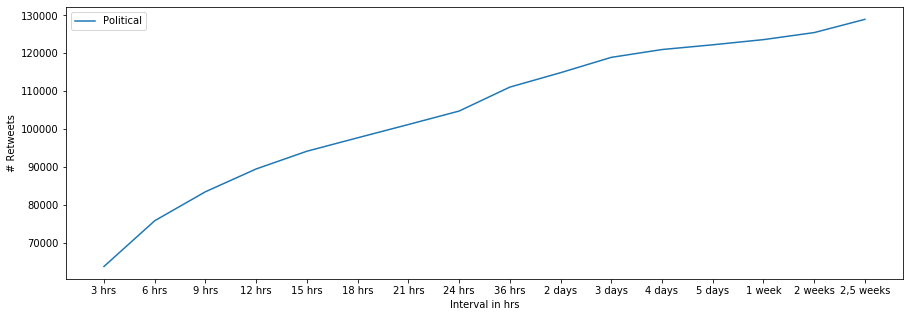

In [58]:
plt.plot(intervals, p_intervals, label = "Political")
plt.xlabel("Interval in hrs")
plt.ylabel("# Retweets")
plt.legend()

# Gossip

In [59]:
# Time interval of 6h
TIME_INTERVAL = 21600

# Retweeted less than 3 hrs after the tweet
g_interval1 = 0
# Retweeted less than 6 hrs after the tweet
g_interval2 = 0
# Retweeted less than 9 hrs after the tweet
g_interval3 = 0
# Retweeted less than 12 hrs after the tweet
g_interval4 = 0
# Retweeted less than 15 hrs after the tweet
g_interval5 = 0
# Retweeted less than 18 hrs after the tweet
g_interval6 = 0
# Retweeted less than 21 hrs after the tweet
g_interval7 = 0
# Retweeted less than 24 hrs after the tweet
g_interval8 = 0
# Retweeted less than 36 hrs after the tweet
g_interval9 = 0
# Retweeted less than 48 hrs after the tweet
g_interval10 = 0
# Retweeted less than 72 hrs after the tweet
g_interval11 = 0
# Retweeted less than 96 hrs after the tweet
g_interval12 = 0
# Retweeted less than 120 hrs after the tweet
g_interval13 = 0
# Retweeted less than 1 week after the tweet
g_interval14 = 0
# Retweeted less than 2 weeks after the tweet
g_interval15 = 0
# All
g_interval16 = 0

path_g_Retweet = "FakeNewsNet_modified/code/fakenewsnet_dataset/gossipcop/complete"
path_g_Tweet = "FakeNewsNet_modified/code/fakenewsnet_dataset/gossipcop/tweets"
for filename in os.listdir(path_g_Retweet):
    print("Processing",filename,"...")
    
    retweets = pd.read_csv(path_g_Retweet+"/"+filename, encoding='utf-8')
    tweets = pd.read_csv(path_g_Tweet+"/"+filename, encoding='utf-8')
    tweets_ids = retweets[retweets.retweeted_id != 0].retweeted_id
    
    for c_id in tweets_ids.unique():
        # print("Tweet with id", c_id,"being processed.")
        # Get retweets
        retweet_array = retweets[retweets.retweeted_id == c_id]
        tweet_date = datetime.strptime(str(tweets[tweets.tweet_id == c_id].created_at.iloc[0]), 
                                   "%a %b %d %H:%M:%S +%f %Y")

        for value in retweet_array.sort_values(by="created_at")['created_at']:

            timestamp = datetime.strptime(value, "%a %b %d %H:%M:%S +%f %Y")
            interval = (timestamp-tweet_date).total_seconds()/TIME_INTERVAL

            # 3 hrs
            if interval < 0.5:
                g_interval1 +=1
            # 6 hrs
            if interval < 1:
                g_interval2 +=1
            # 9 hrs
            if interval < 1.5:
                g_interval3 +=1
            # 12 hrs
            if interval < 2:
                g_interval4 +=1
            # 15 hrs
            if interval < 2.5:
                g_interval5 +=1
            # 18 hrs
            if interval < 3:
                g_interval6 += 1
            # 21 hrs
            if interval < 3.5:
                g_interval7 += 1
            # 24 hrs
            if interval < 4:
                g_interval8 +=1
            # 36 hrs
            if interval < 6:
                g_interval9 +=1
            # 48 hrs
            if interval < 8:
                g_interval10 +=1
            # 72 hrs
            if interval < 12:
                g_interval11 +=1
            # 96 hrs
            if interval < 16:
                g_interval12 +=1
            # 120 hrs = 5 days
            if interval < 20:
                g_interval13 +=1
            # 7 days
            if interval < 28:
                g_interval14 +=1
            # 2 weeks
            if interval < 56:
                g_interval15 +=1
            # Total
            g_interval16 +=1 

Processing gossipcop-1000240645.csv ...
Processing gossipcop-1000908841.csv ...
Processing gossipcop-1009248558.csv ...
Processing gossipcop-1012123555.csv ...
Processing gossipcop-1014383679.csv ...
Processing gossipcop-1014616559.csv ...
Processing gossipcop-1014636162.csv ...
Processing gossipcop-1020220396.csv ...
Processing gossipcop-1020335052.csv ...
Processing gossipcop-1023576750.csv ...
Processing gossipcop-1023869303.csv ...
Processing gossipcop-1026488145.csv ...
Processing gossipcop-1026793571.csv ...
Processing gossipcop-1031800447.csv ...
Processing gossipcop-1032468824.csv ...
Processing gossipcop-1032664975.csv ...
Processing gossipcop-1036952493.csv ...
Processing gossipcop-1037841505.csv ...
Processing gossipcop-1039751251.csv ...
Processing gossipcop-1042406339.csv ...
Processing gossipcop-1043854322.csv ...
Processing gossipcop-1044110130.csv ...
Processing gossipcop-10448753.csv ...
Processing gossipcop-1046174363.csv ...
Processing gossipcop-1046566535.csv ...
Pr

Processing gossipcop-140849966.csv ...
Processing gossipcop-1409790969.csv ...
Processing gossipcop-140994150.csv ...
Processing gossipcop-1410317058.csv ...
Processing gossipcop-1410407190.csv ...
Processing gossipcop-1410900558.csv ...
Processing gossipcop-1411966817.csv ...
Processing gossipcop-1413413611.csv ...
Processing gossipcop-1413519098.csv ...
Processing gossipcop-1414621205.csv ...
Processing gossipcop-1416257068.csv ...
Processing gossipcop-1417462600.csv ...
Processing gossipcop-1418105606.csv ...
Processing gossipcop-141965938.csv ...
Processing gossipcop-1424848077.csv ...
Processing gossipcop-1426832166.csv ...
Processing gossipcop-1432833690.csv ...
Processing gossipcop-1433840923.csv ...
Processing gossipcop-1435049921.csv ...
Processing gossipcop-1440280874.csv ...
Processing gossipcop-1442274618.csv ...
Processing gossipcop-1445432909.csv ...
Processing gossipcop-1445531939.csv ...
Processing gossipcop-1448464423.csv ...
Processing gossipcop-1448667119.csv ...
Pro

Processing gossipcop-1718137654.csv ...
Processing gossipcop-1718653811.csv ...
Processing gossipcop-1720994729.csv ...
Processing gossipcop-1722053022.csv ...
Processing gossipcop-1725178626.csv ...
Processing gossipcop-1727573767.csv ...
Processing gossipcop-1732429292.csv ...
Processing gossipcop-1732632475.csv ...
Processing gossipcop-173381532.csv ...
Processing gossipcop-1738357324.csv ...
Processing gossipcop-1742215906.csv ...
Processing gossipcop-1743922880.csv ...
Processing gossipcop-174523171.csv ...
Processing gossipcop-1745549479.csv ...
Processing gossipcop-1748374912.csv ...
Processing gossipcop-1748893181.csv ...
Processing gossipcop-1749251349.csv ...
Processing gossipcop-174999294.csv ...
Processing gossipcop-175295705.csv ...
Processing gossipcop-1753721453.csv ...
Processing gossipcop-1755779346.csv ...
Processing gossipcop-175866555.csv ...
Processing gossipcop-1760401680.csv ...
Processing gossipcop-1760479830.csv ...
Processing gossipcop-1761311625.csv ...
Proce

Processing gossipcop-2108146336.csv ...
Processing gossipcop-2109585389.csv ...
Processing gossipcop-2111229547.csv ...
Processing gossipcop-2111996495.csv ...
Processing gossipcop-2116458.csv ...
Processing gossipcop-211703249.csv ...
Processing gossipcop-2118843089.csv ...
Processing gossipcop-2120490422.csv ...
Processing gossipcop-2121835149.csv ...
Processing gossipcop-2122263353.csv ...
Processing gossipcop-2123039224.csv ...
Processing gossipcop-2123292210.csv ...
Processing gossipcop-2123350375.csv ...
Processing gossipcop-212976411.csv ...
Processing gossipcop-2129824884.csv ...
Processing gossipcop-213006330.csv ...
Processing gossipcop-2133150152.csv ...
Processing gossipcop-2134519765.csv ...
Processing gossipcop-2134848777.csv ...
Processing gossipcop-2136444515.csv ...
Processing gossipcop-2137646598.csv ...
Processing gossipcop-2137782347.csv ...
Processing gossipcop-213925729.csv ...
Processing gossipcop-2139623414.csv ...
Processing gossipcop-214133115.csv ...
Processi

Processing gossipcop-2485085069.csv ...
Processing gossipcop-2486264114.csv ...
Processing gossipcop-248661844.csv ...
Processing gossipcop-2488404802.csv ...
Processing gossipcop-2490475291.csv ...
Processing gossipcop-2491359601.csv ...
Processing gossipcop-2491524812.csv ...
Processing gossipcop-2493253446.csv ...
Processing gossipcop-2493749932.csv ...
Processing gossipcop-2495820451.csv ...
Processing gossipcop-2497566378.csv ...
Processing gossipcop-2497898226.csv ...
Processing gossipcop-2499277246.csv ...
Processing gossipcop-2499994250.csv ...
Processing gossipcop-2500579008.csv ...
Processing gossipcop-2502492072.csv ...
Processing gossipcop-2504208932.csv ...
Processing gossipcop-2504785566.csv ...
Processing gossipcop-2507720803.csv ...
Processing gossipcop-2509430407.csv ...
Processing gossipcop-2509626865.csv ...
Processing gossipcop-2511047593.csv ...
Processing gossipcop-2514104692.csv ...
Processing gossipcop-2516063271.csv ...
Processing gossipcop-2516712786.csv ...
P

Processing gossipcop-2852717230.csv ...
Processing gossipcop-2853783393.csv ...
Processing gossipcop-2853982179.csv ...
Processing gossipcop-2854321309.csv ...
Processing gossipcop-2856325908.csv ...
Processing gossipcop-2856846379.csv ...
Processing gossipcop-2859753224.csv ...
Processing gossipcop-2860022327.csv ...
Processing gossipcop-2862456586.csv ...
Processing gossipcop-2863007901.csv ...
Processing gossipcop-2863463279.csv ...
Processing gossipcop-2868963763.csv ...
Processing gossipcop-2870787911.csv ...
Processing gossipcop-2873467495.csv ...
Processing gossipcop-2874033235.csv ...
Processing gossipcop-2875496174.csv ...
Processing gossipcop-2877943909.csv ...
Processing gossipcop-2879402342.csv ...
Processing gossipcop-2880320914.csv ...
Processing gossipcop-2881365356.csv ...
Processing gossipcop-2886104361.csv ...
Processing gossipcop-2887124659.csv ...
Processing gossipcop-2887233910.csv ...
Processing gossipcop-2892576573.csv ...
Processing gossipcop-2893204024.csv ...


Processing gossipcop-3189527671.csv ...
Processing gossipcop-3196236336.csv ...
Processing gossipcop-3196321022.csv ...
Processing gossipcop-3202228811.csv ...
Processing gossipcop-3202532387.csv ...
Processing gossipcop-3205422760.csv ...
Processing gossipcop-3207033706.csv ...
Processing gossipcop-3207353525.csv ...
Processing gossipcop-320737206.csv ...
Processing gossipcop-3207658967.csv ...
Processing gossipcop-3210261852.csv ...
Processing gossipcop-3211553428.csv ...
Processing gossipcop-3211771165.csv ...
Processing gossipcop-3213651270.csv ...
Processing gossipcop-3219523297.csv ...
Processing gossipcop-3222244840.csv ...
Processing gossipcop-3222492495.csv ...
Processing gossipcop-3224508701.csv ...
Processing gossipcop-3226781929.csv ...
Processing gossipcop-3227825551.csv ...
Processing gossipcop-3230976793.csv ...
Processing gossipcop-3234538476.csv ...
Processing gossipcop-323542561.csv ...
Processing gossipcop-3238549946.csv ...
Processing gossipcop-3239214896.csv ...
Pr

Processing gossipcop-3561336443.csv ...
Processing gossipcop-3562438605.csv ...
Processing gossipcop-3564164651.csv ...
Processing gossipcop-3564327541.csv ...
Processing gossipcop-3565235075.csv ...
Processing gossipcop-3569542889.csv ...
Processing gossipcop-3571366577.csv ...
Processing gossipcop-3573992221.csv ...
Processing gossipcop-3578554429.csv ...
Processing gossipcop-3582172448.csv ...
Processing gossipcop-3582461668.csv ...
Processing gossipcop-3584568934.csv ...
Processing gossipcop-3585623029.csv ...
Processing gossipcop-3589330483.csv ...
Processing gossipcop-3591884490.csv ...
Processing gossipcop-3594957031.csv ...
Processing gossipcop-3598077128.csv ...
Processing gossipcop-3599406074.csv ...
Processing gossipcop-3602415683.csv ...
Processing gossipcop-3605784923.csv ...
Processing gossipcop-3610806888.csv ...
Processing gossipcop-3612883910.csv ...
Processing gossipcop-3614016027.csv ...
Processing gossipcop-3616210099.csv ...
Processing gossipcop-361628852.csv ...
P

Processing gossipcop-3973722335.csv ...
Processing gossipcop-3975938427.csv ...
Processing gossipcop-3976046218.csv ...
Processing gossipcop-3976443648.csv ...
Processing gossipcop-3977674152.csv ...
Processing gossipcop-3979367934.csv ...
Processing gossipcop-3984588978.csv ...
Processing gossipcop-398843150.csv ...
Processing gossipcop-3990217217.csv ...
Processing gossipcop-3990749056.csv ...
Processing gossipcop-3992415225.csv ...
Processing gossipcop-3996282921.csv ...
Processing gossipcop-3998725211.csv ...
Processing gossipcop-3999786987.csv ...
Processing gossipcop-3999881528.csv ...
Processing gossipcop-4004518461.csv ...
Processing gossipcop-4005025751.csv ...
Processing gossipcop-4005165025.csv ...
Processing gossipcop-4005203173.csv ...
Processing gossipcop-4006218901.csv ...
Processing gossipcop-40109120.csv ...
Processing gossipcop-4011784677.csv ...
Processing gossipcop-4015873994.csv ...
Processing gossipcop-4016450162.csv ...
Processing gossipcop-40168647.csv ...
Proce

Processing gossipcop-433489352.csv ...
Processing gossipcop-4341857401.csv ...
Processing gossipcop-4342414679.csv ...
Processing gossipcop-4346321309.csv ...
Processing gossipcop-4348793511.csv ...
Processing gossipcop-4351619495.csv ...
Processing gossipcop-4353602562.csv ...
Processing gossipcop-4355609760.csv ...
Processing gossipcop-4355802893.csv ...
Processing gossipcop-4356794684.csv ...
Processing gossipcop-4360448788.csv ...
Processing gossipcop-4363700284.csv ...
Processing gossipcop-4367523155.csv ...
Processing gossipcop-4370895065.csv ...
Processing gossipcop-4372521204.csv ...
Processing gossipcop-4372946169.csv ...
Processing gossipcop-4373322193.csv ...
Processing gossipcop-4375192538.csv ...
Processing gossipcop-4376228304.csv ...
Processing gossipcop-4379697773.csv ...
Processing gossipcop-4382603780.csv ...
Processing gossipcop-4383623389.csv ...
Processing gossipcop-4388708613.csv ...
Processing gossipcop-439252914.csv ...
Processing gossipcop-4394027963.csv ...
Pr

Processing gossipcop-4768952264.csv ...
Processing gossipcop-4769457532.csv ...
Processing gossipcop-4769910138.csv ...
Processing gossipcop-4771324886.csv ...
Processing gossipcop-4772953023.csv ...
Processing gossipcop-4773027628.csv ...
Processing gossipcop-4774142356.csv ...
Processing gossipcop-4775370060.csv ...
Processing gossipcop-4778714585.csv ...
Processing gossipcop-4780852492.csv ...
Processing gossipcop-4781000361.csv ...
Processing gossipcop-4784074017.csv ...
Processing gossipcop-4787343228.csv ...
Processing gossipcop-4790479997.csv ...
Processing gossipcop-4791025444.csv ...
Processing gossipcop-4791617851.csv ...
Processing gossipcop-4794013149.csv ...
Processing gossipcop-47955078.csv ...
Processing gossipcop-4796409702.csv ...
Processing gossipcop-4796568652.csv ...
Processing gossipcop-4800468981.csv ...
Processing gossipcop-4802653039.csv ...
Processing gossipcop-4803899832.csv ...
Processing gossipcop-4807172047.csv ...
Processing gossipcop-480839832.csv ...
Pro

Processing gossipcop-5138065812.csv ...
Processing gossipcop-5139117938.csv ...
Processing gossipcop-514010806.csv ...
Processing gossipcop-5140313352.csv ...
Processing gossipcop-5140770301.csv ...
Processing gossipcop-5141610439.csv ...
Processing gossipcop-514192286.csv ...
Processing gossipcop-5144712731.csv ...
Processing gossipcop-5144724371.csv ...
Processing gossipcop-5144752389.csv ...
Processing gossipcop-5144862894.csv ...
Processing gossipcop-5145417935.csv ...
Processing gossipcop-514547189.csv ...
Processing gossipcop-514556785.csv ...
Processing gossipcop-5147798229.csv ...
Processing gossipcop-5148596968.csv ...
Processing gossipcop-5152718676.csv ...
Processing gossipcop-5152768016.csv ...
Processing gossipcop-5154064086.csv ...
Processing gossipcop-5154199280.csv ...
Processing gossipcop-5154947333.csv ...
Processing gossipcop-5156379060.csv ...
Processing gossipcop-5161133028.csv ...
Processing gossipcop-516224513.csv ...
Processing gossipcop-5162567437.csv ...
Proce

Processing gossipcop-547224423.csv ...
Processing gossipcop-5475659487.csv ...
Processing gossipcop-5475672941.csv ...
Processing gossipcop-5476631226.csv ...
Processing gossipcop-5476888005.csv ...
Processing gossipcop-547743240.csv ...
Processing gossipcop-5480976970.csv ...
Processing gossipcop-5483599093.csv ...
Processing gossipcop-5483602935.csv ...
Processing gossipcop-5483827991.csv ...
Processing gossipcop-5490417950.csv ...
Processing gossipcop-5493993751.csv ...
Processing gossipcop-5494601224.csv ...
Processing gossipcop-5506303401.csv ...
Processing gossipcop-5511395939.csv ...
Processing gossipcop-5511468130.csv ...
Processing gossipcop-5515023168.csv ...
Processing gossipcop-5516108922.csv ...
Processing gossipcop-5516587496.csv ...
Processing gossipcop-5517886157.csv ...
Processing gossipcop-5519835041.csv ...
Processing gossipcop-5524550050.csv ...
Processing gossipcop-5525957899.csv ...
Processing gossipcop-5527569893.csv ...
Processing gossipcop-5533222267.csv ...
Pr

Processing gossipcop-5860144727.csv ...
Processing gossipcop-5860151409.csv ...
Processing gossipcop-5864896208.csv ...
Processing gossipcop-5865271192.csv ...
Processing gossipcop-5865511589.csv ...
Processing gossipcop-5865564498.csv ...
Processing gossipcop-5866775064.csv ...
Processing gossipcop-5867003287.csv ...
Processing gossipcop-5869226639.csv ...
Processing gossipcop-5869839268.csv ...
Processing gossipcop-5872003026.csv ...
Processing gossipcop-5874560790.csv ...
Processing gossipcop-5875692446.csv ...
Processing gossipcop-5875815368.csv ...
Processing gossipcop-5876471599.csv ...
Processing gossipcop-5877863085.csv ...
Processing gossipcop-5879758005.csv ...
Processing gossipcop-5880295549.csv ...
Processing gossipcop-5880399600.csv ...
Processing gossipcop-5881128002.csv ...
Processing gossipcop-5883886565.csv ...
Processing gossipcop-5884179925.csv ...
Processing gossipcop-5885895733.csv ...
Processing gossipcop-5886617783.csv ...
Processing gossipcop-5886871112.csv ...


Processing gossipcop-6210885194.csv ...
Processing gossipcop-621464173.csv ...
Processing gossipcop-6219083016.csv ...
Processing gossipcop-6221519484.csv ...
Processing gossipcop-622245969.csv ...
Processing gossipcop-6223301313.csv ...
Processing gossipcop-6224642088.csv ...
Processing gossipcop-6225895099.csv ...
Processing gossipcop-6226639736.csv ...
Processing gossipcop-6227263697.csv ...
Processing gossipcop-6227701232.csv ...
Processing gossipcop-6229080761.csv ...
Processing gossipcop-6230597261.csv ...
Processing gossipcop-6231788357.csv ...
Processing gossipcop-6232251259.csv ...
Processing gossipcop-6232432879.csv ...
Processing gossipcop-6237865101.csv ...
Processing gossipcop-6239092761.csv ...
Processing gossipcop-6239519280.csv ...
Processing gossipcop-6245785162.csv ...
Processing gossipcop-6246046280.csv ...
Processing gossipcop-6246680213.csv ...
Processing gossipcop-624803233.csv ...
Processing gossipcop-624893415.csv ...
Processing gossipcop-6248988606.csv ...
Proc

Processing gossipcop-6586535235.csv ...
Processing gossipcop-6587156054.csv ...
Processing gossipcop-6588325659.csv ...
Processing gossipcop-6591592984.csv ...
Processing gossipcop-6594181187.csv ...
Processing gossipcop-6594332926.csv ...
Processing gossipcop-6595814885.csv ...
Processing gossipcop-6597797445.csv ...
Processing gossipcop-6598316141.csv ...
Processing gossipcop-660018210.csv ...
Processing gossipcop-6602611188.csv ...
Processing gossipcop-6605624682.csv ...
Processing gossipcop-6605956680.csv ...
Processing gossipcop-6611476707.csv ...
Processing gossipcop-6614569708.csv ...
Processing gossipcop-6615909910.csv ...
Processing gossipcop-6619290126.csv ...
Processing gossipcop-662079031.csv ...
Processing gossipcop-6621065312.csv ...
Processing gossipcop-6622517305.csv ...
Processing gossipcop-6624787872.csv ...
Processing gossipcop-662718352.csv ...
Processing gossipcop-6627484698.csv ...
Processing gossipcop-6629014522.csv ...
Processing gossipcop-6629425265.csv ...
Pro

Processing gossipcop-6973925657.csv ...
Processing gossipcop-6974111719.csv ...
Processing gossipcop-6975529775.csv ...
Processing gossipcop-6976298194.csv ...
Processing gossipcop-6979069951.csv ...
Processing gossipcop-6982132348.csv ...
Processing gossipcop-6982710185.csv ...
Processing gossipcop-698437440.csv ...
Processing gossipcop-6984927757.csv ...
Processing gossipcop-6986473289.csv ...
Processing gossipcop-6987256464.csv ...
Processing gossipcop-6988354769.csv ...
Processing gossipcop-6991357264.csv ...
Processing gossipcop-6991597859.csv ...
Processing gossipcop-699303448.csv ...
Processing gossipcop-6993270746.csv ...
Processing gossipcop-6993299340.csv ...
Processing gossipcop-6998565068.csv ...
Processing gossipcop-700157068.csv ...
Processing gossipcop-7001874858.csv ...
Processing gossipcop-701012392.csv ...
Processing gossipcop-7010183951.csv ...
Processing gossipcop-7010349230.csv ...
Processing gossipcop-7010369703.csv ...
Processing gossipcop-7013705598.csv ...
Proc

Processing gossipcop-7295172272.csv ...
Processing gossipcop-7298924973.csv ...
Processing gossipcop-7302050641.csv ...
Processing gossipcop-7302775949.csv ...
Processing gossipcop-7305394933.csv ...
Processing gossipcop-7306553881.csv ...
Processing gossipcop-7306985813.csv ...
Processing gossipcop-730736439.csv ...
Processing gossipcop-7308803709.csv ...
Processing gossipcop-7309969139.csv ...
Processing gossipcop-7310476796.csv ...
Processing gossipcop-7312096991.csv ...
Processing gossipcop-7313900095.csv ...
Processing gossipcop-7313994513.csv ...
Processing gossipcop-7314241723.csv ...
Processing gossipcop-7314608543.csv ...
Processing gossipcop-7317786843.csv ...
Processing gossipcop-7319293593.csv ...
Processing gossipcop-7321484176.csv ...
Processing gossipcop-7324296383.csv ...
Processing gossipcop-7326621043.csv ...
Processing gossipcop-732813675.csv ...
Processing gossipcop-7331461423.csv ...
Processing gossipcop-7333432588.csv ...
Processing gossipcop-7333672377.csv ...
Pr

Processing gossipcop-7694435947.csv ...
Processing gossipcop-7694678050.csv ...
Processing gossipcop-7697671735.csv ...
Processing gossipcop-770251638.csv ...
Processing gossipcop-7702629638.csv ...
Processing gossipcop-7704079622.csv ...
Processing gossipcop-7704727557.csv ...
Processing gossipcop-7704965981.csv ...
Processing gossipcop-7705440500.csv ...
Processing gossipcop-7706490560.csv ...
Processing gossipcop-7710118200.csv ...
Processing gossipcop-7711381747.csv ...
Processing gossipcop-7712975012.csv ...
Processing gossipcop-7714440879.csv ...
Processing gossipcop-7714793816.csv ...
Processing gossipcop-7715273570.csv ...
Processing gossipcop-7715825946.csv ...
Processing gossipcop-7718099321.csv ...
Processing gossipcop-7720297178.csv ...
Processing gossipcop-7721155943.csv ...
Processing gossipcop-7724686547.csv ...
Processing gossipcop-7727501669.csv ...
Processing gossipcop-7727825756.csv ...
Processing gossipcop-7733393536.csv ...
Processing gossipcop-7735472514.csv ...
P

Processing gossipcop-8099144572.csv ...
Processing gossipcop-8099376883.csv ...
Processing gossipcop-8101257614.csv ...
Processing gossipcop-8105333868.csv ...
Processing gossipcop-8105884993.csv ...
Processing gossipcop-8106461875.csv ...
Processing gossipcop-8106811914.csv ...
Processing gossipcop-8107039710.csv ...
Processing gossipcop-8108694163.csv ...
Processing gossipcop-8109991618.csv ...
Processing gossipcop-8115207261.csv ...
Processing gossipcop-8117477556.csv ...
Processing gossipcop-8119809755.csv ...
Processing gossipcop-8123589625.csv ...
Processing gossipcop-8125535833.csv ...
Processing gossipcop-8126073985.csv ...
Processing gossipcop-8126566490.csv ...
Processing gossipcop-8129430513.csv ...
Processing gossipcop-8131275727.csv ...
Processing gossipcop-8132621806.csv ...
Processing gossipcop-8132886943.csv ...
Processing gossipcop-8136305724.csv ...
Processing gossipcop-8136601878.csv ...
Processing gossipcop-8137449994.csv ...
Processing gossipcop-81380989.csv ...
Pr

Processing gossipcop-8450631162.csv ...
Processing gossipcop-8451664003.csv ...
Processing gossipcop-8454984419.csv ...
Processing gossipcop-8455047747.csv ...
Processing gossipcop-8456652125.csv ...
Processing gossipcop-8459734095.csv ...
Processing gossipcop-8460897439.csv ...
Processing gossipcop-8461829651.csv ...
Processing gossipcop-8463307904.csv ...
Processing gossipcop-8465878879.csv ...
Processing gossipcop-846907177.csv ...
Processing gossipcop-8469459935.csv ...
Processing gossipcop-8469534001.csv ...
Processing gossipcop-8470956010.csv ...
Processing gossipcop-8474270482.csv ...
Processing gossipcop-8474301824.csv ...
Processing gossipcop-8474482797.csv ...
Processing gossipcop-8480532008.csv ...
Processing gossipcop-8482372890.csv ...
Processing gossipcop-84851611.csv ...
Processing gossipcop-8485688306.csv ...
Processing gossipcop-8489638104.csv ...
Processing gossipcop-8489729650.csv ...
Processing gossipcop-8492696509.csv ...
Processing gossipcop-8497150446.csv ...
Pro

Processing gossipcop-8862742609.csv ...
Processing gossipcop-8865163539.csv ...
Processing gossipcop-8865743828.csv ...
Processing gossipcop-8865847454.csv ...
Processing gossipcop-8867519772.csv ...
Processing gossipcop-886883614.csv ...
Processing gossipcop-8871430966.csv ...
Processing gossipcop-8871505752.csv ...
Processing gossipcop-8875435152.csv ...
Processing gossipcop-8877042466.csv ...
Processing gossipcop-887882317.csv ...
Processing gossipcop-8882167387.csv ...
Processing gossipcop-8882451342.csv ...
Processing gossipcop-8884898167.csv ...
Processing gossipcop-8885333485.csv ...
Processing gossipcop-8886605619.csv ...
Processing gossipcop-8886918041.csv ...
Processing gossipcop-8886966654.csv ...
Processing gossipcop-8887202012.csv ...
Processing gossipcop-8887454037.csv ...
Processing gossipcop-8888811836.csv ...
Processing gossipcop-8889799564.csv ...
Processing gossipcop-8890242614.csv ...
Processing gossipcop-8892524070.csv ...
Processing gossipcop-88943555.csv ...
Proc

Processing gossipcop-9208934379.csv ...
Processing gossipcop-9210923660.csv ...
Processing gossipcop-9211668568.csv ...
Processing gossipcop-9213050977.csv ...
Processing gossipcop-9215514933.csv ...
Processing gossipcop-9215520345.csv ...
Processing gossipcop-9216826007.csv ...
Processing gossipcop-9217504373.csv ...
Processing gossipcop-9219469405.csv ...
Processing gossipcop-921963353.csv ...
Processing gossipcop-9222651201.csv ...
Processing gossipcop-922305481.csv ...
Processing gossipcop-9223580402.csv ...
Processing gossipcop-9226500572.csv ...
Processing gossipcop-922696589.csv ...
Processing gossipcop-9227321368.csv ...
Processing gossipcop-9227872746.csv ...
Processing gossipcop-9229635036.csv ...
Processing gossipcop-9233245823.csv ...
Processing gossipcop-9233497353.csv ...
Processing gossipcop-9239107991.csv ...
Processing gossipcop-9239145633.csv ...
Processing gossipcop-9239840629.csv ...
Processing gossipcop-9239880847.csv ...
Processing gossipcop-9241303470.csv ...
Pro

Processing gossipcop-9545964925.csv ...
Processing gossipcop-9549141292.csv ...
Processing gossipcop-9550802520.csv ...
Processing gossipcop-9552745968.csv ...
Processing gossipcop-9553363490.csv ...
Processing gossipcop-9555947062.csv ...
Processing gossipcop-9559428298.csv ...
Processing gossipcop-9562033469.csv ...
Processing gossipcop-9564340701.csv ...
Processing gossipcop-9564456032.csv ...
Processing gossipcop-9566577328.csv ...
Processing gossipcop-9567500636.csv ...
Processing gossipcop-9568572354.csv ...
Processing gossipcop-9569092095.csv ...
Processing gossipcop-9569985999.csv ...
Processing gossipcop-9572815116.csv ...
Processing gossipcop-9574195797.csv ...
Processing gossipcop-9574358029.csv ...
Processing gossipcop-9576408647.csv ...
Processing gossipcop-9578489765.csv ...
Processing gossipcop-9579629481.csv ...
Processing gossipcop-9579681666.csv ...
Processing gossipcop-9581448401.csv ...
Processing gossipcop-9582227714.csv ...
Processing gossipcop-958341208.csv ...
P

Processing gossipcop-9937438668.csv ...
Processing gossipcop-9938144731.csv ...
Processing gossipcop-9938603260.csv ...
Processing gossipcop-9938984303.csv ...
Processing gossipcop-9940130614.csv ...
Processing gossipcop-9940338306.csv ...
Processing gossipcop-994194865.csv ...
Processing gossipcop-994232799.csv ...
Processing gossipcop-9943809806.csv ...
Processing gossipcop-994450447.csv ...
Processing gossipcop-9946470464.csv ...
Processing gossipcop-9947661277.csv ...
Processing gossipcop-9948331567.csv ...
Processing gossipcop-9948642977.csv ...
Processing gossipcop-9950069387.csv ...
Processing gossipcop-9950542678.csv ...
Processing gossipcop-9952496143.csv ...
Processing gossipcop-9952783842.csv ...
Processing gossipcop-9953022225.csv ...
Processing gossipcop-9954676206.csv ...
Processing gossipcop-9955703756.csv ...
Processing gossipcop-9958256661.csv ...
Processing gossipcop-9959276960.csv ...
Processing gossipcop-9959829645.csv ...
Processing gossipcop-9963883871.csv ...
Pro

In [61]:
print("3 hrs:",g_interval1)
print("6 hrs:",g_interval2)
print("9 hrs:",g_interval3)
print("12 hrs:",g_interval4)
print("15 hrs:",g_interval5)
print("18 hrs:",g_interval6)
print("21 hrs:",g_interval7)
print("24 hrs:",g_interval8)
print("36 hrs:",g_interval9)
print("48 hrs:",g_interval10)
print("72 hrs:",g_interval11)
print("96 hrs:",g_interval12)
print("120 hrs:",g_interval13)
print("1 week:", g_interval14)
print("2 weeks:", g_interval15)
print("All:",g_interval16)
g_intervals = [g_interval1, g_interval2, g_interval3, g_interval4, g_interval5, g_interval6, g_interval7, 
                   g_interval8, g_interval9, g_interval10, g_interval11, g_interval12, g_interval13, g_interval14,
                      g_interval15, g_interval16]

3 hrs: 177646
6 hrs: 209160
9 hrs: 229762
12 hrs: 245216
15 hrs: 257075
18 hrs: 267313
21 hrs: 277059
24 hrs: 286786
36 hrs: 303967
48 hrs: 313181
72 hrs: 321196
96 hrs: 325441
120 hrs: 328064
1 week: 332075
2 weeks: 337563
All: 351569


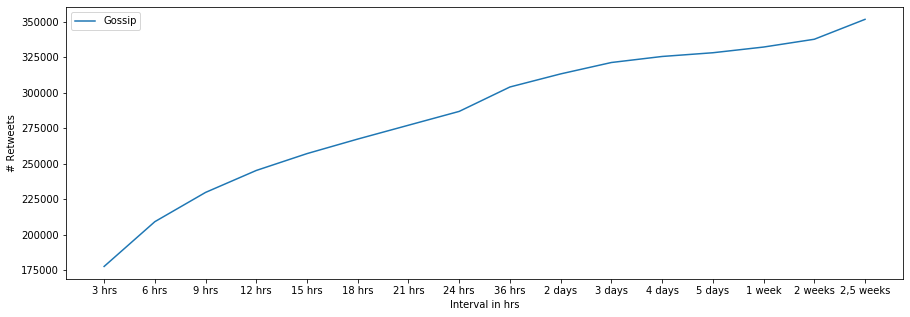

In [62]:
plt.plot(intervals, g_intervals, label = "Gossip")
plt.xlabel("Interval in hrs")
plt.ylabel("# Retweets")
plt.legend()

Text(0, 0.5, '# Retweets')

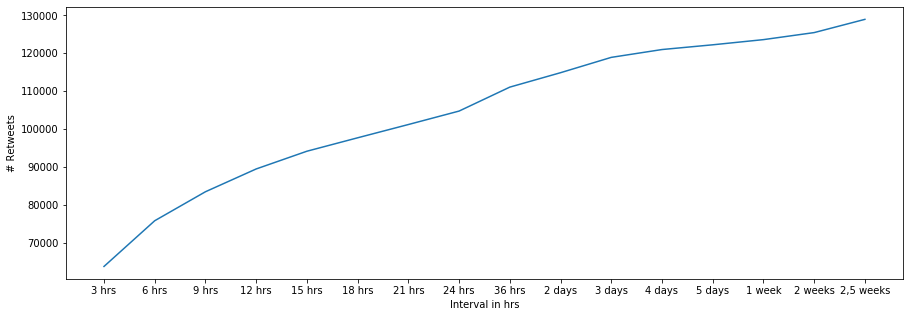

In [63]:
plt.plot(intervals, p_intervals)
plt.xlabel("Interval in hrs")
plt.ylabel("# Retweets")

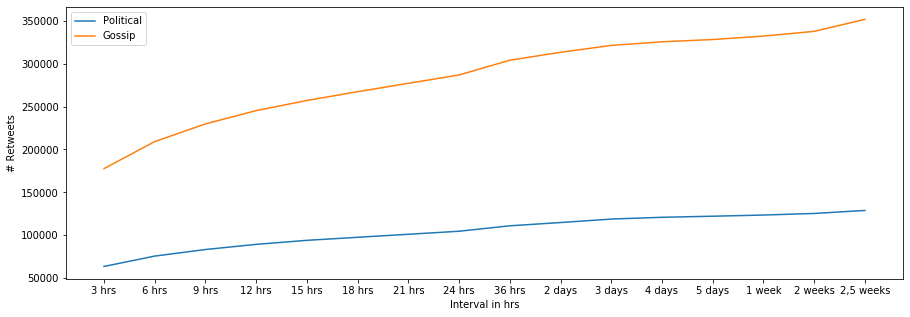

In [64]:
plt.plot(intervals, p_intervals, label = "Political")
plt.plot(intervals, g_intervals, label = "Gossip")
plt.xlabel("Interval in hrs")
plt.ylabel("# Retweets")
plt.legend()

# Experiment with normalization

### 1st attempt: Normalize by the total number of retweets at every interval

In [68]:
normalized_p_int = []
normalized_g_int = []
for i in range(0, 16):
    normalized_p_int.append(p_intervals[i] / (p_intervals[i] + g_intervals[i]))
    normalized_g_int.append(g_intervals[i] / (p_intervals[i] + g_intervals[i]))

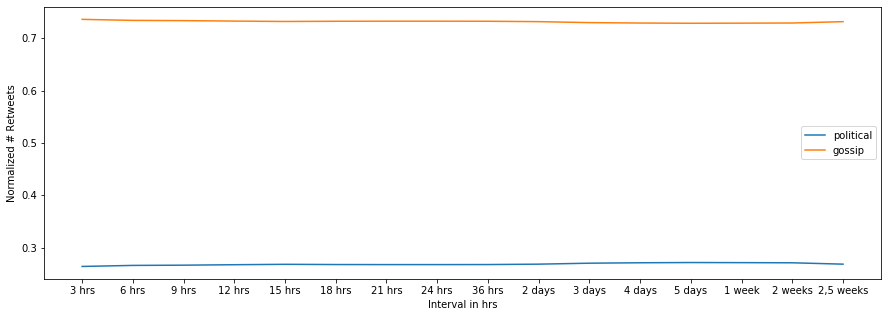

In [77]:
plt.plot(intervals, normalized_p_int, label = 'political')
plt.plot(intervals, normalized_g_int, label = 'gossip')
plt.xlabel("Interval in hrs")
plt.ylabel("Normalized # Retweets")
plt.legend()

Seems that the political and gossip news spread in pretty much the same way. If they didn't we could have something like below

In [74]:
p_intervals = [63706, 89444, 101173, 113932, 115932, 119932, 123939, 124939, 129939, 133939, 138939, 138939,
              139939, 140939, 141939, 142939]

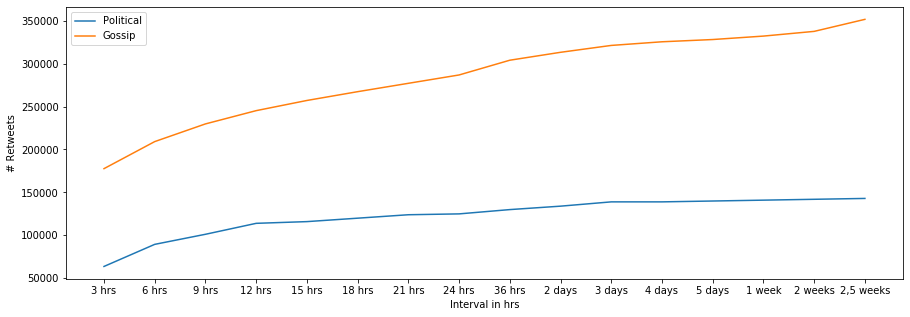

In [75]:
plt.plot(intervals, p_intervals, label = "Political")
plt.plot(intervals, g_intervals, label = "Gossip")
plt.xlabel("Interval in hrs")
plt.ylabel("# Retweets")
plt.legend()

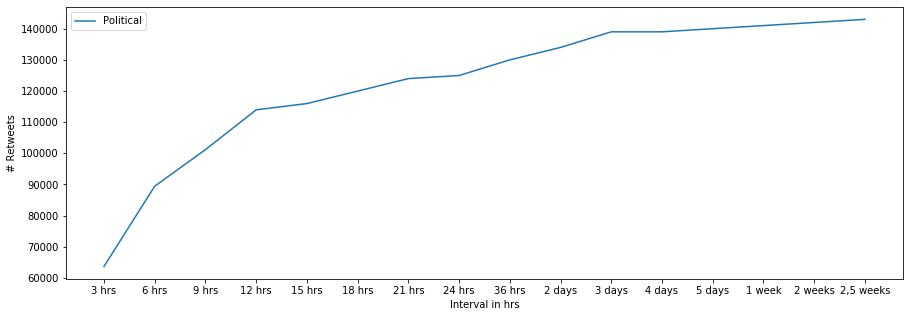

In [76]:
plt.plot(intervals, p_intervals, label = "Political")
plt.xlabel("Interval in hrs")
plt.ylabel("# Retweets")
plt.legend()

### 2nd attempt: Normalize by the total number of items that we have, i.e. divide by the #political and #gossip items

In [79]:
NO_POLITICAL = 389
NO_GOSSIP = 5081


In [80]:
normalized_p_int2 = []
normalized_g_int2 = []
for i in range(0, 16):
    normalized_p_int2.append(p_intervals[i] / NO_POLITICAL)
    normalized_g_int2.append(g_intervals[i] / NO_GOSSIP)

##### For the whole duration

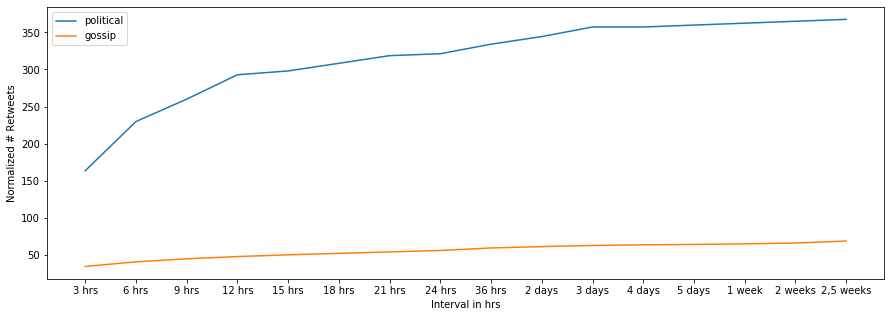

In [81]:
plt.plot(intervals, normalized_p_int2, label = 'political')
plt.plot(intervals, normalized_g_int2, label = 'gossip')
plt.xlabel("Interval in hrs")
plt.ylabel("Normalized # Retweets")
plt.legend()

In [83]:
intervals= [3,6,9,12,15,18,21,24,36,48,72,96,120,168,336,420]

In [89]:
print(intervals[0:13])
print()

[3, 6, 9, 12, 15, 18, 21, 24, 36, 48, 72, 96, 120]



##### For 5 days only

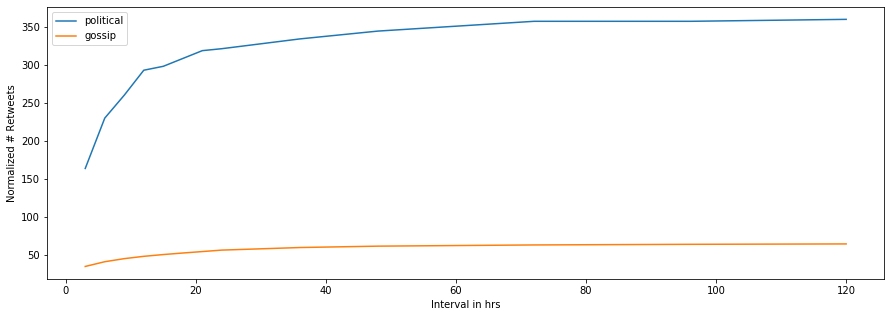

In [90]:
plt.plot(intervals[0:13], normalized_p_int2[0:13], label = 'political')
plt.plot(intervals[0:13], normalized_g_int2[0:13], label = 'gossip')
plt.xlabel("Interval in hrs")
plt.ylabel("Normalized # Retweets")
plt.legend()

##### Original data for 5 days

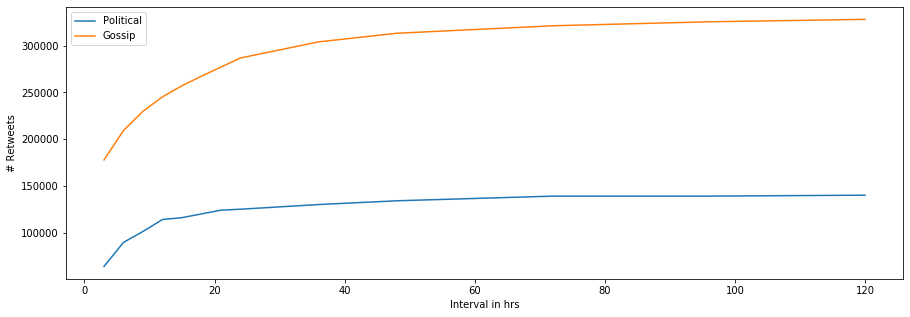

In [91]:
plt.plot(intervals[0:13], p_intervals[0:13], label = "Political")
plt.plot(intervals[0:13], g_intervals[0:13], label = "Gossip")
plt.xlabel("Interval in hrs")
plt.ylabel("# Retweets")
plt.legend()